# 6.1. Feature and Parameter Analysis

In [6]:
import sys
import os
import shutil
import datetime
import re
import pandas as pd
from collections import Counter
sys.path.append(os.path.abspath("/home/jose/Dropbox/Doktorarbeit/"))
from reading_robot import load_data, tei2text, text2features, classify, process_labels, describe_data,feature_analysis, cull_data, st_tests
import scipy.stats as stats

Definition of constants in this chapter

In [7]:
wdir = "/home/jose/Dropbox/Doktorarbeit/novelasespanolas/"

In [8]:
inputwdir_test = "/home/jose/Dropbox/Doktorarbeit/novelasespanolas/test/"
inputwdir = "/home/jose/Dropbox/Doktorarbeit/novelasespanolas/annotated/"

outdir = "/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/"
format_ = "txt"

chap_wdir = "/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_1/"
corpora_chap_wdir = chap_wdir+"exp_corpora/"
results_chap_wdir = chap_wdir+"results/"

In [4]:
subgenres = ['guerra', 'diálogo', 'histórica', 'humor', 'aventura', 'nivola', 'poética', 'memorias', 'naturalista', 'erótica', 'greguería', 'fantástico', 'episodio nacional', 'costumbrista', 'social', 'espiritual', 'realista', 'autobiografía', 'psicológica', 'modernista', 'biografía', 'educación', 'filosófica']
len(subgenres)

23

In [5]:
linguistic_features_wo_lemma = ['@case', '@degree', '@gen', '@mariax', '@mood', '@neclass', '@num', '@ord_ent', '@person', '@possessornum', '@possessorpers', '@punctenclose', '@pos', '@tense', '@type', '@wnlex']
linguistic_features_wi_lemma = ['@lemma','@case', '@degree', '@gen', '@mariax', '@mood', '@neclass', '@num', '@ord_ent', '@person', '@possessornum', '@possessorpers', '@punctenclose', '@pos', '@tense', '@type', '@wnlex']


In [6]:
xpath_non_people = "[not(@ctag='NP') or @neclass='location']"
xpath_people = "[@ctag='NP'][not(@neclass='location')]"


In [7]:
metadata_df = pd.read_csv(wdir+"metadata_quantified-subgenres.csv", sep="\t",index_col=0)
metadata_df.shape

(358, 196)

In [8]:
metadata_df = process_labels.make_interval_subgenres_binary(metadata_df)

In [9]:
tags_metadata = ['am.divs', 'am.verses', 'am.sps', 'am.paragraphs', 'am.pds', 'am.blocks',
                 'am.chapters', 'am.parts', 'am.sections', 'am.divisions', 'am.narrative.ps','am.ss']

In [10]:
tags_metadata_df = metadata_df[tags_metadata]

In [11]:
tags_metadata_df.head()

am.divs  am.verses  am.sps  am.paragraphs  am.pds  am.blocks  \
ne0001       41         71       0           2354    1242       2469   
ne0002       42          0       0           1498    1104       1539   
ne0003       41          0       0           1160     851       1200   
ne0004       45          0       0           1272     978       1316   
ne0005       30          0       0            556     299        585   

        am.chapters  am.parts  am.sections  am.divisions  am.narrative.ps  \
ne0001           31         5            3             0             1112   
ne0002           41         0            0             0              394   
ne0003           35         5            0             0              309   
ne0004           39         5            0             0              294   
ne0005           29         0            0             0              257   

        am.ss  
ne0001   2057  
ne0002   2748  
ne0003   2408  
ne0004   2711  
ne0005   2281

# 6.1.2. Feature Evaluation

## 6.1.2.1. Extraction of Features

### Tokens

In [66]:
tei2text.from_TEIP5(wdir, "bodytext", use_chapter = False, tei_swdir="master/")

/home/jose/Dropbox/Doktorarbeit/novelasespanolas/master/
* Treating ne0295
    ne0295
* Treating ne0120
    ne0120
* Treating ne0095
    ne0095
* Treating ne0290
    ne0290
* Treating ne0236
    ne0236
* Treating ne0390
    ne0390
* Treating ne0231
    ne0231
* Treating ne0244
    ne0244
* Treating ne0002
    ne0002
* Treating ne0306
    ne0306
* Treating ne0276
    ne0276
* Treating ne0185
    ne0185
* Treating ne0009
    ne0009
* Treating ne0069
    ne0069
* Treating ne0073
    ne0073
* Treating ne0118
    ne0118
* Treating ne0116
    ne0116
* Treating ne0393
    ne0393
* Treating ne0057
    ne0057
* Treating ne0103
    ne0103
* Treating ne0131
    ne0131
* Treating ne0216
    ne0216
* Treating ne0015
    ne0015
* Treating ne0259
    ne0259
* Treating ne0049
    ne0049
* Treating ne0072
    ne0072
* Treating ne0005
    ne0005
* Treating ne0292
    ne0292
* Treating ne0148
    ne0148
* Treating ne0031
    ne0031
* Treating ne0321
    ne0321
* Treating ne0313
    ne0313
* Treating ne03

    ne0158
* Treating ne0011
    ne0011
* Treating ne0038
    ne0038
* Treating ne0170
    ne0170
* Treating ne0168
    ne0168
* Treating ne0215
    ne0215
* Treating ne0194
    ne0194
* Treating ne0256
    ne0256
* Treating ne0089
    ne0089
* Treating ne0288
    ne0288
* Treating ne0129
    ne0129
* Treating ne0238
    ne0238
* Treating ne0101
    ne0101
* Treating ne0175
    ne0175
* Treating ne0045
    ne0045
* Treating ne0067
    ne0067
* Treating ne0358
    ne0358
* Treating ne0157
    ne0157
* Treating ne0197
    ne0197
* Treating ne0092
    ne0092
* Treating ne0193
    ne0193
* Treating ne0029
    ne0029
* Treating ne0010
    ne0010
* Treating ne0174
    ne0174
* Treating ne0003
    ne0003
* Treating ne0050
    ne0050
* Treating ne0324
    ne0324
* Treating ne0109
    ne0109
* Treating ne0211
    ne0211
* Treating ne0318
    ne0318
* Treating ne0311
    ne0311
* Treating ne0201
    ne0201
* Treating ne0240
    ne0240
* Treating ne0202
    ne0202
* Treating ne0280
    ne0280
* T

Empty DataFrame
Columns: [id_chapter, idno, length_text, length_chapters]
Index: []

In [67]:
subfolder = "tokens/"

In [25]:
if os.path.isdir(outdir + subfolder)  == True:
    shutil.rmtree(outdir+ subfolder) 
shutil.copytree(wdir+"txt/", outdir + subfolder)

'/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/tokens/'

In [ ]:
tokens_corpus = load_data.load_corpus(outdir, wsdir= subfolder, freq_table="", sep="\t",
                                                verbose=True, min_MFF=0, max_MFF=10000, lowercase=True,
                                                keep_punctuation = True, text_format="txt")
tokens_corpus.head()

### Tokens + Tags

In [520]:
tokens_corpus_df = pd.read_parquet(outdir+ "tokens_freq_table_raw_10000_T.parquet").T

In [521]:
tokens_corpus_df.head()

,     .    de    la     y   que    el    en     a  los   ...    \
ne0001  3414  2780  2628  2003  1914  1335  1646  1211  1218  767   ...     
ne0002  8003  7249  4270  3087  3161  3256  1638  1872  1934  894   ...     
ne0003  6493  4845  3020  2186  2650  2756  1532  1385  1453  706   ...     
ne0004  7411  5703  3675  2552  2640  2768  1575  1616  1631  755   ...     
ne0005  4827  4682  2670  1610  1887  2022   984  1059  1023  517   ...     

        agradezcan  lloviznando  aparento  iznayas  azotándose  poniéndolas  \
ne0001           0            0         0        0           0            0   
ne0002           0            0         0        0           0            0   
ne0003           0            0         0        0           0            0   
ne0004           0            0         0        0           0            0   
ne0005           0            0         0        0           0            0   

        pinchándole  traumático  resinosos  piocha  
ne0001            0           0          0       0  
ne0002            0           0          0       0  
ne0003            0           1          0       0  
ne0004            0           0          0       0  
ne0005            0           0          0       0  

[5 rows x 10000 columns]

In [522]:
tags_tokens_corpus_df = load_data.merge_dfs(tokens_corpus_df, tags_metadata_df)


In [523]:
tags_tokens_corpus_df.head()

,  am.divs     .  am.verses    de  am.sps    la  am.paragraphs  \
ne0001  3414       41  2780         71  2628       0  2003           2354   
ne0002  8003       42  7249          0  4270       0  3087           1498   
ne0003  6493       41  4845          0  3020       0  2186           1160   
ne0004  7411       45  5703          0  3675       0  2552           1272   
ne0005  4827       30  4682          0  2670       0  1610            556   

           y  am.pds   ...    agradezcan  lloviznando  aparento  iznayas  \
ne0001  1914    1242   ...             0            0         0        0   
ne0002  3161    1104   ...             0            0         0        0   
ne0003  2650     851   ...             0            0         0        0   
ne0004  2640     978   ...             0            0         0        0   
ne0005  1887     299   ...             0            0         0        0   

        azotándose  poniéndolas  pinchándole  traumático  resinosos  piocha  
ne0001           0            0            0           0          0       0  
ne0002           0            0            0           0          0       0  
ne0003           0            0            0           1          0       0  
ne0004           0            0            0           0          0       0  
ne0005           0            0            0           0          0       0  

[5 rows x 10012 columns]

In [524]:
tags_tokens_corpus_df.T.to_parquet(outdir+"tags_tokens_corpus_10000_T.parquet")

### POS differentiated Tokens

In [32]:
subfolder = "pos_diff_tokens"

In [ ]:
feature_separator = "_"


xpaths_dict = {"//tei:anno[@type='tokens']/tei:w": ["@form", "@pos"]}

tei2text.teia_features2files(inputwdir, xpaths_dict, outdir, feature_separator=feature_separator,
                             format_=format_, 
                             use_chapter=False, outdirs = "pos_differentiated_tokens")

### PoS Differentiated Multiwords

In [542]:
subfolder = "pos_diff_multiwords"

In [ ]:
feature_separator = "_"


xpaths_dict = {
                "//tei:anno[@type='multiwords']/tei:w": ["@form", "@pos"],
              }

tei2text.teia_features2files(inputwdir, xpaths_dict, outdir, feature_separator=feature_separator,
                             format_=format_, use_chapter=False, append_attribute=False,
                             outdirs = subfolder)

In [ ]:
pos_differentiated_multiwords_corpus = load_data.load_corpus(outdir, wsdir= subfolder+"/", freq_table="", sep="\t",
                                                verbose=True, min_MFF=0, max_MFF=10000, lowercase=True,
                                                keep_punctuation = "features", text_format="txt")
pos_differentiated_multiwords_corpus.head()

###  PoS Differentiated Multiwords with Ordered Entities

In [12]:
subfolder = "pos_diff_multiwords_ord_ent"

In [ ]:
feature_separator = "_"

xpaths_dict = {
                "//tei:anno[@type='multiwords']/tei:w" + xpath_non_people: ["@form", "@pos"],
                "//tei:anno[@type='multiwords']/tei:w" + xpath_people:  ["@ord_ent"],
    
              }

tei2text.teia_features2files(inputwdir, xpaths_dict, outdir, feature_separator=feature_separator,
                             format_=format_, use_chapter=False, append_attribute=True,
                             outdirs = subfolder)

In [ ]:
pos_diff_multiwords_ord_ent_corpus = load_data.load_corpus(outdir , wsdir= subfolder+ "/", freq_table="", sep="\t",
                                                verbose=True, min_MFF=0, max_MFF=10000, lowercase=True,
                                                keep_punctuation = "features", text_format="txt")
pos_diff_multiwords_ord_ent_corpus.head()

### PoS Differentiated Multiwords with Ordered Entities and Pragmatical Annotation

In [15]:
subfolder = "pos_diff_multiwords_ord_ent_pragmatic"

In [ ]:
feature_separator = "_"


xpaths_dict = {
                "//tei:anno[@type='multiwords']/tei:w" + xpath_non_people: ["@form", "@pos"],
                "//tei:anno[@type='multiwords']/tei:w" + xpath_people:  ["@ord_ent"],

                "//tei:anno[@source='dpde']//tei:phr": ["@form"],
                "//tei:anno[@source='refranario']//tei:phr": ["@form"],

              }

tei2text.teia_features2files(inputwdir, xpaths_dict, outdir, feature_separator=feature_separator,
                             format_=format_, use_chapter=False, append_attribute=True,
                             outdirs = subfolder)

In [ ]:
pos_diff_multiwords_ord_ent_pragmatic_corpus = load_data.load_corpus(outdir, wsdir= subfolder+"/", freq_table="", sep="\t",
                                                verbose=True, min_MFF=0, max_MFF=10000, lowercase=True,
                                                keep_punctuation = "features", text_format="txt")
pos_diff_multiwords_ord_ent_pragmatic_corpus.head()

### Semantic Annotation

In [40]:
subfolder = "sem_anno"

In [6]:
feature_separator = " "


xpaths_dict = {"//tei:anno[@type='multiwords']/tei:w": ["@wnlex","@mariax"],
              }

tei2text.teia_features2files(inputwdir, xpaths_dict, outdir, feature_separator=feature_separator, format_=format_,
                             use_chapter=False, append_attribute=True, outdirs= subfolder)

sem_anno
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/sem_anno
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/sem_anno
[]
ne0295 1 th file. Done  0.2 %
already extracted
2
ne0120 2 th file. Done  0.5 %
already extracted
3
ne0095 3 th file. Done  0.8 %
already extracted
4
ne0290 4 th file. Done  1.1 %
already extracted
5
ne0236 5 th file. Done  1.3 %
already extracted
6
ne0390 6 th file. Done  1.6 %
already extracted
7
ne0231 7 th file. Done  1.9 %
already extracted
8
ne0244 8 th file. Done  2.2 %
already extracted
9
ne0002 9 th file. Done  2.5 %
already extracted
10
ne0306 10 th file. Done  2.7 %
already extracted
11
ne0276 11 th file. Done  3.0 %
already extracted
12
ne0185 12 th file. Done  3.3 %
already extracted
13
ne0009 13 th file. Done  3.6 %
already extracted
14
ne0069 14 th file. Done  3.9 %
already extracted
15
ne0073 15 th file. Done  4.1 %
already extracted
16
ne0118 16 th file. Done  4.4 %
already extracted
17
ne0116 17 th file. Done  4.7 %
already 

[[' ', ' '], ['noun.person@wnlex', 'actor@mariax actor@mariax cine@mariax importar@mariax literatura@mariax teatro@mariax']]
[[' ', ' '], [' ', ' ']]
61762
78
ne0395 78 th file. Done  21. %
[['adv.all@wnlex', ' '], ['verb.stative@wnlex', ' ']]
[[' ', ' '], [' ', ' ']]
37208
79
ne0221 79 th file. Done  22. %
[[' ', ' '], [' ', ' ']]
[['verb.communication@wnlex', 'blando@mariax compadecer@mariax emoliente@mariax golpe@mariax influir@mariax meteorología@mariax moderar@mariax nieve@mariax tumor@mariax'], [' ', ' ']]
77624
80
ne0212 80 th file. Done  22. %
[[' ', ' '], [' ', ' ']]
[['verb.possession@wnlex', ' '], [' ', ' ']]
108308
81
ne0362 81 th file. Done  22. %
[[' ', ' '], ['verb.stative@wnlex', ' ']]
[[' ', ' '], [' ', ' ']]
49615
82
ne0090 82 th file. Done  22. %
[['verb.communication@wnlex', 'alabar@mariax clase@mariax colgar@mariax comercio@mariax considerar@mariax cuenta@mariax importar@mariax incluir@mariax informar@mariax juzgar@mariax magnitud@mariax matemática@mariax medir@mar

[[' ', ' '], ['verb.possession@wnlex', ' ']]
[['noun.event@wnlex', 'cerdo@mariax ganado@mariax intervenir@mariax orden@mariax repetir@mariax tiempo@mariax'], [' ', ' ']]
94480
115
ne0112 115 th file. Done  32. %
[[' ', ' '], ['noun.time@wnlex', 'día@mariax futuro@mariax tiempo@mariax']]
[['noun.attribute@wnlex', 'amor@mariax comer@mariax conducir@mariax decidir@mariax durar@mariax expresar@mariax fisiología@mariax historia@mariax lenguaje@mariax placer@mariax saludar@mariax tiempo@mariax vivir@mariax'], [' ', ' ']]
57075
116
ne0388 116 th file. Done  32. %
[['verb.motion@wnlex', 'agricultura@mariax amenazar@mariax arquitectura@mariax baraja@mariax beber@mariax casa@mariax construir@mariax desconsideración@mariax elevar@mariax ensalzar@mariax erguir@mariax guardar@mariax hablar@mariax hervir@mariax huir@mariax imprimir@mariax independiente@mariax labrar@mariax levantar@mariax marchar@mariax misa@mariax pensar@mariax rebelarse@mariax recolección@mariax sitiar@mariax subir@mariax vivienda

[[' ', ' '], ['noun.location@wnlex', 'alojar@mariax arquitectura@mariax bien@mariax comercio@mariax construir@mariax edificio@mariax emprender@mariax establecer@mariax familia@mariax habitar@mariax linaje@mariax noble@mariax población@mariax señor@mariax servir@mariax vivienda@mariax']]
[['verb.change@wnlex', 'comparar@mariax confundir@mariax crepúsculo@mariax desaparecer@mariax deslucir@mariax ofuscar@mariax oscuro@mariax peor@mariax trastornar@mariax'], [' ', ' ']]
80493
142
ne0338 142 th file. Done  39. %
[['verb.stative@wnlex', ' '], ['noun.act@wnlex', 'bien@mariax censo@mariax clase@mariax derecho@mariax finca@mariax imitar@mariax música@mariax poseer@mariax tener@mariax terreno@mariax']]
[['adj.all@wnlex', 'atrever@mariax borracho@mariax broma@mariax bueno@mariax carácter@mariax color@mariax confiar@mariax deshonesto@mariax distraer@mariax divertir@mariax gallardo@mariax impudor@mariax luz@mariax música@mariax satisfacer@mariax serio@mariax valiente@mariax'], [' ', ' ']]
101388
1

[[' ', ' '], [' ', ' ']]
[['noun.cognition@wnlex', 'danzar@mariax desear@mariax dormir@mariax enamorar@mariax fisiología@mariax ilusión@mariax imaginar@mariax'], [' ', ' ']]
68446
177
ne0123 177 th file. Done  49. %
[['noun.person@wnlex', 'eclesiástico@mariax electrónica@mariax enseñar@mariax informática@mariax leer@mariax monje@mariax orden@mariax'], [' ', ' ']]
[['noun.animal@wnlex', 'artillería@mariax emperador@mariax madera@mariax perro@mariax soberano@mariax tejado@mariax'], [' ', ' ']]
18771
178
ne0165 178 th file. Done  49. %
[['verb.stative@wnlex', 'deuda@mariax ejercer@mariax obligar@mariax'], [' ', 'conseguir@mariax considerar@mariax descubrir@mariax difícil@mariax inventar@mariax juzgar@mariax notar@mariax placer@mariax ver@mariax']]
[['noun.artifact@wnlex', 'adorno@mariax capacidad@mariax forma@mariax griego@mariax recipiente@mariax romano@mariax vasija@mariax'], [' ', ' ']]
154893
179
ne0189 179 th file. Done  50. %
[[' ', 'conocer@mariax destacado@mariax distinguir@mariax

[['verb.motion@wnlex', ' '], [' ', ' ']]
[['noun.phenomenon@wnlex', 'atmósfera@mariax cara@mariax conjunto@mariax escribir@mariax fortificar@mariax guerra@mariax lado@mariax meteorología@mariax milicia@mariax trabajar@mariax tropa@mariax'], [' ', ' ']]
23309
208
ne0136 208 th file. Done  58. %
[[' ', ' '], [' ', ' ']]
[['noun.body@wnlex', ' '], [' ', ' ']]
37459
209
ne0299 209 th file. Done  58. %
[[' ', ' '], [' ', ' ']]
[[' ', 'angustia@mariax campana@mariax luchar@mariax morir@mariax pena@mariax respirar@mariax trastornar@mariax'], [' ', ' ']]
25977
210
ne0275 210 th file. Done  58. %
[['noun.artifact@wnlex', 'carne@mariax casa@mariax cerdo@mariax enseñar@mariax fiesta@mariax horno@mariax literatura@mariax pescar@mariax pienso@mariax sal@mariax'], [' ', ' ']]
[['verb.stative@wnlex', 'armonía@mariax casa@mariax existir@mariax experiencia@mariax habitar@mariax mantener@mariax vida@mariax vivienda@mariax'], [' ', ' ']]
46601
211
ne0036 211 th file. Done  58. %
[['noun.act@wnlex', ' '],

[[' ', ' '], ['verb.stative@wnlex', ' ']]
[['noun.location@wnlex', 'enterrar@mariax muerte@mariax sepultura@mariax'], [' ', ' ']]
53877
239
ne0141 239 th file. Done  66. %
[['verb.motion@wnlex', 'firme@mariax levantar@mariax'], [' ', ' ']]
[['noun.communication@wnlex', 'imprimir@mariax informar@mariax publicar@mariax repetir@mariax suceder@mariax'], [' ', ' ']]
62356
240
ne0272 240 th file. Done  67. %
[[' ', ' '], ['noun.location@wnlex', 'calle@mariax comer@mariax comercio@mariax desembarazar@mariax empleo@mariax fortificar@mariax horno@mariax lugar@mariax mercado@mariax milicia@mariax población@mariax terreno@mariax trabajar@mariax']]
[[' ', ' '], [' ', ' ']]
49456
241
ne0055 241 th file. Done  67. %
[[' ', ' '], [' ', ' ']]
[[' ', ' '], [' ', ' ']]
34216
242
ne0181 242 th file. Done  67. %
[[' ', ' '], [' ', ' ']]
[[' ', ' '], [' ', ' ']]
40213
243
ne0233 243 th file. Done  67. %
[[' ', ' '], [' ', ' ']]
[['noun.person@wnlex', 'comercio@mariax interés@mariax negocio@mariax tienda@ma

[[' ', ' '], ['verb.stative@wnlex', ' ']]
[['adv.all@wnlex', ' '], [' ', ' ']]
29142
273
ne0361 273 th file. Done  76. %
[[' ', ' '], ['noun.person@wnlex', 'escribir@mariax literatura@mariax']]
[['noun.event@wnlex', ' '], [' ', ' ']]
112326
274
ne0213 274 th file. Done  76. %
[[' ', ' '], ['noun.time@wnlex', 'día@mariax futuro@mariax tiempo@mariax']]
[['noun.possession@wnlex', 'compensar@mariax deuda@mariax herir@mariax premio@mariax remedio@mariax vengar@mariax'], [' ', ' ']]
116503
275
ne0074 275 th file. Done  76. %
[['adv.all@wnlex', ' '], [' ', ' ']]
[['verb.stative@wnlex', 'acoger@mariax albergar@mariax cubrir@mariax defender@mariax hospedar@mariax proteger@mariax refugio@mariax tapar@mariax'], [' ', ' ']]
15178
276
ne0172 276 th file. Done  77. %
[[' ', ' '], [' ', ' ']]
[[' ', 'cirugía@mariax parir@mariax'], [' ', ' ']]
18699
277
ne0381 277 th file. Done  77. %
[[' ', ' '], [' ', ' ']]
[['noun.communication@wnlex', 'ley@mariax literatura@mariax mentir@mariax narrar@mariax'], ['

[[' ', ' '], [' ', ' ']]
[['noun.communication@wnlex', 'agradar@mariax agradecer@mariax casar@mariax ceremonia@mariax exclamar@mariax matrimonio@mariax misa@mariax'], [' ', ' ']]
80068
310
ne0318 310 th file. Done  86. %
[[' ', ' '], [' ', ' ']]
[['noun.communication@wnlex', 'acomodar@mariax animal@mariax armonía@mariax arquitectura@mariax autoridad@mariax botánica@mariax clase@mariax colocar@mariax corresponder@mariax disponer@mariax estilo@mariax grupo@mariax ley@mariax línea@mariax mandar@mariax milicia@mariax noble@mariax oficina@mariax relación@mariax reunir@mariax serie@mariax tranquilo@mariax'], [' ', ' ']]
19767
311
ne0311 311 th file. Done  86. %
[['verb.change@wnlex', 'heredar@mariax llegar@mariax origen@mariax producir@mariax real@mariax seguir@mariax sustituir@mariax'], [' ', ' ']]
[['adj.all@wnlex', 'caballería@mariax cara@mariax cobarde@mariax color@mariax dirigir@mariax disparar@mariax escribir@mariax hueco@mariax imprimir@mariax interrumpir@mariax objeto@mariax raza@mar

[[' ', ' '], [' ', ' ']]
[['noun.feeling@wnlex', 'extranjero@mariax falta@mariax patria@mariax pena@mariax recordar@mariax separar@mariax triste@mariax'], [' ', ' ']]
19509
336
ne0210 336 th file. Done  93. %
[['verb.stative@wnlex', ' '], [' ', ' ']]
[['noun.event@wnlex', 'casar@mariax ceremonia@mariax matrimonio@mariax'], [' ', ' ']]
50603
337
ne0020 337 th file. Done  94. %
[['noun.person@wnlex', 'caballería@mariax campo@mariax clase@mariax cortés@mariax danzar@mariax defender@mariax dignidad@mariax equitación@mariax fortificar@mariax hombre@mariax milicia@mariax montar@mariax noble@mariax orden@mariax proteger@mariax señor@mariax soldado@mariax tierra@mariax tratar@mariax'], [' ', ' ']]
[['noun.food@wnlex', 'cereal@mariax planta@mariax sembrar@mariax'], [' ', ' ']]
26643
338
ne0224 338 th file. Done  94. %
[[' ', ' '], ['noun.location@wnlex', 'clase@mariax gente@mariax población@mariax']]
[[' ', ' '], [' ', ' ']]
39408
339
ne0044 339 th file. Done  94. %
[[' ', ' '], ['noun.person@w

In [41]:
sem_anno_corpus = load_data.load_corpus(outdir, wsdir= subfolder+"/", freq_table="", sep="\t",
                                                verbose=True, min_MFF=0, max_MFF=10000, lowercase=True,
                                                keep_punctuation = "features", text_format="txt")
sem_anno_corpus.head()

* Loading corpus
* Loading texts from folder
reading texts!
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/sem_anno/*.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/sem_anno/ne0352.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/sem_anno/ne0229.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/sem_anno/ne0341.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/sem_anno/ne0097.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/sem_anno/ne0334.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/sem_anno/ne0251.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/sem_anno/ne0276.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/sem_anno/ne0133.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/sem_anno/ne0403.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/sem_anno/ne0068.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/sem_anno/ne0176.txt
/home/jos

/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/sem_anno/ne0135.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/sem_anno/ne0095.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/sem_anno/ne0139.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/sem_anno/ne0126.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/sem_anno/ne0080.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/sem_anno/ne0209.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/sem_anno/ne0265.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/sem_anno/ne0169.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/sem_anno/ne0340.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/sem_anno/ne0125.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/sem_anno/ne0075.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/sem_anno/ne0172.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/sem_an

/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/sem_anno/ne0324.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/sem_anno/ne0196.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/sem_anno/ne0342.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/sem_anno/ne0039.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/sem_anno/ne0088.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/sem_anno/ne0236.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/sem_anno/ne0054.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/sem_anno/ne0101.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/sem_anno/ne0122.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/sem_anno/ne0028.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/sem_anno/ne0103.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/sem_anno/ne0273.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/sem_an

/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/sem_anno/ne0201.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/sem_anno/ne0318.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/sem_anno/ne0146.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/sem_anno/ne0164.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/sem_anno/ne0398.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/sem_anno/ne0299.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/sem_anno/ne0306.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/sem_anno/ne0142.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/sem_anno/ne0227.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/sem_anno/ne0063.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/sem_anno/ne0033.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/sem_anno/ne0113.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/sem_an

/usr/local/lib/python3.6/dist-packages/numpy/matrixlib/defmatrix.py:71: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)
/home/jose/Dropbox/Doktorarbeit/reading_robot/load_data.py:102: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/mff.txt' mode='w' encoding='UTF-8'>
  lowercase=lowercase, freq_table_name=freq_table_name)


<class 'pandas.core.frame.DataFrame'>
        abandonar@mariax  abatir@mariax  abeja@mariax  abertura@mariax  \
ne0352               141            202           116              386   
ne0229               132            186            91              465   
ne0341                57             81            29              128   
ne0097               117            177           129              489   
ne0334                 2              9             5               48   

        abiertamente@mariax  abono@mariax  abrigar@mariax  abrir@mariax  \
ne0352                   29            26              81           122   
ne0229                   33            14             178           134   
ne0341                   15             9              26            52   
ne0097                   27            22             135           140   
ne0334                    4             0               5            16   

        abstraer@mariax  abundar@mariax     ...       árbol@mariax

verb.stative@wnlex  adj.all@wnlex  tiempo@mariax  noun.person@wnlex  \
ne0001                2104           2025           1312               1382   
ne0002                3516           3238           2138               1738   
ne0003                2748           2427           1555               1393   
ne0004                3294           3323           1739               1821   
ne0005                2187           2394           1436               1074   

        noun.artifact@wnlex  decir@mariax  tratar@mariax  \
ne0001                 1653          1222           1031   
ne0002                 1762          2167           2006   
ne0003                 1130          1714           1448   
ne0004                 1073          2037           2029   
ne0005                  837          1309           1086   

        verb.communication@wnlex  baraja@mariax  adv.all@wnlex      ...        \
ne0001                      1174           1182            815      ...         
ne0002                      1652           1557           1589      ...         
ne0003                      1327           1231           1272      ...         
ne0004                      1682           1192           1392      ...         
ne0005                       936           1033           1159      ...         

        cardenal@mariax  glándula@mariax  africano@mariax  fósil@mariax  \
ne0001                2                0                1             0   
ne0002                2                5               38             1   
ne0003                6                1               20             1   
ne0004                5                1                1             0   
ne0005                1                0                4             0   

        loro@mariax  siempre@mariax  adj.ppl@wnlex  liebre@mariax  \
ne0001            7               0              3              3   
ne0002            2               6              1              1   
ne0003            3               0              1              4   
ne0004            0               2              8              0   
ne0005            0               2              1              0   

        lechuza@mariax  cáncer@mariax  
ne0001               2              0  
ne0002               0              0  
ne0003               0              0  
ne0004               0              0  
ne0005               0              0  

[5 rows x 1828 columns]

### Grammatical, Semantic, Pragmatical Annotation

In [42]:
subfolder = "ling_anno"

In [6]:
feature_separator = " "


xpaths_dict = {
    "//tei:anno[@type='multiwords']/tei:w": linguistic_features_wo_lemma,
              "//tei:anno[@source='dpde']": ["@type"],
              "//tei:anno[@source='refranario']": ["@type"]
              }

tei2text.teia_features2files(inputwdir, xpaths_dict, outdir, feature_separator=feature_separator, format_=format_,
                             use_chapter=False, append_attribute=True, outdirs= subfolder)

ling_annotation
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/ling_annotation
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/ling_annotation
['/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/mff.txt']
ne0295 1 th file. Done  0.2 %
[[' ', ' ', 'feminine@gen', ' ', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'determiner@pos', ' ', 'article@type', ' '], [' ', ' ', 'feminine@gen', ' ', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'noun@pos', ' ', 'common@type', ' ']]
[[' ', ' ', 'feminine@gen', ' ', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'determiner@pos', ' ', 'article@type', ' '], [' ', ' ', 'feminine@gen', ' ', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'noun@pos', ' ', 'common@type', ' ']]
[[' ', ' ', 'feminine@gen', ' ', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'determiner@pos', ' ', 'article@type', ' '], [' ', ' ', 'feminine@gen', ' ', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'noun@pos', ' ', 'common

[[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'number@pos', ' ', ' ', ' '], [' ', ' ', 'feminine@gen', 'árbol@mariax aspecto@mariax azúcar@mariax calzado@mariax cinismo@mariax color@mariax decir@mariax desafiar@mariax desvergüenza@mariax escribir@mariax exterior@mariax geometría@mariax lado@mariax moneda@mariax oponer@mariax papel@mariax parte@mariax resina@mariax superficie@mariax tejer@mariax', ' ', ' ', 'plural@num', ' ', ' ', ' ', ' ', ' ', 'noun@pos', ' ', 'common@type', 'noun.attribute@wnlex']]
[[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'number@pos', ' ', ' ', ' '], [' ', ' ', 'feminine@gen', 'árbol@mariax aspecto@mariax azúcar@mariax calzado@mariax cinismo@mariax color@mariax decir@mariax desafiar@mariax desvergüenza@mariax escribir@mariax exterior@mariax geometría@mariax lado@mariax moneda@mariax oponer@mariax papel@mariax parte@mariax resina@mariax superficie@mariax tejer@mariax', ' ', ' ', 'plural@num', ' ', ' ', ' ', ' ', ' ', 'noun@pos', '

18
ne0393 18 th file. Done  5.0 %
[[' ', ' ', ' ', ' ', ' ', 'other@neclass', ' ', '543@ord_ent', ' ', ' ', ' ', ' ', 'noun@pos', ' ', 'proper@type', ' '], [' ', ' ', ' ', ' ', ' ', 'person@neclass', ' ', '297@ord_ent', ' ', ' ', ' ', ' ', 'noun@pos', ' ', 'proper@type', ' ']]
[[' ', ' ', ' ', ' ', ' ', 'other@neclass', ' ', '543@ord_ent', ' ', ' ', ' ', ' ', 'noun@pos', ' ', 'proper@type', ' '], [' ', ' ', ' ', ' ', ' ', 'person@neclass', ' ', '297@ord_ent', ' ', ' ', ' ', ' ', 'noun@pos', ' ', 'proper@type', ' ']]
[[' ', ' ', ' ', ' ', ' ', 'other@neclass', ' ', '543@ord_ent', ' ', ' ', ' ', ' ', 'noun@pos', ' ', 'proper@type', ' '], [' ', ' ', ' ', ' ', ' ', 'person@neclass', ' ', '297@ord_ent', ' ', ' ', ' ', ' ', 'noun@pos', ' ', 'proper@type', ' ']]
[['proverbs@type'], ['proverbs@type']]
131738
19
ne0057 19 th file. Done  5.3 %
[[' ', ' ', 'masculine@gen', ' ', ' ', ' ', 'plural@num', ' ', ' ', ' ', ' ', ' ', 'determiner@pos', ' ', 'article@type', ' '], [' ', ' ', 'masculine@gen'

[[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'adposition@pos', ' ', 'preposition@type', ' '], [' ', ' ', 'masculine@gen', ' ', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'determiner@pos', ' ', 'article@type', ' ']]
[[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'adposition@pos', ' ', 'preposition@type', ' '], [' ', ' ', 'masculine@gen', ' ', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'determiner@pos', ' ', 'article@type', ' ']]
[[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'adposition@pos', ' ', 'preposition@type', ' '], [' ', ' ', 'masculine@gen', ' ', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'determiner@pos', ' ', 'article@type', ' ']]
[['dis-part@type'], ['proverbs@type']]
63851
28
ne0292 28 th file. Done  7.8 %
[[' ', ' ', 'feminine@gen', ' ', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'determiner@pos', ' ', 'article@type', ' '], [' ', ' ', 'feminine@gen', 'alojar@mariax animal@mariax arquitectura@mar

35
ne0254 35 th file. Done  9.7 %
[[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'conjunction@pos', ' ', 'subordinating@type', ' '], [' ', ' ', 'feminine@gen', ' ', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'determiner@pos', ' ', 'article@type', ' ']]
[[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'conjunction@pos', ' ', 'subordinating@type', ' '], [' ', ' ', 'feminine@gen', ' ', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'determiner@pos', ' ', 'article@type', ' ']]
[[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'conjunction@pos', ' ', 'subordinating@type', ' '], [' ', ' ', 'feminine@gen', ' ', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'determiner@pos', ' ', 'article@type', ' ']]
[['dis-part@type'], ['dis-part@type']]
99952
36
ne0223 36 th file. Done  10. %
[[' ', ' ', ' ', ' ', ' ', 'other@neclass', ' ', '217@ord_ent', ' ', ' ', ' ', ' ', 'noun@pos', ' ', 'proper@type', ' '], [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '

44
ne0328 44 th file. Done  12. %
[[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'adposition@pos', ' ', 'preposition@type', ' '], [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'date@pos', ' ', ' ', ' ']]
[[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'adposition@pos', ' ', 'preposition@type', ' '], [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'date@pos', ' ', ' ', ' ']]
[[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'adposition@pos', ' ', 'preposition@type', ' '], [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'date@pos', ' ', ' ', ' ']]
[['dis-part@type'], ['proverbs@type']]
278351
45
ne0039 45 th file. Done  12. %
[[' ', ' ', ' ', 'animal@mariax aparecer@mariax botánica@mariax brotar@mariax existir@mariax fuente@mariax huevo@mariax idea@mariax manar@mariax planta@mariax principiar@mariax proceder@mariax producir@mariax reproducción@mariax retoñar@mariax salir@mariax suerte@mariax vida@mariax viv

53
ne0322 53 th file. Done  14. %
[[' ', ' ', 'feminine@gen', ' ', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'determiner@pos', ' ', 'article@type', ' '], [' ', ' ', 'common@gen', 'obispo@mariax respetar@mariax santo@mariax tratar@mariax', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'adjective@pos', ' ', 'qualificative@type', ' ']]
[[' ', ' ', 'feminine@gen', ' ', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'determiner@pos', ' ', 'article@type', ' '], [' ', ' ', 'common@gen', 'obispo@mariax respetar@mariax santo@mariax tratar@mariax', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'adjective@pos', ' ', 'qualificative@type', ' ']]
[[' ', ' ', 'feminine@gen', ' ', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'determiner@pos', ' ', 'article@type', ' '], [' ', ' ', 'common@gen', 'obispo@mariax respetar@mariax santo@mariax tratar@mariax', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'adjective@pos', ' ', 'qualificative@type', ' ']]
[['dis-part@type'], [

[[' ', ' ', ' ', ' ', ' ', 'location@neclass', ' ', ' ', ' ', ' ', ' ', ' ', 'noun@pos', ' ', 'proper@type', ' '], [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'punctuation@pos', ' ', 'comma@type', ' ']]
[[' ', ' ', ' ', ' ', ' ', 'location@neclass', ' ', ' ', ' ', ' ', ' ', ' ', 'noun@pos', ' ', 'proper@type', ' '], [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'punctuation@pos', ' ', 'comma@type', ' ']]
[[' ', ' ', ' ', ' ', ' ', 'location@neclass', ' ', ' ', ' ', ' ', ' ', ' ', 'noun@pos', ' ', 'proper@type', ' '], [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'punctuation@pos', ' ', 'comma@type', ' ']]
[['dis-part@type'], ['dis-part@type']]
49399
62
ne0111 62 th file. Done  17. %
[[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'adverb@pos', ' ', 'general@type', 'adv.all@wnlex'], [' ', ' ', 'common@gen', ' ', ' ', ' ', 'invariable@num', ' ', ' ', ' ', ' ', ' ', 'pronoun@pos', ' ', ' ', ' ']]
[[' ', ' ', ' ', ' ', ' ', ' ', 

70
ne0025 70 th file. Done  19. %
[[' ', ' ', ' ', ' ', ' ', 'person@neclass', ' ', '10@ord_ent', ' ', ' ', ' ', ' ', 'noun@pos', ' ', 'proper@type', 'noun.person@wnlex'], [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'punctuation@pos', ' ', 'other@type', ' ']]
[[' ', ' ', ' ', ' ', ' ', 'person@neclass', ' ', '10@ord_ent', ' ', ' ', ' ', ' ', 'noun@pos', ' ', 'proper@type', 'noun.person@wnlex'], [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'punctuation@pos', ' ', 'other@type', ' ']]
[[' ', ' ', ' ', ' ', ' ', 'person@neclass', ' ', '10@ord_ent', ' ', ' ', ' ', ' ', 'noun@pos', ' ', 'proper@type', 'noun.person@wnlex'], [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'punctuation@pos', ' ', 'other@type', ' ']]
[['dis-part@type'], ['dis-part@type']]
105925
71
ne0156 71 th file. Done  19. %
[[' ', ' ', 'masculine@gen', 'ayudar@mariax colgar@mariax colocar@mariax construir@mariax cortés@mariax cuerda@mariax enemigo@mariax esgrima@mariax extender@

[[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'adverb@pos', ' ', 'general@type', 'adv.all@wnlex'], [' ', ' ', ' ', ' ', 'indicative@mood', ' ', 'singular@num', ' ', '3@person', ' ', ' ', ' ', 'verb@pos', 'imperfect@tense', 'auxiliary@type', 'verb.stative@wnlex']]
[[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'adverb@pos', ' ', 'general@type', 'adv.all@wnlex'], [' ', ' ', ' ', ' ', 'indicative@mood', ' ', 'singular@num', ' ', '3@person', ' ', ' ', ' ', 'verb@pos', 'imperfect@tense', 'auxiliary@type', 'verb.stative@wnlex']]
[[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'adverb@pos', ' ', 'general@type', 'adv.all@wnlex'], [' ', ' ', ' ', ' ', 'indicative@mood', ' ', 'singular@num', ' ', '3@person', ' ', ' ', ' ', 'verb@pos', 'imperfect@tense', 'auxiliary@type', 'verb.stative@wnlex']]
[['dis-part@type'], ['dis-part@type']]
37270
79
ne0221 79 th file. Done  22. %
[[' ', ' ', ' ', ' ', ' ', 'person@neclass', ' ', '121@ord_ent', ' ', ' ', ' ', '

[[' ', ' ', ' ', 'creer@mariax detener@mariax marina@mariax reflexionar@mariax tardar@mariax tiempo@mariax', 'gerund@mood', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'verb@pos', ' ', 'main@type', 'verb.stative@wnlex'], [' ', ' ', ' ', ' ', 'indicative@mood', ' ', 'singular@num', ' ', '3@person', ' ', ' ', ' ', 'verb@pos', 'future@tense', 'main@type', ' ']]
[[' ', ' ', ' ', 'creer@mariax detener@mariax marina@mariax reflexionar@mariax tardar@mariax tiempo@mariax', 'gerund@mood', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'verb@pos', ' ', 'main@type', 'verb.stative@wnlex'], [' ', ' ', ' ', ' ', 'indicative@mood', ' ', 'singular@num', ' ', '3@person', ' ', ' ', ' ', 'verb@pos', 'future@tense', 'main@type', ' ']]
[[' ', ' ', ' ', 'creer@mariax detener@mariax marina@mariax reflexionar@mariax tardar@mariax tiempo@mariax', 'gerund@mood', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'verb@pos', ' ', 'main@type', 'verb.stative@wnlex'], [' ', ' ', ' ', ' ', 'indicative@mood', ' ', 'singular@num', ' ', '3@person', ' ', '

97
ne0257 97 th file. Done  27. %
[[' ', ' ', ' ', 'principiar@mariax', 'indicative@mood', ' ', 'singular@num', ' ', '3@person', ' ', ' ', ' ', 'verb@pos', 'imperfect@tense', 'main@type', 'verb.change@wnlex'], [' ', ' ', ' ', ' ', 'indicative@mood', ' ', 'singular@num', ' ', '3@person', ' ', ' ', ' ', 'verb@pos', 'future@tense', 'main@type', ' ']]
[[' ', ' ', ' ', 'principiar@mariax', 'indicative@mood', ' ', 'singular@num', ' ', '3@person', ' ', ' ', ' ', 'verb@pos', 'imperfect@tense', 'main@type', 'verb.change@wnlex'], [' ', ' ', ' ', ' ', 'indicative@mood', ' ', 'singular@num', ' ', '3@person', ' ', ' ', ' ', 'verb@pos', 'future@tense', 'main@type', ' ']]
[[' ', ' ', ' ', 'principiar@mariax', 'indicative@mood', ' ', 'singular@num', ' ', '3@person', ' ', ' ', ' ', 'verb@pos', 'imperfect@tense', 'main@type', 'verb.change@wnlex'], [' ', ' ', ' ', ' ', 'indicative@mood', ' ', 'singular@num', ' ', '3@person', ' ', ' ', ' ', 'verb@pos', 'future@tense', 'main@type', ' ']]
[['dis-part@type']

105
ne0004 105 th file. Done  29. %
[[' ', ' ', ' ', ' ', 'indicative@mood', ' ', 'singular@num', ' ', '1@person', ' ', ' ', ' ', 'verb@pos', 'present@tense', 'main@type', 'verb.possession@wnlex'], [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'adposition@pos', ' ', 'preposition@type', ' ']]
[[' ', ' ', ' ', ' ', 'indicative@mood', ' ', 'singular@num', ' ', '1@person', ' ', ' ', ' ', 'verb@pos', 'present@tense', 'main@type', 'verb.possession@wnlex'], [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'adposition@pos', ' ', 'preposition@type', ' ']]
[[' ', ' ', ' ', ' ', 'indicative@mood', ' ', 'singular@num', ' ', '1@person', ' ', ' ', ' ', 'verb@pos', 'present@tense', 'main@type', 'verb.possession@wnlex'], [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'adposition@pos', ' ', 'preposition@type', ' ']]
[['proverbs@type'], ['proverbs@type']]
89402
106
ne0355 106 th file. Done  29. %
[[' ', ' ', 'feminine@gen', ' ', ' ', ' ', 'singular@num', ' ', ' '

114
ne0330 114 th file. Done  31. %
[[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'adverb@pos', ' ', 'negative@type', ' '], [' ', ' ', ' ', ' ', 'indicative@mood', ' ', 'singular@num', ' ', '1@person', ' ', ' ', ' ', 'verb@pos', 'present@tense', 'main@type', 'verb.possession@wnlex']]
[[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'adverb@pos', ' ', 'negative@type', ' '], [' ', ' ', ' ', ' ', 'indicative@mood', ' ', 'singular@num', ' ', '1@person', ' ', ' ', ' ', 'verb@pos', 'present@tense', 'main@type', 'verb.possession@wnlex']]
[[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'adverb@pos', ' ', 'negative@type', ' '], [' ', ' ', ' ', ' ', 'indicative@mood', ' ', 'singular@num', ' ', '1@person', ' ', ' ', ' ', 'verb@pos', 'present@tense', 'main@type', 'verb.possession@wnlex']]
[['proverbs@type'], ['proverbs@type']]
94772
115
ne0112 115 th file. Done  32. %
[[' ', ' ', 'feminine@gen', ' ', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'det

120
ne0200 120 th file. Done  33. %
[[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'adposition@pos', ' ', 'preposition@type', ' '], [' ', ' ', 'feminine@gen', ' ', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'determiner@pos', ' ', 'article@type', ' ']]
[[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'adposition@pos', ' ', 'preposition@type', ' '], [' ', ' ', 'feminine@gen', ' ', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'determiner@pos', ' ', 'article@type', ' ']]
[[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'adposition@pos', ' ', 'preposition@type', ' '], [' ', ' ', 'feminine@gen', ' ', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'determiner@pos', ' ', 'article@type', ' ']]
[['dis-part@type'], ['dis-part@type']]
10949
121
ne0373 121 th file. Done  33. %
[[' ', ' ', ' ', ' ', ' ', 'person@neclass', ' ', '90@ord_ent', ' ', ' ', ' ', ' ', 'noun@pos', ' ', 'proper@type', ' '], [' ', ' ', 'common@gen', ' ', ' ', ' ', 'inv

130
ne0219 130 th file. Done  36. %
[[' ', ' ', 'common@gen', ' ', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'pronoun@pos', ' ', 'indefinite@type', ' '], [' ', ' ', ' ', 'atrever@mariax ensayar@mariax esforzar@mariax', 'subjunctive@mood', ' ', 'singular@num', ' ', '3@person', ' ', ' ', ' ', 'verb@pos', 'present@tense', 'main@type', 'verb.social@wnlex']]
[[' ', ' ', 'common@gen', ' ', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'pronoun@pos', ' ', 'indefinite@type', ' '], [' ', ' ', ' ', 'atrever@mariax ensayar@mariax esforzar@mariax', 'subjunctive@mood', ' ', 'singular@num', ' ', '3@person', ' ', ' ', ' ', 'verb@pos', 'present@tense', 'main@type', 'verb.social@wnlex']]
[[' ', ' ', 'common@gen', ' ', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'pronoun@pos', ' ', 'indefinite@type', ' '], [' ', ' ', ' ', 'atrever@mariax ensayar@mariax esforzar@mariax', 'subjunctive@mood', ' ', 'singular@num', ' ', '3@person', ' ', ' ', ' ', 'verb@pos', 'present@tense', 'main@type',

139
ne0279 139 th file. Done  38. %
[[' ', ' ', 'feminine@gen', 'afición@mariax amancebarse@mariax armonía@mariax cariño@mariax compañía@mariax devoción@mariax minería@mariax partidario@mariax', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'noun@pos', ' ', 'common@type', 'noun.person@wnlex'], [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'conjunction@pos', ' ', 'coordinating@type', ' ']]
[[' ', ' ', 'feminine@gen', 'afición@mariax amancebarse@mariax armonía@mariax cariño@mariax compañía@mariax devoción@mariax minería@mariax partidario@mariax', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'noun@pos', ' ', 'common@type', 'noun.person@wnlex'], [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'conjunction@pos', ' ', 'coordinating@type', ' ']]
[[' ', ' ', 'feminine@gen', 'afición@mariax amancebarse@mariax armonía@mariax cariño@mariax compañía@mariax devoción@mariax minería@mariax partidario@mariax', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'n

[[' ', ' ', ' ', ' ', ' ', 'person@neclass', ' ', '0@ord_ent', ' ', ' ', ' ', ' ', 'noun@pos', ' ', 'proper@type', ' '], [' ', ' ', ' ', ' ', 'indicative@mood', ' ', 'singular@num', ' ', '3@person', ' ', ' ', ' ', 'verb@pos', 'past@tense', 'main@type', ' ']]
[[' ', ' ', ' ', ' ', ' ', 'person@neclass', ' ', '0@ord_ent', ' ', ' ', ' ', ' ', 'noun@pos', ' ', 'proper@type', ' '], [' ', ' ', ' ', ' ', 'indicative@mood', ' ', 'singular@num', ' ', '3@person', ' ', ' ', ' ', 'verb@pos', 'past@tense', 'main@type', ' ']]
[[' ', ' ', ' ', ' ', ' ', 'person@neclass', ' ', '0@ord_ent', ' ', ' ', ' ', ' ', 'noun@pos', ' ', 'proper@type', ' '], [' ', ' ', ' ', ' ', 'indicative@mood', ' ', 'singular@num', ' ', '3@person', ' ', ' ', ' ', 'verb@pos', 'past@tense', 'main@type', ' ']]
[['dis-part@type'], ['dis-part@type']]
46604
147
ne0030 147 th file. Done  41. %
[[' ', ' ', ' ', ' ', ' ', 'person@neclass', ' ', '22@ord_ent', ' ', ' ', ' ', ' ', 'noun@pos', ' ', 'proper@type', ' '], [' ', ' ', ' ', ' ',

[[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'adposition@pos', ' ', 'preposition@type', ' '], [' ', ' ', 'masculine@gen', ' ', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'pronoun@pos', ' ', 'indefinite@type', ' ']]
[[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'adposition@pos', ' ', 'preposition@type', ' '], [' ', ' ', 'masculine@gen', ' ', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'pronoun@pos', ' ', 'indefinite@type', ' ']]
[[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'adposition@pos', ' ', 'preposition@type', ' '], [' ', ' ', 'masculine@gen', ' ', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'pronoun@pos', ' ', 'indefinite@type', ' ']]
[['proverbs@type'], ['proverbs@type']]
144388
156
ne0198 156 th file. Done  43. %
[[' ', ' ', ' ', ' ', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'pronoun@pos', ' ', 'demonstrative@type', ' '], [' ', ' ', ' ', ' ', 'indicative@mood', ' ', 'singular@num', ' ', '3@person',

[[' ', ' ', ' ', 'amor@mariax andar@mariax caballería@mariax calle@mariax callejear@mariax descansar@mariax enamorar@mariax llevar@mariax mostrar@mariax niño@mariax perro@mariax salir@mariax vagar@mariax', 'indicative@mood', ' ', 'singular@num', ' ', '3@person', ' ', ' ', ' ', 'verb@pos', 'imperfect@tense', 'main@type', 'verb.motion@wnlex'], ['nominative@case', ' ', 'common@gen', ' ', ' ', ' ', 'singular@num', ' ', '1@person', ' ', ' ', ' ', 'pronoun@pos', ' ', 'personal@type', ' ']]
[[' ', ' ', ' ', 'amor@mariax andar@mariax caballería@mariax calle@mariax callejear@mariax descansar@mariax enamorar@mariax llevar@mariax mostrar@mariax niño@mariax perro@mariax salir@mariax vagar@mariax', 'indicative@mood', ' ', 'singular@num', ' ', '3@person', ' ', ' ', ' ', 'verb@pos', 'imperfect@tense', 'main@type', 'verb.motion@wnlex'], ['nominative@case', ' ', 'common@gen', ' ', ' ', ' ', 'singular@num', ' ', '1@person', ' ', ' ', ' ', 'pronoun@pos', ' ', 'personal@type', ' ']]
[[' ', ' ', ' ', 'amor

[[' ', ' ', ' ', ' ', 'indicative@mood', ' ', 'singular@num', ' ', '1@person', ' ', ' ', ' ', 'verb@pos', 'present@tense', 'main@type', 'verb.possession@wnlex'], [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'adverb@pos', ' ', 'general@type', ' ']]
[[' ', ' ', ' ', ' ', 'indicative@mood', ' ', 'singular@num', ' ', '1@person', ' ', ' ', ' ', 'verb@pos', 'present@tense', 'main@type', 'verb.possession@wnlex'], [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'adverb@pos', ' ', 'general@type', ' ']]
[[' ', ' ', ' ', ' ', 'indicative@mood', ' ', 'singular@num', ' ', '1@person', ' ', ' ', ' ', 'verb@pos', 'present@tense', 'main@type', 'verb.possession@wnlex'], [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'adverb@pos', ' ', 'general@type', ' ']]
[['dis-part@type'], ['dis-part@type']]
43854
172
ne0137 172 th file. Done  48. %
[[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'adposition@pos', ' ', 'preposition@type', ' '], [' ', ' ', 'masc

179
ne0189 179 th file. Done  50. %
[[' ', ' ', ' ', 'conocer@mariax destacado@mariax distinguir@mariax fama@mariax gracia@mariax ilustre@mariax', ' ', 'person@neclass', ' ', '195@ord_ent', ' ', ' ', ' ', ' ', 'noun@pos', ' ', 'proper@type', ' '], [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'conjunction@pos', ' ', 'subordinating@type', ' ']]
[[' ', ' ', ' ', 'conocer@mariax destacado@mariax distinguir@mariax fama@mariax gracia@mariax ilustre@mariax', ' ', 'person@neclass', ' ', '195@ord_ent', ' ', ' ', ' ', ' ', 'noun@pos', ' ', 'proper@type', ' '], [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'conjunction@pos', ' ', 'subordinating@type', ' ']]
[[' ', ' ', ' ', 'conocer@mariax destacado@mariax distinguir@mariax fama@mariax gracia@mariax ilustre@mariax', ' ', 'person@neclass', ' ', '195@ord_ent', ' ', ' ', ' ', ' ', 'noun@pos', ' ', 'proper@type', ' '], [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'conjunction@pos', ' ', 'subordinating@ty

[[' ', ' ', ' ', 'estado@mariax territorio@mariax', ' ', 'location@neclass', ' ', ' ', ' ', ' ', ' ', ' ', 'noun@pos', ' ', 'proper@type', 'noun.location@wnlex'], [' ', ' ', 'masculine@gen', ' ', 'participle@mood', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'verb@pos', ' ', 'main@type', ' ']]
[[' ', ' ', ' ', 'estado@mariax territorio@mariax', ' ', 'location@neclass', ' ', ' ', ' ', ' ', ' ', ' ', 'noun@pos', ' ', 'proper@type', 'noun.location@wnlex'], [' ', ' ', 'masculine@gen', ' ', 'participle@mood', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'verb@pos', ' ', 'main@type', ' ']]
[[' ', ' ', ' ', 'estado@mariax territorio@mariax', ' ', 'location@neclass', ' ', ' ', ' ', ' ', ' ', ' ', 'noun@pos', ' ', 'proper@type', 'noun.location@wnlex'], [' ', ' ', 'masculine@gen', ' ', 'participle@mood', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'verb@pos', ' ', 'main@type', ' ']]
[['dis-part@type'], ['dis-part@type']]
34816
187
ne0161 187 th file. Done  52. %
[[' ', ' ', ' ', ' ', ' ', '

195
ne0024 195 th file. Done  54. %
[[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'adposition@pos', ' ', 'preposition@type', ' '], [' ', ' ', 'masculine@gen', 'acción@mariax adelantar@mariax andar@mariax apuro@mariax caballería@mariax calle@mariax camino@mariax cazar@mariax comunicar@mariax coser@mariax danzar@mariax desafiar@mariax enseñar@mariax escalera@mariax estrecho@mariax ferrocarril@mariax geografía@mariax imagen@mariax jesucristo@mariax longitud@mariax mar@mariax montaña@mariax mover@mariax pasar@mariax posición@mariax procesión@mariax seco@mariax servir@mariax suceder@mariax teatro@mariax tiempo@mariax tornillo@mariax', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'noun@pos', ' ', 'common@type', 'noun.act@wnlex']]
[[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'adposition@pos', ' ', 'preposition@type', ' '], [' ', ' ', 'masculine@gen', 'acción@mariax adelantar@mariax andar@mariax apuro@mariax caballería@mariax calle@mariax camino@mariax ca

202
ne0081 202 th file. Done  56. %
[[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'adposition@pos', ' ', 'preposition@type', ' '], ['oblique@case', ' ', 'common@gen', ' ', ' ', ' ', 'singular@num', ' ', '1@person', ' ', ' ', ' ', 'pronoun@pos', ' ', 'personal@type', ' ']]
[[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'adposition@pos', ' ', 'preposition@type', ' '], ['oblique@case', ' ', 'common@gen', ' ', ' ', ' ', 'singular@num', ' ', '1@person', ' ', ' ', ' ', 'pronoun@pos', ' ', 'personal@type', ' ']]
[[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'adposition@pos', ' ', 'preposition@type', ' '], ['oblique@case', ' ', 'common@gen', ' ', ' ', ' ', 'singular@num', ' ', '1@person', ' ', ' ', ' ', 'pronoun@pos', ' ', 'personal@type', ' ']]
[['dis-part@type'], ['proverbs@type']]
69858
203
ne0332 203 th file. Done  56. %
[[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'adposition@pos', ' ', 'preposition@type', ' '], [' ', ' ', 'f

[[' ', ' ', ' ', ' ', ' ', 'person@neclass', ' ', '298@ord_ent', ' ', ' ', ' ', ' ', 'noun@pos', ' ', 'proper@type', 'noun.act@wnlex'], [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'adposition@pos', ' ', 'preposition@type', ' ']]
[[' ', ' ', ' ', ' ', ' ', 'person@neclass', ' ', '298@ord_ent', ' ', ' ', ' ', ' ', 'noun@pos', ' ', 'proper@type', 'noun.act@wnlex'], [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'adposition@pos', ' ', 'preposition@type', ' ']]
[[' ', ' ', ' ', ' ', ' ', 'person@neclass', ' ', '298@ord_ent', ' ', ' ', ' ', ' ', 'noun@pos', ' ', 'proper@type', 'noun.act@wnlex'], [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'adposition@pos', ' ', 'preposition@type', ' ']]
[['dis-part@type'], ['proverbs@type']]
62758
212
ne0302 212 th file. Done  59. %
[[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'adposition@pos', ' ', 'preposition@type', ' '], [' ', ' ', 'feminine@gen', ' ', ' ', ' ', 'singular@num', ' ', '1@pers

221
ne0404 221 th file. Done  61. %
[[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'open@punctenclose', 'punctuation@pos', ' ', 'exclamationmark@type', ' '], [' ', ' ', ' ', ' ', ' ', 'person@neclass', ' ', '12@ord_ent', ' ', ' ', ' ', ' ', 'noun@pos', ' ', 'proper@type', ' ']]
[[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'open@punctenclose', 'punctuation@pos', ' ', 'exclamationmark@type', ' '], [' ', ' ', ' ', ' ', ' ', 'person@neclass', ' ', '12@ord_ent', ' ', ' ', ' ', ' ', 'noun@pos', ' ', 'proper@type', ' ']]
[[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'open@punctenclose', 'punctuation@pos', ' ', 'exclamationmark@type', ' '], [' ', ' ', ' ', ' ', ' ', 'person@neclass', ' ', '12@ord_ent', ' ', ' ', ' ', ' ', 'noun@pos', ' ', 'proper@type', ' ']]
[['dis-part@type'], ['proverbs@type']]
44496
222
ne0066 222 th file. Done  62. %
[[' ', ' ', 'masculine@gen', ' ', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'determiner@pos', ' ', 'indefinite@type

228
ne0075 228 th file. Done  63. %
[[' ', ' ', ' ', 'principiar@mariax', 'indicative@mood', ' ', 'singular@num', ' ', '3@person', ' ', ' ', ' ', 'verb@pos', 'imperfect@tense', 'main@type', 'verb.change@wnlex'], [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'adposition@pos', ' ', 'preposition@type', ' ']]
[[' ', ' ', ' ', 'principiar@mariax', 'indicative@mood', ' ', 'singular@num', ' ', '3@person', ' ', ' ', ' ', 'verb@pos', 'imperfect@tense', 'main@type', 'verb.change@wnlex'], [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'adposition@pos', ' ', 'preposition@type', ' ']]
[[' ', ' ', ' ', 'principiar@mariax', 'indicative@mood', ' ', 'singular@num', ' ', '3@person', ' ', ' ', ' ', 'verb@pos', 'imperfect@tense', 'main@type', 'verb.change@wnlex'], [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'adposition@pos', ' ', 'preposition@type', ' ']]
[['dis-part@type'], ['dis-part@type']]
77928
229
ne0357 229 th file. Done  63. %
[[' ', ' ', 'masculine@ge

[[' ', ' ', ' ', ' ', ' ', 'person@neclass', ' ', '441@ord_ent', ' ', ' ', ' ', ' ', 'noun@pos', ' ', 'proper@type', ' '], [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'punctuation@pos', ' ', 'comma@type', ' ']]
[[' ', ' ', ' ', ' ', ' ', 'person@neclass', ' ', '441@ord_ent', ' ', ' ', ' ', ' ', 'noun@pos', ' ', 'proper@type', ' '], [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'punctuation@pos', ' ', 'comma@type', ' ']]
[[' ', ' ', ' ', ' ', ' ', 'person@neclass', ' ', '441@ord_ent', ' ', ' ', ' ', ' ', 'noun@pos', ' ', 'proper@type', ' '], [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'punctuation@pos', ' ', 'comma@type', ' ']]
[['dis-part@type'], ['proverbs@type']]
77100
238
ne0301 238 th file. Done  66. %
[[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'interjection@pos', ' ', ' ', ' '], [' ', ' ', ' ', ' ', 'indicative@mood', ' ', 'singular@num', ' ', '3@person', ' ', ' ', ' ', 'verb@pos', 'imperfect@tense', 'auxiliary@ty

[[' ', ' ', ' ', ' ', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'determiner@pos', ' ', 'article@type', ' '], [' ', ' ', 'common@gen', ' ', ' ', ' ', 'invariable@num', ' ', ' ', ' ', ' ', ' ', 'pronoun@pos', ' ', 'relative@type', ' ']]
[[' ', ' ', ' ', ' ', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'determiner@pos', ' ', 'article@type', ' '], [' ', ' ', 'common@gen', ' ', ' ', ' ', 'invariable@num', ' ', ' ', ' ', ' ', ' ', 'pronoun@pos', ' ', 'relative@type', ' ']]
[[' ', ' ', ' ', ' ', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'determiner@pos', ' ', 'article@type', ' '], [' ', ' ', 'common@gen', ' ', ' ', ' ', 'invariable@num', ' ', ' ', ' ', ' ', ' ', 'pronoun@pos', ' ', 'relative@type', ' ']]
[['dis-part@type'], ['dis-part@type']]
45730
247
ne0082 247 th file. Done  68. %
[[' ', ' ', 'masculine@gen', 'aprovechar@mariax bajo@mariax cansar@mariax dar@mariax entregar@mariax guardar@mariax guerra@mariax lucir@mariax producir@mariax provecho@mariax someter@mari

[[' ', ' ', ' ', 'oro@mariax plata@mariax', ' ', 'person@neclass', ' ', '0@ord_ent', ' ', ' ', ' ', ' ', 'noun@pos', ' ', 'proper@type', 'noun.person@wnlex'], [' ', ' ', ' ', ' ', 'indicative@mood', ' ', 'singular@num', ' ', '3@person', ' ', ' ', ' ', 'verb@pos', 'present@tense', 'semiauxiliary@type', 'verb.stative@wnlex']]
[[' ', ' ', ' ', 'oro@mariax plata@mariax', ' ', 'person@neclass', ' ', '0@ord_ent', ' ', ' ', ' ', ' ', 'noun@pos', ' ', 'proper@type', 'noun.person@wnlex'], [' ', ' ', ' ', ' ', 'indicative@mood', ' ', 'singular@num', ' ', '3@person', ' ', ' ', ' ', 'verb@pos', 'present@tense', 'semiauxiliary@type', 'verb.stative@wnlex']]
[[' ', ' ', ' ', 'oro@mariax plata@mariax', ' ', 'person@neclass', ' ', '0@ord_ent', ' ', ' ', ' ', ' ', 'noun@pos', ' ', 'proper@type', 'noun.person@wnlex'], [' ', ' ', ' ', ' ', 'indicative@mood', ' ', 'singular@num', ' ', '3@person', ' ', ' ', ' ', 'verb@pos', 'present@tense', 'semiauxiliary@type', 'verb.stative@wnlex']]
[['dis-part@type'], ['

[[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'punctuation@pos', ' ', 'hyphen@type', ' '], [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'open@punctenclose', 'punctuation@pos', ' ', 'exclamationmark@type', ' ']]
[[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'punctuation@pos', ' ', 'hyphen@type', ' '], [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'open@punctenclose', 'punctuation@pos', ' ', 'exclamationmark@type', ' ']]
[[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'punctuation@pos', ' ', 'hyphen@type', ' '], [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'open@punctenclose', 'punctuation@pos', ' ', 'exclamationmark@type', ' ']]
[['dis-part@type'], ['dis-part@type']]
17469
265
ne0232 265 th file. Done  74. %
[[' ', ' ', 'feminine@gen', ' ', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'determiner@pos', ' ', 'article@type', ' '], [' ', ' ', 'feminine@gen', 'beber@mariax cara@mariax crepúsculo@mariax princ

[[' ', ' ', 'masculine@gen', ' ', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'determiner@pos', ' ', 'article@type', ' '], [' ', ' ', 'common@gen', 'escribir@mariax literatura@mariax', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'noun@pos', ' ', 'common@type', 'noun.person@wnlex']]
[[' ', ' ', 'masculine@gen', ' ', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'determiner@pos', ' ', 'article@type', ' '], [' ', ' ', 'common@gen', 'escribir@mariax literatura@mariax', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'noun@pos', ' ', 'common@type', 'noun.person@wnlex']]
[[' ', ' ', 'masculine@gen', ' ', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'determiner@pos', ' ', 'article@type', ' '], [' ', ' ', 'common@gen', 'escribir@mariax literatura@mariax', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'noun@pos', ' ', 'common@type', 'noun.person@wnlex']]
[['dis-part@type'], ['dis-part@type']]
112600
274
ne0213 274 th file. Done  76. %
[[' ', ' ', 'feminine@gen',

283
ne0038 283 th file. Done  79. %
[[' ', ' ', 'feminine@gen', 'día@mariax enfermedad@mariax', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'noun@pos', ' ', 'common@type', 'noun.time@wnlex'], [' ', ' ', 'feminine@gen', 'oscuro@mariax triste@mariax', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'adjective@pos', ' ', 'qualificative@type', ' ']]
[[' ', ' ', 'feminine@gen', 'día@mariax enfermedad@mariax', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'noun@pos', ' ', 'common@type', 'noun.time@wnlex'], [' ', ' ', 'feminine@gen', 'oscuro@mariax triste@mariax', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'adjective@pos', ' ', 'qualificative@type', ' ']]
[[' ', ' ', 'feminine@gen', 'día@mariax enfermedad@mariax', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'noun@pos', ' ', 'common@type', 'noun.time@wnlex'], [' ', ' ', 'feminine@gen', 'oscuro@mariax triste@mariax', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'adjective@pos', ' ', 'qualificative@type', ' ']

[[' ', ' ', 'common@gen', ' ', ' ', ' ', 'invariable@num', ' ', ' ', ' ', ' ', ' ', 'pronoun@pos', ' ', ' ', ' '], [' ', ' ', ' ', 'advertir@mariax despierto@mariax dormir@mariax hambre@mariax inspirar@mariax notar@mariax percatarse@mariax recordar@mariax sentir@mariax', 'indicative@mood', ' ', 'singular@num', ' ', '3@person', ' ', ' ', ' ', 'verb@pos', 'past@tense', 'main@type', 'verb.body@wnlex']]
[[' ', ' ', 'common@gen', ' ', ' ', ' ', 'invariable@num', ' ', ' ', ' ', ' ', ' ', 'pronoun@pos', ' ', ' ', ' '], [' ', ' ', ' ', 'advertir@mariax despierto@mariax dormir@mariax hambre@mariax inspirar@mariax notar@mariax percatarse@mariax recordar@mariax sentir@mariax', 'indicative@mood', ' ', 'singular@num', ' ', '3@person', ' ', ' ', ' ', 'verb@pos', 'past@tense', 'main@type', 'verb.body@wnlex']]
[[' ', ' ', 'common@gen', ' ', ' ', ' ', 'invariable@num', ' ', ' ', ' ', ' ', ' ', 'pronoun@pos', ' ', ' ', ' '], [' ', ' ', ' ', 'advertir@mariax despierto@mariax dormir@mariax hambre@mariax i

300
ne0092 300 th file. Done  83. %
[[' ', ' ', ' ', ' ', ' ', 'person@neclass', ' ', '329@ord_ent', ' ', ' ', ' ', ' ', 'noun@pos', ' ', 'proper@type', ' '], [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'punctuation@pos', ' ', 'period@type', ' ']]
[[' ', ' ', ' ', ' ', ' ', 'person@neclass', ' ', '329@ord_ent', ' ', ' ', ' ', ' ', 'noun@pos', ' ', 'proper@type', ' '], [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'punctuation@pos', ' ', 'period@type', ' ']]
[[' ', ' ', ' ', ' ', ' ', 'person@neclass', ' ', '329@ord_ent', ' ', ' ', ' ', ' ', 'noun@pos', ' ', 'proper@type', ' '], [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'punctuation@pos', ' ', 'period@type', ' ']]
[['dis-part@type'], ['dis-part@type']]
80498
301
ne0193 301 th file. Done  84. %
[[' ', ' ', 'masculine@gen', 'lengua@mariax sexo@mariax', ' ', ' ', 'plural@num', ' ', ' ', ' ', ' ', ' ', 'noun@pos', ' ', 'common@type', 'noun.communication@wnlex'], [' ', ' ', ' ', ' ', ' ', ' 

308
ne0109 308 th file. Done  86. %
[[' ', ' ', 'feminine@gen', ' ', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'determiner@pos', ' ', 'indefinite@type', ' '], [' ', ' ', 'common@gen', 'día@mariax futuro@mariax tiempo@mariax', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'noun@pos', ' ', 'common@type', 'noun.time@wnlex']]
[[' ', ' ', 'feminine@gen', ' ', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'determiner@pos', ' ', 'indefinite@type', ' '], [' ', ' ', 'common@gen', 'día@mariax futuro@mariax tiempo@mariax', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'noun@pos', ' ', 'common@type', 'noun.time@wnlex']]
[[' ', ' ', 'feminine@gen', ' ', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'determiner@pos', ' ', 'indefinite@type', ' '], [' ', ' ', 'common@gen', 'día@mariax futuro@mariax tiempo@mariax', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'noun@pos', ' ', 'common@type', 'noun.time@wnlex']]
[['dis-part@type'], ['proverbs@type']]
28035
309
ne0211 30

[[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'conjunction@pos', ' ', 'subordinating@type', ' '], [' ', ' ', 'feminine@gen', ' ', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'determiner@pos', ' ', 'article@type', ' ']]
[[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'conjunction@pos', ' ', 'subordinating@type', ' '], [' ', ' ', 'feminine@gen', ' ', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'determiner@pos', ' ', 'article@type', ' ']]
[[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'conjunction@pos', ' ', 'subordinating@type', ' '], [' ', ' ', 'feminine@gen', ' ', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'determiner@pos', ' ', 'article@type', ' ']]
[['dis-part@type'], ['proverbs@type']]
82450
318
ne0152 318 th file. Done  88. %
[[' ', ' ', 'masculine@gen', ' ', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'determiner@pos', ' ', 'indefinite@type', ' '], [' ', ' ', 'masculine@gen', 'afición@mariax amancebarse@mari

325
ne0331 325 th file. Done  90. %
[[' ', ' ', 'masculine@gen', ' ', ' ', ' ', 'plural@num', ' ', ' ', ' ', ' ', ' ', 'determiner@pos', ' ', 'indefinite@type', ' '], [' ', ' ', 'masculine@gen', 'alterar@mariax billar@mariax caer@mariax cerrar@mariax chocar@mariax corazón@mariax daño@mariax decir@mariax desgracia@mariax dicho@mariax fiesta@mariax gracia@mariax herir@mariax holgazán@mariax impresión@mariax ingenio@mariax machacar@mariax maltratar@mariax mucho@mariax ofender@mariax padecer@mariax paliza@mariax pasamanería@mariax plantar@mariax posición@mariax puerta@mariax sembrar@mariax sorprender@mariax vestir@mariax violento@mariax', ' ', ' ', 'plural@num', ' ', ' ', ' ', ' ', ' ', 'noun@pos', ' ', 'common@type', 'noun.act@wnlex']]
[[' ', ' ', 'masculine@gen', ' ', ' ', ' ', 'plural@num', ' ', ' ', ' ', ' ', ' ', 'determiner@pos', ' ', 'indefinite@type', ' '], [' ', ' ', 'masculine@gen', 'alterar@mariax billar@mariax caer@mariax cerrar@mariax chocar@mariax corazón@mariax daño@mariax d

[[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'adposition@pos', ' ', 'preposition@type', ' '], [' ', ' ', 'masculine@gen', ' ', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'determiner@pos', ' ', 'article@type', ' ']]
[[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'adposition@pos', ' ', 'preposition@type', ' '], [' ', ' ', 'masculine@gen', ' ', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'determiner@pos', ' ', 'article@type', ' ']]
[[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'adposition@pos', ' ', 'preposition@type', ' '], [' ', ' ', 'masculine@gen', ' ', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'determiner@pos', ' ', 'article@type', ' ']]
[['dis-part@type'], ['proverbs@type']]
73390
332
ne0296 332 th file. Done  92. %
[[' ', ' ', ' ', ' ', ' ', 'person@neclass', ' ', '2@ord_ent', ' ', ' ', ' ', ' ', 'noun@pos', ' ', 'proper@type', ' '], [' ', ' ', ' ', ' ', 'indicative@mood', ' ', 'singular@num', ' ', '3@person', 

[[' ', ' ', 'masculine@gen', ' ', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'determiner@pos', ' ', 'indefinite@type', ' '], [' ', ' ', 'masculine@gen', 'clase@mariax gente@mariax población@mariax', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'noun@pos', ' ', 'common@type', 'noun.location@wnlex']]
[[' ', ' ', 'masculine@gen', ' ', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'determiner@pos', ' ', 'indefinite@type', ' '], [' ', ' ', 'masculine@gen', 'clase@mariax gente@mariax población@mariax', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'noun@pos', ' ', 'common@type', 'noun.location@wnlex']]
[[' ', ' ', 'masculine@gen', ' ', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'determiner@pos', ' ', 'indefinite@type', ' '], [' ', ' ', 'masculine@gen', 'clase@mariax gente@mariax población@mariax', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'noun@pos', ' ', 'common@type', 'noun.location@wnlex']]
[['dis-part@type'], ['dis-part@type']]
39488
339
ne0044 33

[[' ', ' ', ' ', ' ', ' ', 'person@neclass', ' ', '0@ord_ent', ' ', ' ', ' ', ' ', 'noun@pos', ' ', 'proper@type', ' '], [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'punctuation@pos', ' ', 'comma@type', ' ']]
[[' ', ' ', ' ', ' ', ' ', 'person@neclass', ' ', '0@ord_ent', ' ', ' ', ' ', ' ', 'noun@pos', ' ', 'proper@type', ' '], [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'punctuation@pos', ' ', 'comma@type', ' ']]
[[' ', ' ', ' ', ' ', ' ', 'person@neclass', ' ', '0@ord_ent', ' ', ' ', ' ', ' ', 'noun@pos', ' ', 'proper@type', ' '], [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'punctuation@pos', ' ', 'comma@type', ' ']]
[['dis-part@type'], ['dis-part@type']]
13080
346
ne0349 346 th file. Done  96. %
[[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'conjunction@pos', ' ', 'subordinating@type', ' '], [' ', ' ', ' ', ' ', 'indicative@mood', ' ', 'singular@num', ' ', '3@person', ' ', ' ', ' ', 'verb@pos', 'imperfect@tense', 'se

[[' ', ' ', ' ', 'agitar@mariax arma@mariax balancear@mariax lanzar@mariax mover@mariax onda@mariax sonar@mariax temblar@mariax voz@mariax', 'indicative@mood', ' ', 'singular@num', ' ', '3@person', ' ', ' ', ' ', 'verb@pos', 'present@tense', 'main@type', 'verb.motion@wnlex'], [' ', ' ', 'masculine@gen', ' ', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'determiner@pos', ' ', 'article@type', ' ']]
[[' ', ' ', ' ', 'agitar@mariax arma@mariax balancear@mariax lanzar@mariax mover@mariax onda@mariax sonar@mariax temblar@mariax voz@mariax', 'indicative@mood', ' ', 'singular@num', ' ', '3@person', ' ', ' ', ' ', 'verb@pos', 'present@tense', 'main@type', 'verb.motion@wnlex'], [' ', ' ', 'masculine@gen', ' ', ' ', ' ', 'singular@num', ' ', ' ', ' ', ' ', ' ', 'determiner@pos', ' ', 'article@type', ' ']]
[[' ', ' ', ' ', 'agitar@mariax arma@mariax balancear@mariax lanzar@mariax mover@mariax onda@mariax sonar@mariax temblar@mariax voz@mariax', 'indicative@mood', ' ', 'singular@num', ' ', '3

In [43]:
ling_annotation_corpus = load_data.load_corpus(outdir, wsdir= subfolder+"/", freq_table="", sep="\t",
                                                verbose=True, min_MFF=0, max_MFF=10000, lowercase=True,
                                                keep_punctuation = "features", text_format="txt")
ling_annotation_corpus.head()

* Loading corpus
* Loading texts from folder
reading texts!
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/ling_anno/*.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/ling_anno/ne0352.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/ling_anno/ne0229.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/ling_anno/ne0341.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/ling_anno/ne0097.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/ling_anno/ne0334.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/ling_anno/ne0251.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/ling_anno/ne0276.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/ling_anno/ne0133.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/ling_anno/ne0403.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/ling_anno/ne0068.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/ling_anno/ne0176.t

/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/ling_anno/ne0135.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/ling_anno/ne0095.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/ling_anno/ne0139.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/ling_anno/ne0126.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/ling_anno/ne0080.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/ling_anno/ne0209.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/ling_anno/ne0265.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/ling_anno/ne0169.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/ling_anno/ne0340.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/ling_anno/ne0125.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/ling_anno/ne0075.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/ling_anno/ne0172.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exp

/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/ling_anno/ne0098.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/ling_anno/ne0324.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/ling_anno/ne0196.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/ling_anno/ne0342.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/ling_anno/ne0039.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/ling_anno/ne0088.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/ling_anno/ne0236.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/ling_anno/ne0054.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/ling_anno/ne0101.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/ling_anno/ne0122.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/ling_anno/ne0028.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/ling_anno/ne0103.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exp

/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/ling_anno/ne0284.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/ling_anno/ne0024.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/ling_anno/ne0044.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/ling_anno/ne0191.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/ling_anno/ne0272.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/ling_anno/ne0031.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/ling_anno/ne0015.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/ling_anno/ne0303.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/ling_anno/ne0049.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/ling_anno/ne0254.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/ling_anno/ne0201.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/ling_anno/ne0318.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exp

/usr/local/lib/python3.6/dist-packages/numpy/matrixlib/defmatrix.py:71: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)
/home/jose/Dropbox/Doktorarbeit/reading_robot/load_data.py:102: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/mff.txt' mode='w' encoding='UTF-8'>
  lowercase=lowercase, freq_table_name=freq_table_name)


<class 'pandas.core.frame.DataFrame'>
        0@ord_ent  1000@ord_ent  1001@ord_ent  1002@ord_ent  1003@ord_ent  \
ne0352        826             0             0             0             0   
ne0229        456             0             0             0             0   
ne0341         71             0             0             0             0   
ne0097        294             1             1             1             1   
ne0334         21             0             0             0             0   

        1004@ord_ent  1005@ord_ent  1006@ord_ent  1007@ord_ent  1008@ord_ent  \
ne0352             0             0             0             0             0   
ne0229             0             0             0             0             0   
ne0341             0             0             0             0             0   
ne0097             1             1             1             1             1   
ne0334             0             0             0             0             0   

           ...    

singular@num  noun@pos  masculine@gen  common@type  punctuation@pos  \
ne0001         24015     11844          11879        10020            10472   
ne0002         38693     17958          15946        15076            17330   
ne0003         30528     13084          12946        11494            13320   
ne0004         35603     15244          14397        12824            15449   
ne0005         25658     10642          10199         9464            10392   

        verb@pos  feminine@gen  determiner@pos  main@type  3@person  \
ne0001      9479          9513            8691       8414      7602   
ne0002     15671         15293           11777      13804     11970   
ne0003     12175         11201            9330      10705      9488   
ne0004     13521         12916           10858      11702      9946   
ne0005      9992          9246            7427       8809      6949   

            ...       639@ord_ent  638@ord_ent  637@ord_ent  636@ord_ent  \
ne0001      ...                 0            0            0            0   
ne0002      ...                 0            0            0            0   
ne0003      ...                 0            0            0            0   
ne0004      ...                 0            0            0            0   
ne0005      ...                 0            0            0            0   

        635@ord_ent  634@ord_ent  633@ord_ent  631@ord_ent  630@ord_ent  \
ne0001            0            0            0            0            0   
ne0002            0            0            0            0            0   
ne0003            0            0            0            0            0   
ne0004            0            0            0            0            0   
ne0005            0            0            0            0            0   

        1329@ord_ent  
ne0001             0  
ne0002             0  
ne0003             0  
ne0004             0  
ne0005             0  

[5 rows x 3285 columns]

### Lemmata

In [46]:
subfolder = "lemma"

In [27]:

feature_separator = " "


xpaths_dict = {
              "//tei:anno[@type='multiwords']/tei:w": ["@lemma"],
              }

tei2text.teia_features2files(inputwdir, xpaths_dict, outdir, feature_separator=feature_separator, format_=format_,
                             use_chapter=False, append_attribute=True, outdirs = subfolder)

['/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/mff.txt']
ne0295 1 th file. Done  0.2 %
already extracted
2
--- 0 seconds --- 4
ne0120 2 th file. Done  0.5 %
already extracted
3
--- 0 seconds --- 4
ne0095 3 th file. Done  0.8 %
already extracted
4
--- 0 seconds --- 4
ne0290 4 th file. Done  1.1 %
already extracted
5
--- 0 seconds --- 4
ne0236 5 th file. Done  1.3 %
already extracted
6
--- 0 seconds --- 4
ne0390 6 th file. Done  1.6 %
already extracted
7
--- 0 seconds --- 4
ne0231 7 th file. Done  1.9 %
already extracted
8
--- 0 seconds --- 4
ne0244 8 th file. Done  2.2 %
already extracted
9
--- 0 seconds --- 4
ne0002 9 th file. Done  2.5 %
already extracted
10
--- 0 seconds --- 4
ne0306 10 th file. Done  2.7 %
already extracted
11
--- 0 seconds --- 4
ne0276 11 th file. Done  3.0 %
already extracted
12
--- 0 seconds --- 4
ne0185 12 th file. Done  3.3 %
already extracted
13
--- 0 seconds --- 4
ne0009 13 th file. Done  3.6 %
already extracted
14
--- 0 seconds --- 4
ne0069 14 t

[['"@lemma'], ['¡@lemma']]
[['culto@lemma'], ['.@lemma']]
25567
127
--- 1 seconds --- 4
ne0164 127 th file. Done  35. %
already extracted
128
--- 0 seconds --- 4
ne0208 128 th file. Done  35. %
already extracted
129
--- 0 seconds --- 4
ne0153 129 th file. Done  36. %
already extracted
130
--- 0 seconds --- 4
ne0219 130 th file. Done  36. %
already extracted
131
--- 0 seconds --- 4
ne0192 131 th file. Done  36. %
already extracted
132
--- 0 seconds --- 4
ne0245 132 th file. Done  36. %
already extracted
133
--- 0 seconds --- 4
ne0246 133 th file. Done  37. %
already extracted
134
--- 0 seconds --- 4
ne0139 134 th file. Done  37. %
already extracted
135
--- 0 seconds --- 4
ne0150 135 th file. Done  37. %
already extracted
136
--- 0 seconds --- 4
ne0277 136 th file. Done  37. %
already extracted
137
--- 0 seconds --- 4
ne0384 137 th file. Done  38. %
already extracted
138
--- 0 seconds --- 4
ne0274 138 th file. Done  38. %
already extracted
139
--- 0 seconds --- 4
ne0279 139 th file. Done

already extracted
330
--- 0 seconds --- 4
ne0359 330 th file. Done  92. %
already extracted
331
--- 0 seconds --- 4
ne0102 331 th file. Done  92. %
already extracted
332
--- 0 seconds --- 4
ne0296 332 th file. Done  92. %
already extracted
333
--- 0 seconds --- 4
ne0356 333 th file. Done  93. %
already extracted
334
--- 0 seconds --- 4
ne0155 334 th file. Done  93. %
already extracted
335
--- 0 seconds --- 4
ne0184 335 th file. Done  93. %
already extracted
336
--- 0 seconds --- 4
ne0210 336 th file. Done  93. %
already extracted
337
--- 0 seconds --- 4
ne0020 337 th file. Done  94. %
already extracted
338
--- 0 seconds --- 4
ne0224 338 th file. Done  94. %
already extracted
339
--- 0 seconds --- 4
ne0044 339 th file. Done  94. %
already extracted
340
--- 0 seconds --- 4
ne0048 340 th file. Done  94. %
already extracted
341
--- 0 seconds --- 4
ne0006 341 th file. Done  95. %
already extracted
342
--- 0 seconds --- 4
ne0063 342 th file. Done  95. %
already extracted
343
--- 0 seconds --

In [45]:
lemma_corpus_df = load_data.load_corpus(outdir, wsdir= subfolder+"/", freq_table="", sep="\t",
                                                verbose=True, min_MFF=0, max_MFF=10000, lowercase=True,
                                                keep_punctuation = "features", text_format="txt")


* Loading corpus
* Loading texts from folder
reading texts!
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/lemma/*.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/lemma/ne0352.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/lemma/ne0229.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/lemma/ne0341.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/lemma/ne0097.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/lemma/ne0334.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/lemma/ne0251.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/lemma/ne0276.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/lemma/ne0133.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/lemma/ne0403.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/lemma/ne0068.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/lemma/ne0176.txt
/home/jose/Dropbox/Doktorarbeit/novelasespano

/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/lemma/ne0258.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/lemma/ne0009.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/lemma/ne0331.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/lemma/ne0364.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/lemma/ne0313.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/lemma/ne0065.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/lemma/ne0092.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/lemma/ne0019.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/lemma/ne0074.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/lemma/ne0242.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/lemma/ne0150.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/lemma/ne0161.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/lemma/ne0246.txt
/home/jose/Dropbox/Doktor

/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/lemma/ne0310.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/lemma/ne0232.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/lemma/ne0001.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/lemma/ne0288.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/lemma/ne0356.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/lemma/ne0187.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/lemma/ne0283.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/lemma/ne0263.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/lemma/ne0099.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/lemma/ne0245.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/lemma/ne0034.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/lemma/ne0370.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/lemma/ne0305.txt
/home/jose/Dropbox/Doktor

/usr/local/lib/python3.6/dist-packages/numpy/matrixlib/defmatrix.py:71: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


<class 'pandas.core.frame.DataFrame'>
        !@lemma  "@lemma  #@lemma  &1@lemma  &@lemma  ''@lemma  '@lemma  \
ne0352     1041        5        0         0        0         0       11   
ne0229      710        0        0         0        0         0        0   
ne0341      106        2        0         0        0         0        3   
ne0097      294        0        0         0        0         0        0   
ne0334        5        0        0         0        0         0        0   

        (@lemma  )@lemma  *#88@lemma   ...     ťyo@lemma  ťá@lemma  \
ne0352      175      181           0   ...             0         0   
ne0229       36       36           0   ...             0         0   
ne0341        7        7           0   ...             0         0   
ne0097       19       19           0   ...             0         0   
ne0334        6        6           0   ...             0         0   

        ťélť@lemma  σπευδε_βραδεως@lemma  соmedorcito@lemma  соpitas@lemma  \
ne0352      

/home/jose/Dropbox/Doktorarbeit/reading_robot/load_data.py:102: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/mff.txt' mode='w' encoding='UTF-8'>
  lowercase=lowercase, freq_table_name=freq_table_name)


final corpus shape:  (358, 10000)
saving
corpus' shape: 	 (358, 10000)


### Lemmata + Grammatical, Semantic, Pragmatical Annotation

In [47]:
lemma_corpus_df.shape

(358, 10000)

In [48]:
lemma_corpus_df.head()

el@lemma  ,@lemma  de@lemma  .@lemma  y@lemma  que@lemma  a@lemma  \
ne0001      5896     3448      2797     2801     1922       1324     1572   
ne0002      7555     8003      4435     3105     3140       3217     2294   
ne0003      5872     6493      3192     2552     2641       2725     1716   
ne0004      6675     7411      3753     3099     2638       2737     1982   
ne0005      4384     4827      2839     2172     1887       1990     1265   

        en@lemma  uno@lemma  se@lemma        ...         blancamente@lemma  \
ne0001      1162       1393      1070        ...                         0   
ne0002      1786       1384      1724        ...                         0   
ne0003      1321       1147      1060        ...                         0   
ne0004      1553       1171      1146        ...                         0   
ne0005      1023        862       914        ...                         0   

        lopillo_de_el_gigo@lemma  pepe_el_pollo@lemma  capapé@lemma  \
ne0001                         0                    0             0   
ne0002                         0                    0             0   
ne0003                         0                    0             0   
ne0004                         0                    0             0   
ne0005                         0                    0             0   

        despertábame@lemma  despertábale@lemma  antilla@lemma  orchilla@lemma  \
ne0001                   0                   0              0               0   
ne0002                   0                   0              0               0   
ne0003                   0                   0              0               0   
ne0004                   0                   0              0               0   
ne0005                   0                   0              0               0   

        penumbrosamente@lemma  antilatino@lemma  
ne0001                      0                 0  
ne0002                      0                 0  
ne0003                      0                 0  
ne0004                      0                 0  
ne0005                      0                 0  

[5 rows x 10000 columns]

In [49]:
ling_annotation_df = pd.read_parquet(outdir+"ling_anno_freq_table_raw_10000_T.parquet").T
ling_annotation_df.shape


(358, 3285)

In [50]:
ling_annotation_df.head()

singular@num  noun@pos  masculine@gen  common@type  punctuation@pos  \
ne0001         24015     11844          11879        10020            10472   
ne0002         38693     17958          15946        15076            17330   
ne0003         30528     13084          12946        11494            13320   
ne0004         35603     15244          14397        12824            15449   
ne0005         25658     10642          10199         9464            10392   

        verb@pos  feminine@gen  determiner@pos  main@type  3@person  \
ne0001      9479          9513            8691       8414      7602   
ne0002     15671         15293           11777      13804     11970   
ne0003     12175         11201            9330      10705      9488   
ne0004     13521         12916           10858      11702      9946   
ne0005      9992          9246            7427       8809      6949   

            ...       639@ord_ent  638@ord_ent  637@ord_ent  636@ord_ent  \
ne0001      ...                 0            0            0            0   
ne0002      ...                 0            0            0            0   
ne0003      ...                 0            0            0            0   
ne0004      ...                 0            0            0            0   
ne0005      ...                 0            0            0            0   

        635@ord_ent  634@ord_ent  633@ord_ent  631@ord_ent  630@ord_ent  \
ne0001            0            0            0            0            0   
ne0002            0            0            0            0            0   
ne0003            0            0            0            0            0   
ne0004            0            0            0            0            0   
ne0005            0            0            0            0            0   

        1329@ord_ent  
ne0001             0  
ne0002             0  
ne0003             0  
ne0004             0  
ne0005             0  

[5 rows x 3285 columns]

In [51]:
merged_ling_annotation_lemma_corpus_df = load_data.merge_dfs(ling_annotation_df, lemma_corpus_df)


In [52]:
merged_ling_annotation_lemma_corpus_df.head()

singular@num  el@lemma  noun@pos  ,@lemma  masculine@gen  de@lemma  \
ne0001         24015      5896     11844     3448          11879      2797   
ne0002         38693      7555     17958     8003          15946      4435   
ne0003         30528      5872     13084     6493          12946      3192   
ne0004         35603      6675     15244     7411          14397      3753   
ne0005         25658      4384     10642     4827          10199      2839   

        common@type  .@lemma  punctuation@pos  y@lemma        ...         \
ne0001        10020     2801            10472     1922        ...          
ne0002        15076     3105            17330     3140        ...          
ne0003        11494     2552            13320     2641        ...          
ne0004        12824     3099            15449     2638        ...          
ne0005         9464     2172            10392     1887        ...          

        blancamente@lemma  lopillo_de_el_gigo@lemma  pepe_el_pollo@lemma  \
ne0001                  0                         0                    0   
ne0002                  0                         0                    0   
ne0003                  0                         0                    0   
ne0004                  0                         0                    0   
ne0005                  0                         0                    0   

        capapé@lemma  despertábame@lemma  despertábale@lemma  antilla@lemma  \
ne0001             0                   0                   0              0   
ne0002             0                   0                   0              0   
ne0003             0                   0                   0              0   
ne0004             0                   0                   0              0   
ne0005             0                   0                   0              0   

        orchilla@lemma  penumbrosamente@lemma  antilatino@lemma  
ne0001               0                      0                 0  
ne0002               0                      0                 0  
ne0003               0                      0                 0  
ne0004               0                      0                 0  
ne0005               0                      0                 0  

[5 rows x 13285 columns]

In [53]:
merged_ling_annotation_lemma_corpus_df.T.to_parquet(outdir+"merged_ling_annotation_lemma_13285_T.parquet")

### Frequency Tokens

In [48]:
tei2text.from_TEIP5(wdir, "bodytext", use_chapter = True, tei_swdir="master/")

/home/jose/Dropbox/Doktorarbeit/novelasespanolas/master/
* Treating ne0295
  extracting chapters
    ne0295_chap1
    ne0295_chap2
    ne0295_chap3
    ne0295_chap4
    ne0295_chap5
    ne0295_chap6
    ne0295_chap7
    ne0295_chap8
    ne0295_chap9
    ne0295_chap10
    ne0295_chap11
    ne0295_chap12
    ne0295_chap13
    ne0295_chap14
    ne0295_chap15
    ne0295_chap16
    ne0295_chap17
    ne0295_chap18
    ne0295_chap19
    ne0295_chap20
    ne0295_chap21
    ne0295_chap22
    ne0295_chap23
    ne0295_chap24
    ne0295_chap25
    ne0295_chap26
    ne0295_chap27
    ne0295_chap28
    ne0295_chap29
    ne0295_chap30
* Treating ne0120
  extracting chapters
    ne0120_chap1
    ne0120_chap2
    ne0120_chap3
    ne0120_chap4
* Treating ne0095
  extracting chapters
    ne0095_chap1
    ne0095_chap2
    ne0095_chap3
    ne0095_chap4
    ne0095_chap5
    ne0095_chap6
    ne0095_chap7
    ne0095_chap8
    ne0095_chap9
    ne0095_chap10
    ne0095_chap11
    ne0095_chap12
    ne0095_chap13

    ne0118_chap5
    ne0118_chap6
    ne0118_chap7
    ne0118_chap8
    ne0118_chap9
    ne0118_chap10
    ne0118_chap11
    ne0118_chap12
    ne0118_chap13
    ne0118_chap14
    ne0118_chap15
    ne0118_chap16
    ne0118_chap17
    ne0118_chap18
    ne0118_chap19
    ne0118_chap20
    ne0118_chap21
    ne0118_chap22
    ne0118_chap23
    ne0118_chap24
    ne0118_chap25
    ne0118_chap26
    ne0118_chap27
    ne0118_chap28
    ne0118_chap29
    ne0118_chap30
    ne0118_chap31
    ne0118_chap32
    ne0118_chap33
    ne0118_chap34
    ne0118_chap35
    ne0118_chap36
    ne0118_chap37
    ne0118_chap38
    ne0118_chap39
    ne0118_chap40
    ne0118_chap41
    ne0118_chap42
* Treating ne0116
  extracting chapters
    ne0116_chap1
    ne0116_chap2
    ne0116_chap3
    ne0116_chap4
    ne0116_chap5
    ne0116_chap6
    ne0116_chap7
    ne0116_chap8
    ne0116_chap9
    ne0116_chap10
    ne0116_chap11
    ne0116_chap12
    ne0116_chap13
    ne0116_chap14
    ne0116_chap15
    ne0116_chap16
  

    ne0313_chap2
    ne0313_chap3
    ne0313_chap4
    ne0313_chap5
    ne0313_chap6
    ne0313_chap7
    ne0313_chap8
    ne0313_chap9
    ne0313_chap10
    ne0313_chap11
    ne0313_chap12
    ne0313_chap13
    ne0313_chap14
    ne0313_chap15
* Treating ne0399
  extracting chapters
    ne0399_chap1
    ne0399_chap2
    ne0399_chap3
    ne0399_chap4
    ne0399_chap5
    ne0399_chap6
    ne0399_chap7
    ne0399_chap8
    ne0399_chap9
    ne0399_chap10
    ne0399_chap11
    ne0399_chap12
    ne0399_chap13
    ne0399_chap14
    ne0399_chap15
    ne0399_chap16
    ne0399_chap17
    ne0399_chap18
    ne0399_chap19
    ne0399_chap20
    ne0399_chap21
    ne0399_chap22
    ne0399_chap23
    ne0399_chap24
    ne0399_chap25
    ne0399_chap26
    ne0399_chap27
    ne0399_chap28
    ne0399_chap29
    ne0399_chap30
    ne0399_chap31
    ne0399_chap32
    ne0399_chap33
    ne0399_chap34
    ne0399_chap35
    ne0399_chap36
* Treating ne0097
  extracting chapters
    ne0097_chap1
    ne0097_chap2
   

    ne0159_chap9
    ne0159_chap10
    ne0159_chap11
    ne0159_chap12
    ne0159_chap13
    ne0159_chap14
    ne0159_chap15
    ne0159_chap16
    ne0159_chap17
* Treating ne0322
  extracting chapters
    ne0322_chap1
    ne0322_chap2
    ne0322_chap3
    ne0322_chap4
    ne0322_chap5
    ne0322_chap6
    ne0322_chap7
    ne0322_chap8
    ne0322_chap9
    ne0322_chap10
    ne0322_chap11
    ne0322_chap12
    ne0322_chap13
    ne0322_chap14
    ne0322_chap15
    ne0322_chap16
    ne0322_chap17
    ne0322_chap18
    ne0322_chap19
    ne0322_chap20
    ne0322_chap21
    ne0322_chap22
    ne0322_chap23
    ne0322_chap24
    ne0322_chap25
    ne0322_chap26
    ne0322_chap27
    ne0322_chap28
    ne0322_chap29
    ne0322_chap30
    ne0322_chap31
    ne0322_chap32
    ne0322_chap33
    ne0322_chap34
    ne0322_chap35
    ne0322_chap36
    ne0322_chap37
    ne0322_chap38
    ne0322_chap39
    ne0322_chap40
    ne0322_chap41
    ne0322_chap42
    ne0322_chap43
    ne0322_chap44
    ne0322_chap4

    ne0176_chap26
    ne0176_chap27
    ne0176_chap28
    ne0176_chap29
    ne0176_chap30
    ne0176_chap31
    ne0176_chap32
    ne0176_chap33
    ne0176_chap34
    ne0176_chap35
    ne0176_chap36
    ne0176_chap37
    ne0176_chap38
    ne0176_chap39
    ne0176_chap40
    ne0176_chap41
    ne0176_chap42
    ne0176_chap43
    ne0176_chap44
* Treating ne0027
  extracting chapters
    ne0027_chap1
    ne0027_chap2
    ne0027_chap3
    ne0027_chap4
    ne0027_chap5
    ne0027_chap6
    ne0027_chap7
    ne0027_chap8
    ne0027_chap9
    ne0027_chap10
    ne0027_chap11
    ne0027_chap12
    ne0027_chap13
    ne0027_chap14
    ne0027_chap15
    ne0027_chap16
    ne0027_chap17
    ne0027_chap18
    ne0027_chap19
    ne0027_chap20
    ne0027_chap21
    ne0027_chap22
    ne0027_chap23
    ne0027_chap24
    ne0027_chap25
    ne0027_chap26
    ne0027_chap27
    ne0027_chap28
    ne0027_chap29
    ne0027_chap30
    ne0027_chap31
    ne0027_chap32
    ne0027_chap33
    ne0027_chap34
    ne0027_chap

    ne0090_chap9
    ne0090_chap10
    ne0090_chap11
    ne0090_chap12
    ne0090_chap13
    ne0090_chap14
* Treating ne0243
  extracting chapters
    ne0243_chap1
    ne0243_chap2
    ne0243_chap3
    ne0243_chap4
    ne0243_chap5
    ne0243_chap6
    ne0243_chap7
    ne0243_chap8
    ne0243_chap9
    ne0243_chap10
    ne0243_chap11
    ne0243_chap12
    ne0243_chap13
    ne0243_chap14
    ne0243_chap15
    ne0243_chap16
    ne0243_chap17
    ne0243_chap18
    ne0243_chap19
    ne0243_chap20
    ne0243_chap21
    ne0243_chap22
    ne0243_chap23
    ne0243_chap24
    ne0243_chap25
    ne0243_chap26
    ne0243_chap27
    ne0243_chap28
    ne0243_chap29
    ne0243_chap30
    ne0243_chap31
    ne0243_chap32
    ne0243_chap33
    ne0243_chap34
    ne0243_chap35
    ne0243_chap36
    ne0243_chap37
    ne0243_chap38
    ne0243_chap39
    ne0243_chap40
    ne0243_chap41
    ne0243_chap42
    ne0243_chap43
    ne0243_chap44
    ne0243_chap45
    ne0243_chap46
    ne0243_chap47
    ne0243_chap4

    ne0113_chap5
    ne0113_chap6
    ne0113_chap7
    ne0113_chap8
    ne0113_chap9
    ne0113_chap10
    ne0113_chap11
    ne0113_chap12
    ne0113_chap13
    ne0113_chap14
    ne0113_chap15
    ne0113_chap16
    ne0113_chap17
    ne0113_chap18
    ne0113_chap19
    ne0113_chap20
    ne0113_chap21
    ne0113_chap22
    ne0113_chap23
    ne0113_chap24
    ne0113_chap25
    ne0113_chap26
    ne0113_chap27
    ne0113_chap28
    ne0113_chap29
* Treating ne0068
  extracting chapters
    ne0068_chap1
    ne0068_chap2
    ne0068_chap3
    ne0068_chap4
    ne0068_chap5
    ne0068_chap6
    ne0068_chap7
    ne0068_chap8
    ne0068_chap9
    ne0068_chap10
    ne0068_chap11
    ne0068_chap12
    ne0068_chap13
    ne0068_chap14
    ne0068_chap15
    ne0068_chap16
    ne0068_chap17
    ne0068_chap18
    ne0068_chap19
    ne0068_chap20
    ne0068_chap21
    ne0068_chap22
    ne0068_chap23
    ne0068_chap24
    ne0068_chap25
    ne0068_chap26
    ne0068_chap27
    ne0068_chap28
    ne0068_chap29
  

  extracting chapters
    ne0330_chap1
    ne0330_chap2
    ne0330_chap3
    ne0330_chap4
    ne0330_chap5
    ne0330_chap6
    ne0330_chap7
    ne0330_chap8
    ne0330_chap9
    ne0330_chap10
    ne0330_chap11
    ne0330_chap12
    ne0330_chap13
    ne0330_chap14
    ne0330_chap15
    ne0330_chap16
    ne0330_chap17
    ne0330_chap18
    ne0330_chap19
    ne0330_chap20
    ne0330_chap21
    ne0330_chap22
* Treating ne0112
  extracting chapters
    ne0112_chap1
    ne0112_chap2
    ne0112_chap3
    ne0112_chap4
    ne0112_chap5
    ne0112_chap6
    ne0112_chap7
    ne0112_chap8
    ne0112_chap9
    ne0112_chap10
    ne0112_chap11
    ne0112_chap12
    ne0112_chap13
    ne0112_chap14
    ne0112_chap15
    ne0112_chap16
    ne0112_chap17
    ne0112_chap18
    ne0112_chap19
    ne0112_chap20
    ne0112_chap21
    ne0112_chap22
    ne0112_chap23
    ne0112_chap24
    ne0112_chap25
    ne0112_chap26
    ne0112_chap27
    ne0112_chap28
    ne0112_chap29
    ne0112_chap30
    ne0112_chap31
  

    ne0192_chap27
    ne0192_chap28
    ne0192_chap29
    ne0192_chap30
    ne0192_chap31
    ne0192_chap32
    ne0192_chap33
    ne0192_chap34
    ne0192_chap35
    ne0192_chap36
    ne0192_chap37
    ne0192_chap38
    ne0192_chap39
* Treating ne0245
  extracting chapters
    ne0245_chap1
    ne0245_chap2
    ne0245_chap3
    ne0245_chap4
    ne0245_chap5
    ne0245_chap6
    ne0245_chap7
    ne0245_chap8
    ne0245_chap9
    ne0245_chap10
    ne0245_chap11
    ne0245_chap12
    ne0245_chap13
    ne0245_chap14
    ne0245_chap15
    ne0245_chap16
    ne0245_chap17
    ne0245_chap18
    ne0245_chap19
    ne0245_chap20
    ne0245_chap21
    ne0245_chap22
    ne0245_chap23
    ne0245_chap24
    ne0245_chap25
    ne0245_chap26
    ne0245_chap27
    ne0245_chap28
    ne0245_chap29
    ne0245_chap30
    ne0245_chap31
    ne0245_chap32
    ne0245_chap33
    ne0245_chap34
    ne0245_chap35
    ne0245_chap36
    ne0245_chap37
    ne0245_chap38
    ne0245_chap39
    ne0245_chap40
    ne0245_chap

    ne0338_chap51
    ne0338_chap52
    ne0338_chap53
    ne0338_chap54
    ne0338_chap55
    ne0338_chap56
    ne0338_chap57
    ne0338_chap58
    ne0338_chap59
    ne0338_chap60
    ne0338_chap61
    ne0338_chap62
    ne0338_chap63
* Treating ne0347
  extracting chapters
    ne0347_chap1
    ne0347_chap2
    ne0347_chap3
    ne0347_chap4
    ne0347_chap5
    ne0347_chap6
    ne0347_chap7
    ne0347_chap8
* Treating ne0314
  extracting chapters
    ne0314_chap1
    ne0314_chap2
    ne0314_chap3
    ne0314_chap4
    ne0314_chap5
    ne0314_chap6
    ne0314_chap7
    ne0314_chap8
    ne0314_chap9
    ne0314_chap10
    ne0314_chap11
    ne0314_chap12
    ne0314_chap13
    ne0314_chap14
    ne0314_chap15
* Treating ne0017
  extracting chapters
    ne0017_chap1
    ne0017_chap2
    ne0017_chap3
    ne0017_chap4
    ne0017_chap5
    ne0017_chap6
    ne0017_chap7
    ne0017_chap8
    ne0017_chap9
    ne0017_chap10
    ne0017_chap11
    ne0017_chap12
    ne0017_chap13
    ne0017_chap14
    ne

    ne0308_chap7
    ne0308_chap8
    ne0308_chap9
    ne0308_chap10
    ne0308_chap11
    ne0308_chap12
    ne0308_chap13
    ne0308_chap14
    ne0308_chap15
    ne0308_chap16
    ne0308_chap17
* Treating ne0040
  extracting chapters
    ne0040_chap1
    ne0040_chap2
    ne0040_chap3
    ne0040_chap4
    ne0040_chap5
    ne0040_chap6
    ne0040_chap7
    ne0040_chap8
    ne0040_chap9
    ne0040_chap10
    ne0040_chap11
    ne0040_chap12
    ne0040_chap13
    ne0040_chap14
    ne0040_chap15
    ne0040_chap16
    ne0040_chap17
    ne0040_chap18
    ne0040_chap19
    ne0040_chap20
    ne0040_chap21
    ne0040_chap22
    ne0040_chap23
    ne0040_chap24
    ne0040_chap25
    ne0040_chap26
    ne0040_chap27
    ne0040_chap28
    ne0040_chap29
    ne0040_chap30
    ne0040_chap31
    ne0040_chap32
    ne0040_chap33
* Treating ne0122
  extracting chapters
    ne0122_chap1
    ne0122_chap2
    ne0122_chap3
    ne0122_chap4
    ne0122_chap5
    ne0122_chap6
    ne0122_chap7
    ne0122_chap8
    

    ne0346_chap5
    ne0346_chap6
    ne0346_chap7
    ne0346_chap8
* Treating ne0250
  extracting chapters
    ne0250_chap1
    ne0250_chap2
    ne0250_chap3
    ne0250_chap4
    ne0250_chap5
    ne0250_chap6
    ne0250_chap7
    ne0250_chap8
    ne0250_chap9
    ne0250_chap10
    ne0250_chap11
    ne0250_chap12
    ne0250_chap13
    ne0250_chap14
    ne0250_chap15
    ne0250_chap16
    ne0250_chap17
    ne0250_chap18
    ne0250_chap19
    ne0250_chap20
    ne0250_chap21
    ne0250_chap22
    ne0250_chap23
    ne0250_chap24
    ne0250_chap25
    ne0250_chap26
    ne0250_chap27
    ne0250_chap28
    ne0250_chap29
    ne0250_chap30
    ne0250_chap31
    ne0250_chap32
    ne0250_chap33
    ne0250_chap34
    ne0250_chap35
    ne0250_chap36
    ne0250_chap37
    ne0250_chap38
    ne0250_chap39
    ne0250_chap40
    ne0250_chap41
    ne0250_chap42
    ne0250_chap43
    ne0250_chap44
    ne0250_chap45
    ne0250_chap46
    ne0250_chap47
    ne0250_chap48
    ne0250_chap49
    ne0250_chap50
 

    ne0078_chap4
    ne0078_chap5
    ne0078_chap6
    ne0078_chap7
    ne0078_chap8
    ne0078_chap9
    ne0078_chap10
    ne0078_chap11
    ne0078_chap12
    ne0078_chap13
    ne0078_chap14
    ne0078_chap15
    ne0078_chap16
    ne0078_chap17
    ne0078_chap18
    ne0078_chap19
    ne0078_chap20
    ne0078_chap21
    ne0078_chap22
    ne0078_chap23
    ne0078_chap24
    ne0078_chap25
    ne0078_chap26
    ne0078_chap27
    ne0078_chap28
    ne0078_chap29
    ne0078_chap30
    ne0078_chap31
    ne0078_chap32
    ne0078_chap33
    ne0078_chap34
    ne0078_chap35
    ne0078_chap36
* Treating ne0081
  extracting chapters
    ne0081_chap1
    ne0081_chap2
    ne0081_chap3
    ne0081_chap4
    ne0081_chap5
    ne0081_chap6
    ne0081_chap7
    ne0081_chap8
    ne0081_chap9
    ne0081_chap10
    ne0081_chap11
    ne0081_chap12
    ne0081_chap13
    ne0081_chap14
    ne0081_chap15
    ne0081_chap16
    ne0081_chap17
    ne0081_chap18
    ne0081_chap19
    ne0081_chap20
    ne0081_chap21
   

    ne0241_chap72
    ne0241_chap73
    ne0241_chap74
    ne0241_chap75
    ne0241_chap76
    ne0241_chap77
    ne0241_chap78
    ne0241_chap79
    ne0241_chap80
    ne0241_chap81
    ne0241_chap82
    ne0241_chap83
    ne0241_chap84
    ne0241_chap85
    ne0241_chap86
    ne0241_chap87
    ne0241_chap88
    ne0241_chap89
    ne0241_chap90
    ne0241_chap91
    ne0241_chap92
    ne0241_chap93
    ne0241_chap94
    ne0241_chap95
    ne0241_chap96
    ne0241_chap97
    ne0241_chap98
    ne0241_chap99
    ne0241_chap100
    ne0241_chap101
    ne0241_chap102
    ne0241_chap103
    ne0241_chap104
    ne0241_chap105
    ne0241_chap106
    ne0241_chap107
    ne0241_chap108
    ne0241_chap109
    ne0241_chap110
    ne0241_chap111
    ne0241_chap112
    ne0241_chap113
    ne0241_chap114
    ne0241_chap115
    ne0241_chap116
    ne0241_chap117
    ne0241_chap118
    ne0241_chap119
    ne0241_chap120
    ne0241_chap121
    ne0241_chap122
    ne0241_chap123
    ne0241_chap124
    ne0241_chap125
  

    ne0083_chap20
* Treating ne0323
  extracting chapters
    ne0323_chap1
    ne0323_chap2
    ne0323_chap3
    ne0323_chap4
    ne0323_chap5
    ne0323_chap6
    ne0323_chap7
    ne0323_chap8
    ne0323_chap9
    ne0323_chap10
    ne0323_chap11
    ne0323_chap12
    ne0323_chap13
    ne0323_chap14
    ne0323_chap15
    ne0323_chap16
    ne0323_chap17
    ne0323_chap18
    ne0323_chap19
    ne0323_chap20
    ne0323_chap21
    ne0323_chap22
    ne0323_chap23
    ne0323_chap24
    ne0323_chap25
    ne0323_chap26
    ne0323_chap27
    ne0323_chap28
    ne0323_chap29
    ne0323_chap30
    ne0323_chap31
    ne0323_chap32
    ne0323_chap33
    ne0323_chap34
    ne0323_chap35
    ne0323_chap36
    ne0323_chap37
    ne0323_chap38
    ne0323_chap39
    ne0323_chap40
    ne0323_chap41
    ne0323_chap42
* Treating ne0108
  extracting chapters
    ne0108_chap1
    ne0108_chap2
    ne0108_chap3
    ne0108_chap4
    ne0108_chap5
    ne0108_chap6
    ne0108_chap7
    ne0108_chap8
    ne0108_chap9
  

    ne0141_chap1
    ne0141_chap2
    ne0141_chap3
    ne0141_chap4
    ne0141_chap5
    ne0141_chap6
    ne0141_chap7
    ne0141_chap8
    ne0141_chap9
    ne0141_chap10
    ne0141_chap11
    ne0141_chap12
    ne0141_chap13
    ne0141_chap14
    ne0141_chap15
    ne0141_chap16
    ne0141_chap17
    ne0141_chap18
    ne0141_chap19
    ne0141_chap20
    ne0141_chap21
* Treating ne0272
  extracting chapters
    ne0272_chap1
    ne0272_chap2
* Treating ne0055
  extracting chapters
    ne0055_chap1
    ne0055_chap2
    ne0055_chap3
    ne0055_chap4
    ne0055_chap5
    ne0055_chap6
* Treating ne0181
  extracting chapters
    ne0181_chap1
* Treating ne0233
  extracting chapters
    ne0233_chap1
    ne0233_chap2
    ne0233_chap3
    ne0233_chap4
    ne0233_chap5
    ne0233_chap6
    ne0233_chap7
    ne0233_chap8
    ne0233_chap9
    ne0233_chap10
    ne0233_chap11
    ne0233_chap12
    ne0233_chap13
    ne0233_chap14
    ne0233_chap15
    ne0233_chap16
    ne0233_chap17
    ne0233_chap18
   

    ne0166_chap1
    ne0166_chap2
    ne0166_chap3
    ne0166_chap4
    ne0166_chap5
    ne0166_chap6
    ne0166_chap7
    ne0166_chap8
    ne0166_chap9
    ne0166_chap10
* Treating ne0228
  extracting chapters
    ne0228_chap1
    ne0228_chap2
    ne0228_chap3
    ne0228_chap4
    ne0228_chap5
    ne0228_chap6
    ne0228_chap7
    ne0228_chap8
    ne0228_chap9
    ne0228_chap10
    ne0228_chap11
    ne0228_chap12
    ne0228_chap13
    ne0228_chap14
    ne0228_chap15
    ne0228_chap16
    ne0228_chap17
    ne0228_chap18
* Treating ne0401
  extracting chapters
    ne0401_chap1
    ne0401_chap2
    ne0401_chap3
    ne0401_chap4
    ne0401_chap5
    ne0401_chap6
    ne0401_chap7
    ne0401_chap8
    ne0401_chap9
    ne0401_chap10
    ne0401_chap11
    ne0401_chap12
    ne0401_chap13
    ne0401_chap14
    ne0401_chap15
    ne0401_chap16
    ne0401_chap17
    ne0401_chap18
    ne0401_chap19
* Treating ne0336
  extracting chapters
    ne0336_chap1
    ne0336_chap2
    ne0336_chap3
    ne0336

    ne0016_chap25
    ne0016_chap26
* Treating ne0361
  extracting chapters
    ne0361_chap1
    ne0361_chap2
    ne0361_chap3
    ne0361_chap4
    ne0361_chap5
    ne0361_chap6
    ne0361_chap7
    ne0361_chap8
    ne0361_chap9
    ne0361_chap10
    ne0361_chap11
    ne0361_chap12
    ne0361_chap13
    ne0361_chap14
    ne0361_chap15
    ne0361_chap16
    ne0361_chap17
    ne0361_chap18
    ne0361_chap19
    ne0361_chap20
    ne0361_chap21
    ne0361_chap22
    ne0361_chap23
    ne0361_chap24
    ne0361_chap25
    ne0361_chap26
    ne0361_chap27
    ne0361_chap28
    ne0361_chap29
    ne0361_chap30
    ne0361_chap31
    ne0361_chap32
    ne0361_chap33
    ne0361_chap34
    ne0361_chap35
    ne0361_chap36
    ne0361_chap37
    ne0361_chap38
    ne0361_chap39
    ne0361_chap40
    ne0361_chap41
    ne0361_chap42
    ne0361_chap43
    ne0361_chap44
    ne0361_chap45
    ne0361_chap46
    ne0361_chap47
* Treating ne0213
  extracting chapters
    ne0213_chap1
    ne0213_chap2
    ne0213_ch

    ne0089_chap2
    ne0089_chap3
    ne0089_chap4
    ne0089_chap5
    ne0089_chap6
    ne0089_chap7
* Treating ne0288
  extracting chapters
    ne0288_chap1
    ne0288_chap2
    ne0288_chap3
    ne0288_chap4
    ne0288_chap5
    ne0288_chap6
    ne0288_chap7
    ne0288_chap8
    ne0288_chap9
    ne0288_chap10
    ne0288_chap11
* Treating ne0129
  extracting chapters
    ne0129_chap1
    ne0129_chap2
    ne0129_chap3
    ne0129_chap4
    ne0129_chap5
    ne0129_chap6
    ne0129_chap7
    ne0129_chap8
    ne0129_chap9
    ne0129_chap10
    ne0129_chap11
    ne0129_chap12
    ne0129_chap13
    ne0129_chap14
    ne0129_chap15
    ne0129_chap16
    ne0129_chap17
    ne0129_chap18
    ne0129_chap19
    ne0129_chap20
    ne0129_chap21
    ne0129_chap22
    ne0129_chap23
    ne0129_chap24
* Treating ne0238
  extracting chapters
    ne0238_chap1
    ne0238_chap2
    ne0238_chap3
    ne0238_chap4
    ne0238_chap5
    ne0238_chap6
    ne0238_chap7
    ne0238_chap8
    ne0238_chap9
    ne0238_ch

    ne0324_chap11
    ne0324_chap12
    ne0324_chap13
    ne0324_chap14
    ne0324_chap15
    ne0324_chap16
    ne0324_chap17
    ne0324_chap18
    ne0324_chap19
    ne0324_chap20
    ne0324_chap21
    ne0324_chap22
    ne0324_chap23
    ne0324_chap24
    ne0324_chap25
    ne0324_chap26
    ne0324_chap27
    ne0324_chap28
    ne0324_chap29
    ne0324_chap30
    ne0324_chap31
    ne0324_chap32
    ne0324_chap33
    ne0324_chap34
    ne0324_chap35
    ne0324_chap36
    ne0324_chap37
    ne0324_chap38
    ne0324_chap39
    ne0324_chap40
    ne0324_chap41
    ne0324_chap42
    ne0324_chap43
    ne0324_chap44
    ne0324_chap45
    ne0324_chap46
    ne0324_chap47
    ne0324_chap48
    ne0324_chap49
    ne0324_chap50
* Treating ne0109
  extracting chapters
    ne0109_chap1
    ne0109_chap2
    ne0109_chap3
    ne0109_chap4
    ne0109_chap5
    ne0109_chap6
    ne0109_chap7
    ne0109_chap8
* Treating ne0211
  extracting chapters
    ne0211_chap1
    ne0211_chap2
    ne0211_chap3
    ne0211_ch

    ne0354_chap1
    ne0354_chap2
    ne0354_chap3
    ne0354_chap4
    ne0354_chap5
    ne0354_chap6
    ne0354_chap7
    ne0354_chap8
    ne0354_chap9
    ne0354_chap10
    ne0354_chap11
    ne0354_chap12
    ne0354_chap13
    ne0354_chap14
    ne0354_chap15
    ne0354_chap16
    ne0354_chap17
    ne0354_chap18
    ne0354_chap19
    ne0354_chap20
    ne0354_chap21
    ne0354_chap22
    ne0354_chap23
    ne0354_chap24
* Treating ne0340
  extracting chapters
    ne0340_chap1
    ne0340_chap2
    ne0340_chap3
    ne0340_chap4
    ne0340_chap5
    ne0340_chap6
    ne0340_chap7
    ne0340_chap8
    ne0340_chap9
    ne0340_chap10
    ne0340_chap11
    ne0340_chap12
    ne0340_chap13
    ne0340_chap14
    ne0340_chap15
    ne0340_chap16
    ne0340_chap17
    ne0340_chap18
    ne0340_chap19
    ne0340_chap20
    ne0340_chap21
    ne0340_chap22
    ne0340_chap23
    ne0340_chap24
    ne0340_chap25
    ne0340_chap26
    ne0340_chap27
    ne0340_chap28
* Treating ne0047
  extracting chapters
  

    ne0210_chap13
    ne0210_chap14
    ne0210_chap15
    ne0210_chap16
* Treating ne0020
  extracting chapters
    ne0020_chap1
    ne0020_chap2
    ne0020_chap3
    ne0020_chap4
    ne0020_chap5
    ne0020_chap6
    ne0020_chap7
    ne0020_chap8
    ne0020_chap9
    ne0020_chap10
    ne0020_chap11
    ne0020_chap12
    ne0020_chap13
    ne0020_chap14
    ne0020_chap15
    ne0020_chap16
    ne0020_chap17
    ne0020_chap18
    ne0020_chap19
    ne0020_chap20
    ne0020_chap21
    ne0020_chap22
    ne0020_chap23
    ne0020_chap24
    ne0020_chap25
    ne0020_chap26
    ne0020_chap27
    ne0020_chap28
    ne0020_chap29
    ne0020_chap30
    ne0020_chap31
    ne0020_chap32
* Treating ne0224
  extracting chapters
    ne0224_chap1
    ne0224_chap2
    ne0224_chap3
    ne0224_chap4
    ne0224_chap5
    ne0224_chap6
    ne0224_chap7
    ne0224_chap8
    ne0224_chap9
    ne0224_chap10
    ne0224_chap11
    ne0224_chap12
    ne0224_chap13
    ne0224_chap14
    ne0224_chap15
    ne0224_chap16
  

    ne0242_chap66
    ne0242_chap67
    ne0242_chap68
    ne0242_chap69
    ne0242_chap70
    ne0242_chap71
    ne0242_chap72
    ne0242_chap73
    ne0242_chap74
    ne0242_chap75
    ne0242_chap76
    ne0242_chap77
    ne0242_chap78
    ne0242_chap79
    ne0242_chap80
* Treating ne0269
  extracting chapters
    ne0269_chap1
    ne0269_chap2
    ne0269_chap3
    ne0269_chap4
    ne0269_chap5
    ne0269_chap6
    ne0269_chap7
    ne0269_chap8
    ne0269_chap9
    ne0269_chap10
    ne0269_chap11
    ne0269_chap12
    ne0269_chap13
    ne0269_chap14
    ne0269_chap15
    ne0269_chap16
    ne0269_chap17
    ne0269_chap18
* Treating ne0325
  extracting chapters
    ne0325_chap1
    ne0325_chap2
    ne0325_chap3
    ne0325_chap4
    ne0325_chap5
    ne0325_chap6
    ne0325_chap7
    ne0325_chap8
    ne0325_chap9
    ne0325_chap10
    ne0325_chap11
    ne0325_chap12
    ne0325_chap13
    ne0325_chap14
    ne0325_chap15
* Treating ne0310
  extracting chapters
    ne0310_chap1
    ne0310_chap2


id_chapter    idno  length_text  length_chapters
0       ne0295_chap1  ne0295        11551               30
1       ne0295_chap2  ne0295        17250               30
2       ne0295_chap3  ne0295        14989               30
3       ne0295_chap4  ne0295        10453               30
4       ne0295_chap5  ne0295        19195               30
5       ne0295_chap6  ne0295        13461               30
6       ne0295_chap7  ne0295        12169               30
7       ne0295_chap8  ne0295        10527               30
8       ne0295_chap9  ne0295        12879               30
9      ne0295_chap10  ne0295        14061               30
10     ne0295_chap11  ne0295        17912               30
11     ne0295_chap12  ne0295        18148               30
12     ne0295_chap13  ne0295        16090               30
13     ne0295_chap14  ne0295         9197               30
14     ne0295_chap15  ne0295        16468               30
15     ne0295_chap16  ne0295        17539               30
16     ne0295_chap17  ne0295        13768               30
17     ne0295_chap18  ne0295        17850               30
18     ne0295_chap19  ne0295        16575               30
19     ne0295_chap20  ne0295        23482               30
20     ne0295_chap21  ne0295        11038               30
21     ne0295_chap22  ne0295        10421               30
22     ne0295_chap23  ne0295        22479               30
23     ne0295_chap24  ne0295        12275               30
24     ne0295_chap25  ne0295        19433               30
25     ne0295_chap26  ne0295        16557               30
26     ne0295_chap27  ne0295        20953               30
27     ne0295_chap28  ne0295        11806               30
28     ne0295_chap29  ne0295        17129               30
29     ne0295_chap30  ne0295         8070               30
...              ...     ...          ...              ...
10750  ne0180_chap18  ne0180         7325               19
10751  ne0180_chap19  ne0180         7812               19
10752   ne0284_chap1  ne0284        14455               28
10753   ne0284_chap2  ne0284        15272               28
10754   ne0284_chap3  ne0284        16293               28
10755   ne0284_chap4  ne0284        13430               28
10756   ne0284_chap5  ne0284        14271               28
10757   ne0284_chap6  ne0284        14582               28
10758   ne0284_chap7  ne0284        14865               28
10759   ne0284_chap8  ne0284        13748               28
10760   ne0284_chap9  ne0284        16418               28
10761  ne0284_chap10  ne0284        17778               28
10762  ne0284_chap11  ne0284        18559               28
10763  ne0284_chap12  ne0284        18279               28
10764  ne0284_chap13  ne0284        16992               28
10765  ne0284_chap14  ne0284        16865               28
10766  ne0284_chap15  ne0284        18468               28
10767  ne0284_chap16  ne0284        13283               28
10768  ne0284_chap17  ne0284        23975               28
10769  ne0284_chap18  ne0284        19520               28
10770  ne0284_chap19  ne0284        19311               28
10771  ne0284_chap20  ne0284        17704               28
10772  ne0284_chap21  ne0284        17501               28
10773  ne0284_chap22  ne0284        16137               28
10774  ne0284_chap23  ne0284        12600               28
10775  ne0284_chap24  ne0284        13303               28
10776  ne0284_chap25  ne0284        12221               28
10777  ne0284_chap26  ne0284         8260               28
10778  ne0284_chap27  ne0284         6176               28
10779  ne0284_chap28  ne0284         2932               28

[10780 rows x 4 columns]

In [54]:
subfolder = "chapters_txt"

In [50]:
from distutils.dir_util import copy_tree


if os.path.exists(outdir + subfolder):
    shutil.rmtree(outdir + subfolder)
        
copy_tree(wdir + subfolder, outdir + subfolder)
shutil.rmtree(wdir + subfolder)

In [55]:
chapters_df = load_data.load_corpus(outdir, wsdir= subfolder+"/", freq_table="", sep="\t",
                                                verbose=True, min_MFF=0, max_MFF=10000, lowercase=True,
                                                keep_punctuation = True, text_format="txt")
chapters_df.head()

* Loading corpus
* Loading texts from folder
reading texts!
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/*.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0305_chap40.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0080_chap5.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0237_chap25.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0108_chap10.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0079_chap8.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0328_chap20.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0234_chap40.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0234_chap14.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0294_chap12.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapte

/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0115_chap14.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0360_chap34.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0359_chap15.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0122_chap9.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0309_chap1.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0305_chap32.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0275_chap61.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0006_chap60.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0241_chap108.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0097_chap49.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0069_chap34.txt
/home/jose/Dropbox/Dok

/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0250_chap19.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0058_chap7.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0033_chap22.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0306_chap3.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0276_chap11.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0363_chap35.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0163_chap10.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0242_chap26.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0305_chap44.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0207_chap11.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0275_chap38.txt
/home/jose/Dropbox/Dokt

/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0282_chap2.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0378_chap22.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0018_chap1.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0030_chap135.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0149_chap7.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0107_chap34.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0029_chap6.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0234_chap1.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0245_chap31.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0060_chap13.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0058_chap20.txt
/home/jose/Dropbox/Doktor

/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0246_chap41.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0341_chap9.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0031_chap39.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0328_chap38.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0137_chap27.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0305_chap65.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0379_chap26.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0263_chap18.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0075_chap38.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0282_chap27.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0213_chap14.txt
/home/jose/Dropbox/Dok

/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0249_chap53.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0241_chap90.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0058_chap19.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0393_chap22.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0168_chap94.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0244_chap34.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0197_chap13.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0168_chap78.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0262_chap6.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0275_chap7.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0126_chap16.txt
/home/jose/Dropbox/Dokt

/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0286_chap28.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0126_chap1.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0360_chap4.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0229_chap5.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0184_chap154.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0191_chap11.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0218_chap12.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0080_chap6.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0014_chap3.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0153_chap18.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0025_chap14.txt
/home/jose/Dropbox/Doktor

/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0269_chap4.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0002_chap7.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0023_chap5.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0059_chap18.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0189_chap1.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0244_chap53.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0033_chap57.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0132_chap13.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0137_chap21.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0060_chap1.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0011_chap44.txt
/home/jose/Dropbox/Doktora

/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0036_chap80.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0238_chap15.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0024_chap43.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0226_chap19.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0309_chap4.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0076_chap23.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0052_chap9.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0170_chap12.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0304_chap38.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0323_chap37.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0253_chap15.txt
/home/jose/Dropbox/Dokt

/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0303_chap29.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0393_chap26.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0113_chap9.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0234_chap15.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0241_chap123.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0104_chap1.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0184_chap202.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0370_chap7.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0063_chap2.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0045_chap3.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0227_chap16.txt
/home/jose/Dropbox/Dokto

/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0032_chap38.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0394_chap10.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0072_chap25.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0294_chap1.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0279_chap8.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0340_chap18.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0278_chap24.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0127_chap76.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0035_chap3.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0171_chap9.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0124_chap4.txt
/home/jose/Dropbox/Doktora

/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0249_chap48.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0148_chap5.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0135_chap7.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0242_chap79.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0241_chap63.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0363_chap8.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0040_chap10.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0327_chap44.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0340_chap8.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0030_chap69.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0152_chap29.txt
/home/jose/Dropbox/Doktor

/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0036_chap45.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0267_chap13.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0347_chap4.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0002_chap41.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0122_chap29.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0358_chap36.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0330_chap20.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0013_chap5.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0234_chap16.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0241_chap92.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0184_chap102.txt
/home/jose/Dropbox/Dok

/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0345_chap2.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0269_chap6.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0241_chap141.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0168_chap60.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0245_chap48.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0146_chap1.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0141_chap13.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0185_chap23.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0069_chap31.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0121_chap48.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0340_chap17.txt
/home/jose/Dropbox/Dokt

/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0079_chap22.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0248_chap11.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0035_chap135.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0357_chap4.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0387_chap7.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0145_chap14.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0160_chap1.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0184_chap123.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0068_chap43.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0056_chap23.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0219_chap8.txt
/home/jose/Dropbox/Dokt

/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0172_chap1.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0127_chap87.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0358_chap13.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0180_chap5.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0337_chap2.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0358_chap30.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0242_chap21.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0116_chap18.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0121_chap31.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0033_chap140.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0210_chap7.txt
/home/jose/Dropbox/Dokto

/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0108_chap7.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0294_chap15.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0030_chap75.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0242_chap38.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0083_chap5.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0343_chap8.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0333_chap2.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0146_chap3.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0387_chap52.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0220_chap5.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/chapters_txt/ne0015_chap23.txt
/home/jose/Dropbox/Doktorar

/usr/local/lib/python3.6/dist-packages/numpy/matrixlib/defmatrix.py:71: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


<class 'pandas.core.frame.DataFrame'>
                !  "  '  (  )  *    ,   -    .  / ...  único  únicos  útil  \
ne0305_chap40   8  0  0  0  0  0   71   0   60  0 ...      0       0     0   
ne0080_chap5   53  0  0  3  3  0  459  66  473  0 ...      1       0     0   
ne0237_chap25  10  0  2  1  1  0  204   3  118  0 ...      0       1     0   
ne0108_chap10  19  0  1  0  0  0  153   7  168  0 ...      0       0     0   
ne0079_chap8    6  0  0  0  0  0   55   2  105  0 ...      0       0     0   

               útiles  –    —  ’  “  •  …  
ne0305_chap40       0  0   47  0  0  0  1  
ne0080_chap5        0  0    0  0  0  0  0  
ne0237_chap25       0  0   23  0  0  0  0  
ne0108_chap10       0  0  189  0  0  0  3  
ne0079_chap8        0  0    0  0  0  0  0  

[5 rows x 10000 columns]
                 ,    .   de  la   y  que  el  en   a  los  ...    cualidad  \
ne0001_chap1    97   91   94  78  47   30  50  40  29   20  ...           0   
ne0001_chap10   85   77   69  54  70   26  34

/home/jose/Dropbox/Doktorarbeit/reading_robot/load_data.py:102: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/mff.txt' mode='w' encoding='UTF-8'>
  lowercase=lowercase, freq_table_name=freq_table_name)


final corpus shape:  (10780, 10000)
saving
corpus' shape: 	 (10780, 10000)


,    .   de  la   y  que  el  en   a  no    ...      \
ne0001_chap1    97   91   94  78  47   30  50  40  29  17    ...       
ne0001_chap10   85   77   69  54  70   26  34  27  38  10    ...       
ne0001_chap11  119   96   88  47  59   40  61  38  40  13    ...       
ne0001_chap12  148  111  106  95  91   84  65  49  74  27    ...       
ne0001_chap13   94   67   85  40  44   27  39  30  16   7    ...       

               candelaria  inspirado  lectores  recibiendo  inmovilidad  \
ne0001_chap1            0          0         0           0            0   
ne0001_chap10           0          0         0           0            0   
ne0001_chap11           0          0         0           0            0   
ne0001_chap12           0          0         0           0            0   
ne0001_chap13           0          0         0           0            0   

               paraje  tradicional  huracán  vernos  sacristía  
ne0001_chap1        0            0        0       0          0  
ne0001_chap10       0            0        0       0          0  
ne0001_chap11       0            0        0       0          0  
ne0001_chap12       0            0        0       0          0  
ne0001_chap13       0            0        0       0          0  

[5 rows x 10000 columns]

In [56]:
mean_chapters_df = text2features.from_chapters_df_make_novels_parameter_df(chapters_df, parameter="mean")

amount of novels:  358


In [57]:
mean_chapters_df.head()

,          .         de         la          y        que  \
ne0001  0.0611641  0.0504536  0.0472015  0.0360279  0.0340386  0.0231952   
ne0002  0.0856292  0.0746652  0.0459433  0.0330716  0.0339001  0.0345084   
ne0003  0.0908284  0.0655898  0.0425643  0.0304529  0.0374554  0.0380764   
ne0004  0.0911496  0.0675862  0.0461852  0.0319399  0.0325245    0.03372   
ne0005  0.0836729  0.0764196  0.0476291  0.0288526    0.03309  0.0344894   

               el         en          a         no     ...        candelaria  \
ne0001  0.0297546   0.022011    0.02124   0.010844     ...                 0   
ne0002  0.0174921  0.0201613  0.0203265  0.0171441     ...       2.20335e-05   
ne0003  0.0211813  0.0193264  0.0200627  0.0187564     ...                 0   
ne0004  0.0192608  0.0200209  0.0200096  0.0175438     ...       9.49316e-06   
ne0005  0.0174713  0.0190555  0.0175474  0.0203215     ...                 0   

          inspirado     lectores   recibiendo  inmovilidad paraje tradicional  \
ne0001            0            0  1.11852e-05            0      0           0   
ne0002  8.82106e-06            0  8.28754e-06            0      0           0   
ne0003            0  1.66987e-05            0  1.41794e-05      0           0   
ne0004  3.45455e-05  2.52621e-05            0  1.44538e-05      0           0   
ne0005  1.59053e-05            0            0            0      0           0   

            huracán       vernos    sacristía  
ne0001   2.8547e-05            0  2.03264e-05  
ne0002  1.32125e-05   1.1408e-05  5.37212e-05  
ne0003  4.87621e-05            0  1.20504e-05  
ne0004            0  2.83848e-05  2.24783e-05  
ne0005  1.19153e-05            0            0  

[5 rows x 10000 columns]

In [58]:
mean_chapters_df.T.to_parquet(outdir+"mean_chapters_10000_T.parquet")

In [97]:
mean_chapters_df = pd.read_parquet(outdir+"mean_chapters_10000_T.parquet").T

### Frequency Std Tokens 

In [99]:
chapters_df = pd.read_parquet(outdir+"chapters_txt_freq_table_raw_10000_T.parquet").T
chapters_df.shape

(10780, 10000)

In [100]:
std_chapters_df = text2features.from_chapters_df_make_novels_parameter_df(chapters_df, parameter="std")

amount of novels:  358


In [101]:
std_chapters_df.head()

,          .          de          la           y         que  \
ne0001  0.00985861  0.0094779   0.0118909  0.00796093  0.00692555  0.00606983   
ne0002  0.00816329  0.0251657  0.00923041  0.00690922  0.00631674  0.00438194   
ne0003  0.00916937  0.0200512     0.01095  0.00615628  0.00554909  0.00541127   
ne0004  0.00989954  0.0173069   0.0122906  0.00812332  0.00499623  0.00492164   
ne0005  0.00974209  0.0297267   0.0122585  0.00822959   0.0054031  0.00593315   

                el          en           a          no     ...       \
ne0001  0.00680905  0.00521194  0.00445227   0.0055395     ...        
ne0002  0.00388968  0.00449037  0.00458123  0.00392111     ...        
ne0003  0.00371244  0.00428373  0.00416483  0.00441648     ...        
ne0004  0.00397904  0.00412589   0.0036714  0.00460755     ...        
ne0005  0.00472127  0.00588867  0.00449343   0.0061953     ...        

         candelaria    inspirado     lectores   recibiendo  inmovilidad  \
ne0001            0            0            0  6.22765e-05            0   
ne0002  0.000100542  5.64824e-05            0  5.30662e-05            0   
ne0003            0            0  9.87907e-05            0  8.38863e-05   
ne0004  5.92848e-05  0.000165842  0.000157762            0  9.02639e-05   
ne0005            0  8.56528e-05            0            0            0   

       paraje tradicional      huracán       vernos    sacristía  
ne0001      0           0  0.000158943            0  0.000113173  
ne0002      0           0  8.46012e-05  7.30467e-05  0.000150532  
ne0003      0           0  0.000229336            0   7.1291e-05  
ne0004      0           0            0  0.000124054  9.81963e-05  
ne0005      0           0  6.41656e-05            0            0  

[5 rows x 10000 columns]

In [102]:
print(std_chapters_df[std_chapters_df.isnull().any(axis=1)])

          ,    .   de   la    y  que   el   en    a   no    ...    candelaria  \
ne0181  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    ...           NaN   
ne0299  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    ...           NaN   

       inspirado lectores recibiendo inmovilidad paraje tradicional huracán  \
ne0181       NaN      NaN        NaN         NaN    NaN         NaN     NaN   
ne0299       NaN      NaN        NaN         NaN    NaN         NaN     NaN   

       vernos sacristía  
ne0181    NaN       NaN  
ne0299    NaN       NaN  

[2 rows x 10000 columns]


In [103]:
std_chapters_df.fillna(0, inplace = True)

In [104]:
std_chapters_df.T.to_parquet(outdir+"std_chapters_10000_T.parquet")

In [105]:
std_chapters_df = pd.read_parquet(outdir+"std_chapters_10000_T.parquet").T

In [107]:
std_chapters_df.head()

,         .        de        la         y       que        el  \
ne0001  0.009859  0.009478  0.011891  0.007961  0.006926  0.006070  0.006809   
ne0002  0.008163  0.025166  0.009230  0.006909  0.006317  0.004382  0.003890   
ne0003  0.009169  0.020051  0.010950  0.006156  0.005549  0.005411  0.003712   
ne0004  0.009900  0.017307  0.012291  0.008123  0.004996  0.004922  0.003979   
ne0005  0.009742  0.029727  0.012259  0.008230  0.005403  0.005933  0.004721   

              en         a        no    ...      candelaria  inspirado  \
ne0001  0.005212  0.004452  0.005540    ...        0.000000   0.000000   
ne0002  0.004490  0.004581  0.003921    ...        0.000101   0.000056   
ne0003  0.004284  0.004165  0.004416    ...        0.000000   0.000000   
ne0004  0.004126  0.003671  0.004608    ...        0.000059   0.000166   
ne0005  0.005889  0.004493  0.006195    ...        0.000000   0.000086   

        lectores  recibiendo  inmovilidad  paraje  tradicional   huracán  \
ne0001  0.000000    0.000062     0.000000     0.0          0.0  0.000159   
ne0002  0.000000    0.000053     0.000000     0.0          0.0  0.000085   
ne0003  0.000099    0.000000     0.000084     0.0          0.0  0.000229   
ne0004  0.000158    0.000000     0.000090     0.0          0.0  0.000000   
ne0005  0.000000    0.000000     0.000000     0.0          0.0  0.000064   

          vernos  sacristía  
ne0001  0.000000   0.000113  
ne0002  0.000073   0.000151  
ne0003  0.000000   0.000071  
ne0004  0.000124   0.000098  
ne0005  0.000000   0.000000  

[5 rows x 10000 columns]

### Frequency Mean + Std Tokens 

In [65]:
merged_df = load_data.merge_dfs(mean_chapters_df, std_chapters_df, append_column_1 = "x", append_column_2 = "s" )
merged_df.fillna(0, inplace=True)
merged_df.head()

x_,       s_,       x_.       s_.      x_de      s_de      x_la  \
ne0001  0.061164  0.009859  0.050454  0.009478  0.047202  0.011891  0.036028   
ne0002  0.085629  0.008163  0.074665  0.025166  0.045943  0.009230  0.033072   
ne0003  0.090828  0.009169  0.065590  0.020051  0.042564  0.010950  0.030453   
ne0004  0.091150  0.009900  0.067586  0.017307  0.046185  0.012291  0.031940   
ne0005  0.083673  0.009742  0.076420  0.029727  0.047629  0.012259  0.028853   

            s_la       x_y       s_y     ...       x_paraje  s_paraje  \
ne0001  0.007961  0.034039  0.006926     ...            0.0       0.0   
ne0002  0.006909  0.033900  0.006317     ...            0.0       0.0   
ne0003  0.006156  0.037455  0.005549     ...            0.0       0.0   
ne0004  0.008123  0.032525  0.004996     ...            0.0       0.0   
ne0005  0.008230  0.033090  0.005403     ...            0.0       0.0   

        x_tradicional  s_tradicional  x_huracán  s_huracán  x_vernos  \
ne0001            0.0            0.0   0.000029   0.000159  0.000000   
ne0002            0.0            0.0   0.000013   0.000085  0.000011   
ne0003            0.0            0.0   0.000049   0.000229  0.000000   
ne0004            0.0            0.0   0.000000   0.000000  0.000028   
ne0005            0.0            0.0   0.000012   0.000064  0.000000   

        s_vernos  x_sacristía  s_sacristía  
ne0001  0.000000     0.000020     0.000113  
ne0002  0.000073     0.000054     0.000151  
ne0003  0.000000     0.000012     0.000071  
ne0004  0.000124     0.000022     0.000098  
ne0005  0.000000     0.000000     0.000000  

[5 rows x 20000 columns]

In [66]:
merged_df.T.to_parquet(outdir+"mean_std_df_20000_T.parquet")

### Language Z-scores

In [12]:
tokens_corpus_df = pd.read_parquet(outdir+ "tokens_freq_table_raw_10000_T.parquet").T

/usr/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [13]:
tokens_lang_zscore = text2features.calculate_lang_zscore(tokens_corpus_df)

In [14]:
tokens_lang_zscore.head()

,         .        de        la         y       que        el  \
ne0001 -0.391511 -0.229731 -0.676981  0.058512  0.406994 -0.347612  0.196971   
ne0002  0.406014  0.584998 -0.772190 -0.138487  0.322543  0.370142 -0.611501   
ne0003  0.576021  0.281374 -0.916751 -0.278005  0.551929  0.618357 -0.363836   
ne0004  0.597062  0.360132 -0.791102 -0.228057  0.225233  0.316736 -0.492067   
ne0005  0.319805  0.678158 -0.760477 -0.430723  0.225720  0.368728 -0.648986   

              en         a       los    ...     agradezcan  lloviznando  \
ne0001 -0.253923  0.275716 -0.188369    ...      -0.130376    -0.130376   
ne0002 -0.412229  0.152319 -0.545887    ...      -0.130376    -0.130376   
ne0003 -0.465531  0.119038 -0.523103    ...      -0.130376    -0.130376   
ne0004 -0.423090  0.103263 -0.567964    ...      -0.130376    -0.130376   
ne0005 -0.547333 -0.090011 -0.599133    ...      -0.130376    -0.130376   

        aparento   iznayas  azotándose  poniéndolas  pinchándole  traumático  \
ne0001 -0.130376 -0.052852   -0.130376    -0.112669    -0.130376   -0.112669   
ne0002 -0.130376 -0.052852   -0.130376    -0.112669    -0.130376   -0.112669   
ne0003 -0.130376 -0.052852   -0.130376    -0.112669    -0.130376    6.609910   
ne0004 -0.130376 -0.052852   -0.130376    -0.112669    -0.130376   -0.112669   
ne0005 -0.130376 -0.052852   -0.130376    -0.112669    -0.130376   -0.112669   

        resinosos    piocha  
ne0001  -0.112669 -0.112669  
ne0002  -0.112669 -0.112669  
ne0003  -0.112669 -0.112669  
ne0004  -0.112669 -0.112669  
ne0005  -0.112669 -0.112669  

[5 rows x 10000 columns]

In [106]:
tokens_lang_zscore.T.to_parquet(outdir+"tokens_lang_zscore_10000_T.parquet")

### Authorial Z-Scores

In [110]:
chapters_df = pd.read_parquet(outdir+"chapters_txt_freq_table_raw_10000_T.parquet").T
chapters_df.shape

(10780, 10000)

In [111]:
chapters_df.head()

,    .   de  la   y  que  el  en   a  no    ...      \
ne0001_chap1    97   91   94  78  47   30  50  40  29  17    ...       
ne0001_chap10   85   77   69  54  70   26  34  27  38  10    ...       
ne0001_chap11  119   96   88  47  59   40  61  38  40  13    ...       
ne0001_chap12  148  111  106  95  91   84  65  49  74  27    ...       
ne0001_chap13   94   67   85  40  44   27  39  30  16   7    ...       

               candelaria  inspirado  lectores  recibiendo  inmovilidad  \
ne0001_chap1            0          0         0           0            0   
ne0001_chap10           0          0         0           0            0   
ne0001_chap11           0          0         0           0            0   
ne0001_chap12           0          0         0           0            0   
ne0001_chap13           0          0         0           0            0   

               paraje  tradicional  huracán  vernos  sacristía  
ne0001_chap1        0            0        0       0          0  
ne0001_chap10       0            0        0       0          0  
ne0001_chap11       0            0        0       0          0  
ne0001_chap12       0            0        0       0          0  
ne0001_chap13       0            0        0       0          0  

[5 rows x 10000 columns]

In [112]:
novels_author_df =  text2features.from_chapters_df_make_author_zscores_df(chapters_df, metadata_df)

amount of novels:  358
                ,          .         de         la          y        que  \
ne0001  0.0611641  0.0504536  0.0472015  0.0360279  0.0340386  0.0231952   
ne0002  0.0856292  0.0746652  0.0459433  0.0330716  0.0339001  0.0345084   

               el         en          a         no     ...        candelaria  \
ne0001  0.0297546   0.022011    0.02124   0.010844     ...                 0   
ne0002  0.0174921  0.0201613  0.0203265  0.0171441     ...       2.20335e-05   

          inspirado lectores   recibiendo inmovilidad paraje tradicional  \
ne0001            0        0  1.11852e-05           0      0           0   
ne0002  8.82106e-06        0  8.28754e-06           0      0           0   

            huracán      vernos    sacristía  
ne0001   2.8547e-05           0  2.03264e-05  
ne0002  1.32125e-05  1.1408e-05  5.37212e-05  

[2 rows x 10000 columns]
BlascoIbanez 433 25
Sender 149 6
Carrere 35 2
Bacarisse 37 1
Urabayen 13 1
Hernandez 8 1
Aparicio 20 1
CEspina 

In [113]:
novels_author_df.head()

,          .          de         la         y          que  \
ne0001 -0.489042  -0.177729   -0.121206   0.382103 -0.129804    -0.168273   
ne0002  0.888498 -0.0274541 -0.00588699   0.220116    0.3485     0.112199   
ne0003   1.30017  -0.244045   -0.263195 -0.0963665  0.808184      0.62072   
ne0004    1.3256    -0.1964   0.0125321  0.0833474  0.170642 -0.000173554   
ne0005  0.733598  0.0144157    0.122485  -0.289764  0.243749     0.109491   

               el         en          a         no     ...     candelaria  \
ne0001   0.535672  0.0343301  -0.387939    -0.2411     ...      -0.025621   
ne0002  -0.289196   0.139128   0.094216  0.0388106     ...      0.0533004   
ne0003    0.33846 -0.0121376  0.0535557   0.337742     ...     -0.0910678   
ne0004  0.0117169   0.113691  0.0453656   0.112908     ...     -0.0288667   
ne0005  -0.292743 -0.0612214  -0.334259   0.627934     ...     -0.0910678   

        inspirado   lectores recibiendo inmovilidad     paraje tradicional  \
ne0001 -0.0672521 -0.0624175  0.0946412  -0.0600144 -0.0513674  -0.0705913   
ne0002 -0.0324437  -0.120141   0.015258  -0.0513476 -0.0360288  -0.0817751   
ne0003  -0.131377 -0.0172355 -0.0966936    0.068887 -0.0360288  -0.0817751   
ne0004    0.25607  0.0355367 -0.0966936    0.071214 -0.0360288  -0.0817751   
ne0005  0.0470104  -0.120141 -0.0966936  -0.0513476 -0.0360288  -0.0817751   

           huracán     vernos   sacristía  
ne0001    0.205834 -0.0775776   0.0619418  
ne0002  0.00731026  0.0180762    0.174808  
ne0003    0.250741  -0.121183  -0.0534893  
ne0004  -0.0831639   0.225316  0.00364113  
ne0005 -0.00157265  -0.121183   -0.119508  

[5 rows x 10000 columns]

In [144]:
novels_author_df.isnull().values.any()

False

In [ ]:
novels_author_df.T.to_parquet(outdir+"authorial_zscores_10000_T.parquet")

In [19]:
novels_author_df = pd.read_parquet(outdir+"authorial_zscores_10000_T.parquet").T

In [22]:
novels_author_df.loc["ne0373"].head()

,     0.0
.     0.0
de    0.0
la    0.0
y     0.0
Name: ne0373, dtype: float64

### Narrative differentiated tokens

In [27]:
subfolder = "narr_diff_tokens"

In [28]:
feature_separator = " "


xpaths_dict = {"//tei:seg[@type='direct-speech']//tei:anno[@type='tokens']/tei:w": ["@form"],
               "//tei:seg[@type='narrative']//tei:anno[@type='tokens']/tei:w": ["@form"],}

tei2text.teia_features2files(inputwdir, xpaths_dict, outdir, feature_separator=feature_separator, format_=format_,
                             use_chapter=False, append_narrative=True, outdirs = subfolder)


ne0295 1 th file. Done  0.2 %
already extracted
2
--- 0 seconds --- 4
ne0120 2 th file. Done  0.5 %
already extracted
3
--- 0 seconds --- 4
ne0095 3 th file. Done  0.8 %
already extracted
4
--- 0 seconds --- 4
ne0290 4 th file. Done  1.1 %
already extracted
5
--- 0 seconds --- 4
ne0236 5 th file. Done  1.3 %
already extracted
6
--- 0 seconds --- 4
ne0390 6 th file. Done  1.6 %
already extracted
7
--- 0 seconds --- 4
ne0231 7 th file. Done  1.9 %
already extracted
8
--- 0 seconds --- 4
ne0244 8 th file. Done  2.2 %
already extracted
9
--- 0 seconds --- 4
ne0002 9 th file. Done  2.5 %
already extracted
10
--- 0 seconds --- 4
ne0306 10 th file. Done  2.7 %
already extracted
11
--- 0 seconds --- 4
ne0276 11 th file. Done  3.0 %
already extracted
12
--- 0 seconds --- 4
ne0185 12 th file. Done  3.3 %
already extracted
13
--- 0 seconds --- 4
ne0009 13 th file. Done  3.6 %
already extracted
14
--- 0 seconds --- 4
ne0069 14 th file. Done  3.9 %
already extracted
15
--- 0 seconds --- 4
ne0073 15

already extracted
117
--- 0 seconds --- 4
ne0227 117 th file. Done  32. %
already extracted
118
--- 0 seconds --- 4
ne0209 118 th file. Done  32. %
already extracted
119
--- 0 seconds --- 4
ne0237 119 th file. Done  33. %
already extracted
120
--- 0 seconds --- 4
ne0200 120 th file. Done  33. %
already extracted
121
--- 0 seconds --- 4
ne0373 121 th file. Done  33. %
already extracted
122
--- 0 seconds --- 4
ne0115 122 th file. Done  34. %
already extracted
123
--- 0 seconds --- 4
ne0337 123 th file. Done  34. %
already extracted
124
--- 0 seconds --- 4
ne0334 124 th file. Done  34. %
already extracted
125
--- 0 seconds --- 4
ne0363 125 th file. Done  34. %
already extracted
126
--- 0 seconds --- 4
ne0013 126 th file. Done  35. %
already extracted
127
--- 0 seconds --- 4
ne0164 127 th file. Done  35. %
already extracted
128
--- 0 seconds --- 4
ne0208 128 th file. Done  35. %
already extracted
129
--- 0 seconds --- 4
ne0153 129 th file. Done  36. %
already extracted
130
--- 0 seconds --

already extracted
230
--- 0 seconds --- 4
ne0345 230 th file. Done  64. %
already extracted
231
--- 0 seconds --- 4
ne0294 231 th file. Done  64. %
already extracted
232
--- 0 seconds --- 4
ne0119 232 th file. Done  64. %
already extracted
233
--- 0 seconds --- 4
ne0403 233 th file. Done  65. %
already extracted
234
--- 0 seconds --- 4
ne0304 234 th file. Done  65. %
already extracted
235
--- 0 seconds --- 4
ne0289 235 th file. Done  65. %
already extracted
236
--- 0 seconds --- 4
ne0173 236 th file. Done  65. %
already extracted
237
--- 0 seconds --- 4
ne0248 237 th file. Done  66. %
already extracted
238
--- 0 seconds --- 4
ne0301 238 th file. Done  66. %
already extracted
239
--- 0 seconds --- 4
ne0141 239 th file. Done  66. %
already extracted
240
--- 0 seconds --- 4
ne0272 240 th file. Done  67. %
already extracted
241
--- 0 seconds --- 4
ne0055 241 th file. Done  67. %
already extracted
242
--- 0 seconds --- 4
ne0181 242 th file. Done  67. %
already extracted
243
--- 0 seconds --

already extracted
346
--- 0 seconds --- 4
ne0349 346 th file. Done  96. %
already extracted
347
--- 0 seconds --- 4
ne0281 347 th file. Done  96. %
already extracted
348
--- 0 seconds --- 4
ne0114 348 th file. Done  97. %
already extracted
349
--- 0 seconds --- 4
ne0242 349 th file. Done  97. %
already extracted
350
--- 0 seconds --- 4
ne0269 350 th file. Done  97. %
already extracted
351
--- 0 seconds --- 4
ne0325 351 th file. Done  98. %
already extracted
352
--- 0 seconds --- 4
ne0310 352 th file. Done  98. %
already extracted
353
--- 0 seconds --- 4
ne0195 353 th file. Done  98. %
already extracted
354
--- 0 seconds --- 4
ne0348 354 th file. Done  98. %
already extracted
355
--- 0 seconds --- 4
ne0387 355 th file. Done  99. %
already extracted
356
--- 0 seconds --- 4
ne0335 356 th file. Done  99. %
already extracted
357
--- 0 seconds --- 4
ne0180 357 th file. Done  99. %
already extracted
358
--- 0 seconds --- 4
ne0284 358 th file. Done  100 %
already extracted
359
--- 0 seconds --

In [29]:
narr_tokens_df = load_data.load_corpus(outdir, wsdir= subfolder+"/", freq_table="", sep="\t",
                                                verbose=True, min_MFF=0, max_MFF=10000, lowercase=True,
                                                keep_punctuation = "features", text_format="txt")


* Loading corpus
* Loading texts from folder
reading texts!
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/narr_diff_tokens/*.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/narr_diff_tokens/ne0352.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/narr_diff_tokens/ne0229.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/narr_diff_tokens/ne0341.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/narr_diff_tokens/ne0097.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/narr_diff_tokens/ne0334.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/narr_diff_tokens/ne0251.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/narr_diff_tokens/ne0276.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/narr_diff_tokens/ne0133.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/narr_diff_tokens/ne0403.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/narr_diff_tokens/ne0068.txt

/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/narr_diff_tokens/ne0157.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/narr_diff_tokens/ne0050.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/narr_diff_tokens/ne0233.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/narr_diff_tokens/ne0047.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/narr_diff_tokens/ne0249.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/narr_diff_tokens/ne0278.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/narr_diff_tokens/ne0223.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/narr_diff_tokens/ne0180.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/narr_diff_tokens/ne0089.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/narr_diff_tokens/ne0137.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/narr_diff_tokens/ne0384.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/expor

/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/narr_diff_tokens/ne0358.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/narr_diff_tokens/ne0087.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/narr_diff_tokens/ne0293.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/narr_diff_tokens/ne0006.txt
corpus with: 	 358  samples 
<class 'pandas.core.frame.DataFrame'>
        !_ds  !_nr  "_ds  "_nr  #_ds  #_nr  &1_nr  &_ds  &_nr  ''_ds  ...   \
ne0352   627   414     2     3     0     0      0     0     0      0  ...    
ne0229   585   125     0     0     0     0      0     0     0      0  ...    
ne0341    94    12     1     1     0     0      0     0     0      0  ...    
ne0097   244    50     0     0     0     0      0     0     0      0  ...    
ne0334     1     4     0     0     0     0      0     0     0      0  ...    

        —_ds  —_nr  ’_ds  ’_nr  “_ds  “_nr  •_ds  •_nr  …_ds  …_nr  
ne0352  2396  1641     2     3     0     0     0   

/home/jose/Dropbox/Doktorarbeit/reading_robot/load_data.py:102: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/mff.txt' mode='w' encoding='UTF-8'>
  lowercase=lowercase, freq_table_name=freq_table_name)


final corpus shape:  (358, 10000)
saving
corpus' shape: 	 (358, 10000)


### Narrative PoS differentiated tokens

In [218]:
subfolder = "narr_pos_diff_multiwords"

In [226]:
feature_separator = "_"

xpaths_dict = {"//tei:seg[@type='direct-speech']//tei:anno[@type='multiwords']/tei:w": ["@form","@pos"],
               "//tei:seg[@type='narrative']//tei:anno[@type='multiwords']/tei:w": ["@form","@pos"],}

tei2text.teia_features2files(inputwdir, xpaths_dict, outdir, feature_separator = feature_separator, format_ = format_,
                             use_chapter=False, append_narrative=True, outdirs = subfolder)


ne0295 1 th file. Done  0.2 %
already extracted
2
--- 0 seconds --- 4
ne0120 2 th file. Done  0.5 %
already extracted
3
--- 0 seconds --- 4
ne0095 3 th file. Done  0.8 %
already extracted
4
--- 0 seconds --- 4
ne0290 4 th file. Done  1.1 %
already extracted
5
--- 0 seconds --- 4
ne0236 5 th file. Done  1.3 %
already extracted
6
--- 0 seconds --- 4
ne0390 6 th file. Done  1.6 %
already extracted
7
--- 0 seconds --- 4
ne0231 7 th file. Done  1.9 %
already extracted
8
--- 0 seconds --- 4
ne0244 8 th file. Done  2.2 %
already extracted
9
--- 0 seconds --- 4
ne0002 9 th file. Done  2.5 %
already extracted
10
--- 0 seconds --- 4
ne0306 10 th file. Done  2.7 %
already extracted
11
--- 0 seconds --- 4
ne0276 11 th file. Done  3.0 %
already extracted
12
--- 0 seconds --- 4
ne0185 12 th file. Done  3.3 %
already extracted
13
--- 0 seconds --- 4
ne0009 13 th file. Done  3.6 %
already extracted
14
--- 0 seconds --- 4
ne0069 14 th file. Done  3.9 %
already extracted
15
--- 0 seconds --- 4
ne0073 15

already extracted
229
--- 0 seconds --- 4
ne0357 229 th file. Done  63. %
already extracted
230
--- 0 seconds --- 4
ne0345 230 th file. Done  64. %
already extracted
231
--- 0 seconds --- 4
ne0294 231 th file. Done  64. %
already extracted
232
--- 0 seconds --- 4
ne0119 232 th file. Done  64. %
already extracted
233
--- 0 seconds --- 4
ne0403 233 th file. Done  65. %
already extracted
234
--- 0 seconds --- 4
ne0304 234 th file. Done  65. %
already extracted
235
--- 0 seconds --- 4
ne0289 235 th file. Done  65. %
already extracted
236
--- 0 seconds --- 4
ne0173 236 th file. Done  65. %
already extracted
237
--- 0 seconds --- 4
ne0248 237 th file. Done  66. %
already extracted
238
--- 0 seconds --- 4
ne0301 238 th file. Done  66. %
already extracted
239
--- 0 seconds --- 4
ne0141 239 th file. Done  66. %
already extracted
240
--- 0 seconds --- 4
ne0272 240 th file. Done  67. %
already extracted
241
--- 0 seconds --- 4
ne0055 241 th file. Done  67. %
already extracted
242
--- 0 seconds --

In [227]:
full_annotated_corpus_df = load_data.load_corpus(outdir, wsdir= subfolder+"/", freq_table="", sep="\t",
                                                verbose=True, min_MFF=0, max_MFF=10000, lowercase=True,
                                                keep_punctuation="features", text_format="txt")
full_annotated_corpus_df.head()

* Loading corpus
* Loading texts from folder
reading texts!
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/narr_pos_diff_multiwords/*.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/narr_pos_diff_multiwords/ne0352.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/narr_pos_diff_multiwords/ne0229.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/narr_pos_diff_multiwords/ne0341.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/narr_pos_diff_multiwords/ne0097.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/narr_pos_diff_multiwords/ne0334.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/narr_pos_diff_multiwords/ne0251.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/narr_pos_diff_multiwords/ne0276.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/narr_pos_diff_multiwords/ne0133.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/narr_pos_diff_multiwords/ne0403.txt
/home

/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/narr_pos_diff_multiwords/ne0037.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/narr_pos_diff_multiwords/ne0115.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/narr_pos_diff_multiwords/ne0335.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/narr_pos_diff_multiwords/ne0239.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/narr_pos_diff_multiwords/ne0158.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/narr_pos_diff_multiwords/ne0271.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/narr_pos_diff_multiwords/ne0170.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/narr_pos_diff_multiwords/ne0036.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/narr_pos_diff_multiwords/ne0056.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/narr_pos_diff_multiwords/ne0155.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/na

/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/narr_pos_diff_multiwords/ne0337.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/narr_pos_diff_multiwords/ne0260.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/narr_pos_diff_multiwords/ne0327.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/narr_pos_diff_multiwords/ne0110.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/narr_pos_diff_multiwords/ne0311.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/narr_pos_diff_multiwords/ne0002.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/narr_pos_diff_multiwords/ne0234.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/narr_pos_diff_multiwords/ne0094.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/narr_pos_diff_multiwords/ne0314.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/narr_pos_diff_multiwords/ne0349.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/na

<class 'pandas.core.frame.DataFrame'>
        !@form_ds_punctuation@pos_ds  !@form_nr_punctuation@pos_nr  \
ne0352                           627                           414   
ne0229                           585                           125   
ne0341                            94                            12   
ne0097                           244                            50   
ne0334                             1                             4   

        !_ds_punctuation_ds  !_nr_punctuation_nr  \
ne0352                    0                    0   
ne0229                    0                    0   
ne0341                    0                    0   
ne0097                    0                    0   
ne0334                    0                    0   

        "@form_ds_punctuation@pos_ds  "@form_nr_punctuation@pos_nr  \
ne0352                             2                             3   
ne0229                             0                             0   
ne0341            

/home/jose/Dropbox/Doktorarbeit/reading_robot/load_data.py:102: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/mff.txt' mode='w' encoding='UTF-8'>
  lowercase=lowercase, freq_table_name=freq_table_name)


final corpus shape:  (358, 10000)
saving
corpus' shape: 	 (358, 10000)


,@form_nr_punctuation@pos_nr  de@form_nr_adposition@pos_nr  \
ne0001                          2556                          2338   
ne0002                          5491                          3372   
ne0003                          3572                          1989   
ne0004                          4000                          2242   
ne0005                          3120                          2055   

        el@form_nr_determiner@pos_nr  .@form_nr_punctuation@pos_nr  \
ne0001                          2137                          1908   
ne0002                          2084                          1876   
ne0003                          1486                          1173   
ne0004                          1568                          1433   
ne0005                          1218                          1173   

        la@form_nr_determiner@pos_nr  y@form_nr_conjunction@pos_nr  \
ne0001                          1596                          1509   
ne0002                          2262                          2224   
ne0003                          1263                          1477   
ne0004                          1470                          1482   
ne0005                          1099                          1280   

        a@form_nr_adposition@pos_nr  en@form_nr_adposition@pos_nr  \
ne0001                         1187                           953   
ne0002                         1582                          1348   
ne0003                          994                           812   
ne0004                         1118                           911   
ne0005                          890                           752   

        ,@form_ds_punctuation@pos_ds  se@form_nr_pronoun@pos_nr  \
ne0001                           892                        868   
ne0002                          2512                       1307   
ne0003                          2921                        708   
ne0004                          3411                        730   
ne0005                          1707                        663   

                    ...                joffre@form_nr_noun@pos_nr  \
ne0001              ...                                         0   
ne0002              ...                                         0   
ne0003              ...                                         0   
ne0004              ...                                         0   
ne0005              ...                                         0   

        golpeaban@form_ds_verb@pos_ds  empujaban@form_ds_verb@pos_ds  \
ne0001                              0                              0   
ne0002                              0                              0   
ne0003                              0                              0   
ne0004                              0                              1   
ne0005                              0                              0   

        desviaciones@form_ds_noun@pos_ds  intraducibie@form_nr_verb@pos_nr  \
ne0001                                 0                                 0   
ne0002                                 0                                 0   
ne0003                                 0                                 0   
ne0004                                 0                                 0   
ne0005                                 0                                 0   

        desagua@form_nr_verb@pos_nr  cronstadt@form_nr_noun@pos_nr  \
ne0001                            0                              0   
ne0002                            0                              0   
ne0003                            0                              0   
ne0004                            0                              0   
ne0005                            0                              0   

        intranquilizó@form_nr_verb@pos_nr  \
ne0001                                  0   
ne0002                                  0   
ne0003                                  0   
ne0004   

### Fully Annotated

In [68]:
subfolder = "full_annotation"

In [21]:
feature_separator = " "

xpaths_dict = {
                "//tei:seg[@type='direct-speech']//tei:anno[@type='multiwords']/tei:w" + xpath_non_people: linguistic_features_wi_lemma,
                "//tei:seg[@type='narrative']//tei:anno[@type='multiwords']/tei:w" + xpath_non_people: linguistic_features_wi_lemma,

                "//tei:seg[@type='direct-speech']//tei:anno[@type='multiwords']/tei:w" + xpath_people: ["@ord_ent", "@neclass"],
                "//tei:seg[@type='narrative']//tei:anno[@type='multiwords']/tei:w" + xpath_people: ["@ord_ent", "@neclass"],

                "//tei:seg[@type='narrative']//tei:anno[@source='dpde']": ["@type"],
                "//tei:seg[@type='direct-speech']//tei:anno[@source='dpde']": ["@type"],

                "//tei:seg[@type='direct-speech']//tei:anno[@source='refranario']": ["@type"],
                "//tei:seg[@type='narrative']//tei:anno[@source='refranario']": ["@type"],
              }

tei2text.teia_features2files(inputwdir, xpaths_dict, outdir, feature_separator=feature_separator,
                             format_=format_, use_chapter=False, append_narrative=True, append_attribute=True,
                            outdirs = subfolder)

ne0295 1 th file. Done  0.2 %
already extracted
2
--- 0 seconds --- 4
ne0120 2 th file. Done  0.5 %
already extracted
3
--- 0 seconds --- 4
ne0095 3 th file. Done  0.8 %
already extracted
4
--- 0 seconds --- 4
ne0290 4 th file. Done  1.1 %
already extracted
5
--- 0 seconds --- 4
ne0236 5 th file. Done  1.3 %
already extracted
6
--- 0 seconds --- 4
ne0390 6 th file. Done  1.6 %
already extracted
7
--- 0 seconds --- 4
ne0231 7 th file. Done  1.9 %
already extracted
8
--- 0 seconds --- 4
ne0244 8 th file. Done  2.2 %
already extracted
9
--- 0 seconds --- 4
ne0002 9 th file. Done  2.5 %
already extracted
10
--- 0 seconds --- 4
ne0306 10 th file. Done  2.7 %
already extracted
11
--- 0 seconds --- 4
ne0276 11 th file. Done  3.0 %
already extracted
12
--- 0 seconds --- 4
ne0185 12 th file. Done  3.3 %
already extracted
13
--- 0 seconds --- 4
ne0009 13 th file. Done  3.6 %
already extracted
14
--- 0 seconds --- 4
ne0069 14 th file. Done  3.9 %
already extracted
15
--- 0 seconds --- 4
ne0073 15

[['«@lemma_ds', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'open@punctenclose_ds', 'punctuation@pos_ds', ' ', 'quotation@type_ds', ' '], ['hablar@lemma_ds', ' ', ' ', ' ', 'amor@mariax_ds anormal@mariax_ds asamblea@mariax_ds callar@mariax_ds charlar@mariax_ds conversar@mariax_ds cortejar@mariax_ds criticar@mariax_ds cuerpo@mariax_ds decir@mariax_ds desacreditar@mariax_ds discurso@mariax_ds expresar@mariax_ds impresión@mariax_ds lengua@mariax_ds lenguaje@mariax_ds murmurar@mariax_ds oratoria@mariax_ds tratar@mariax_ds voz@mariax_ds', 'indicative@mood_ds', ' ', 'plural@num_ds', ' ', '3@person_ds', ' ', ' ', ' ', 'verb@pos_ds', 'present@tense_ds', 'main@type_ds', 'verb.communication@wnlex_ds']]
[['dis-part@type_ds'], ['dis-part@type_ds']]
155102
179
--- 2079 seconds --- 4
ne0189 179 th file. Done  50. %
already extracted
180
--- 0 seconds --- 4
ne0132 180 th file. Done  50. %
already extracted
181
--- 0 seconds --- 4
ne0207 181 th file. Done  50. %
already extracted
182
--- 0 

[['-@lemma_ds', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'punctuation@pos_ds', ' ', 'hyphen@type_ds', ' '], ['¿@lemma_ds', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'open@punctenclose_ds', 'punctuation@pos_ds', ' ', 'questionmark@type_ds', ' ']]
[['dis-part@type_ds'], ['dis-part@type_ds']]
72602
286
--- 366 seconds --- 4
ne0215 286 th file. Done  79. %
already extracted
287
--- 0 seconds --- 4
ne0194 287 th file. Done  80. %
already extracted
288
--- 0 seconds --- 4
ne0256 288 th file. Done  80. %
already extracted
289
--- 0 seconds --- 4
ne0089 289 th file. Done  80. %
already extracted
290
--- 0 seconds --- 4
ne0288 290 th file. Done  81. %
already extracted
291
--- 0 seconds --- 4
ne0129 291 th file. Done  81. %
already extracted
292
--- 0 seconds --- 4
ne0238 292 th file. Done  81. %
already extracted
293
--- 0 seconds --- 4
ne0101 293 th file. Done  81. %
already extracted
294
--- 0 seconds --- 4
ne0175 294 th file. Done  82. %
already extracted
295

In [69]:
full_annotated_corpus_df = load_data.load_corpus(outdir, wsdir= subfolder+"/", freq_table="", sep="\t",
                                                verbose=True, min_MFF=0, max_MFF=10000, lowercase=True,
                                                keep_punctuation="features", text_format="txt")
full_annotated_corpus_df.head()

* Loading corpus
* Loading texts from folder
reading texts!
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/full_annotation/*.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/full_annotation/ne0352.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/full_annotation/ne0229.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/full_annotation/ne0341.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/full_annotation/ne0097.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/full_annotation/ne0334.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/full_annotation/ne0251.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/full_annotation/ne0276.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/full_annotation/ne0133.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/full_annotation/ne0403.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/full_annotation/ne0068.txt
/home/jose

/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/full_annotation/ne0025.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/full_annotation/ne0216.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/full_annotation/ne0118.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/full_annotation/ne0085.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/full_annotation/ne0275.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/full_annotation/ne0116.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/full_annotation/ne0380.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/full_annotation/ne0141.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/full_annotation/ne0135.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/full_annotation/ne0095.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/full_annotation/ne0139.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/full_an

/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/full_annotation/ne0285.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/full_annotation/ne0132.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/full_annotation/ne0112.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/full_annotation/ne0320.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/full_annotation/ne0017.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/full_annotation/ne0343.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/full_annotation/ne0057.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/full_annotation/ne0248.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/full_annotation/ne0109.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/full_annotation/ne0363.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/full_annotation/ne0059.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/full_an

/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/full_annotation/ne0359.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/full_annotation/ne0279.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/full_annotation/ne0379.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/full_annotation/ne0220.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/full_annotation/ne0119.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/full_annotation/ne0302.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/full_annotation/ne0208.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/full_annotation/ne0082.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/full_annotation/ne0079.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/full_annotation/ne0323.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/full_annotation/ne0165.txt
/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/full_an

/usr/local/lib/python3.6/dist-packages/numpy/matrixlib/defmatrix.py:71: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


<class 'pandas.core.frame.DataFrame'>
        !@lemma_ds  !@lemma_nr  "@lemma_ds  "@lemma_nr  #@lemma_ds  \
ne0352         627         414           2           3           0   
ne0229         585         125           0           0           0   
ne0341          94          12           1           1           0   
ne0097         244          50           0           0           0   
ne0334           1           4           0           0           0   

        #@lemma_nr  &1@lemma_nr  &@lemma_ds  &@lemma_nr  ''@lemma_ds  \
ne0352           0            0           0           0            0   
ne0229           0            0           0           0            0   
ne0341           0            0           0           0            0   
ne0097           0            0           0           0            0   
ne0334           0            0           0           0            0   

           ...      соmedorcito@lemma_nr  соpitas@lemma_nr  ’@lemma_ds  \
ne0352     ...                    

/home/jose/Dropbox/Doktorarbeit/reading_robot/load_data.py:102: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/mff.txt' mode='w' encoding='UTF-8'>
  lowercase=lowercase, freq_table_name=freq_table_name)


final corpus shape:  (358, 10000)
saving
corpus' shape: 	 (358, 10000)


singular@num_nr  masculine@gen_nr  noun@pos_nr  common@type_nr  \
ne0001            17500              9346         8145            7902   
ne0002            25366             11431        11423           11022   
ne0003            16132              7660         7142            6965   
ne0004            18113              8201         7679            7382   
ne0005            15677              6996         6746            6558   

        feminine@gen_nr  determiner@pos_nr  verb@pos_nr  punctuation@pos_nr  \
ne0001             7595               6923         6438                5384   
ne0002            11399               8686         9684                9310   
ne0003             6845               5553         6099                5745   
ne0004             7401               6164         6594                6930   
ne0005             6507               5121         5712                5540   

        main@type_nr  adposition@pos_nr       ...        virtual@lemma_nr  \
ne0001          5898               6009       ...                       0   
ne0002          8730               8801       ...                       0   
ne0003          5515               5390       ...                       0   
ne0004          5869               5961       ...                       0   
ne0005          5101               5120       ...                       0   

        virtualidad@lemma_nr  batahola@lemma_ds  ordoriz@lemma_nr  \
ne0001                     0                  0                 0   
ne0002                     0                  0                 0   
ne0003                     0                  0                 0   
ne0004                     0                  0                 0   
ne0005                     0                  0                 0   

        679@ord_ent_ds  freir@lemma_nr  competidor@lemma_ds  \
ne0001               0               0                    0   
ne0002               0               0                    0   
ne0003               0               0                    0   
ne0004               0               0                    0   
ne0005               0               0                    0   

        continuador@lemma_ds  demóstenes@lemma_nr  756@ord_ent_ds  
ne0001                     0                    0               0  
ne0002                     0                    0               0  
ne0003                     0                    0               0  
ne0004                     0                    0               0  
ne0005                     0                    0               0  

[5 rows x 10000 columns]

In [84]:
full_annotated_corpus_df.head()

singular@num_nr  masculine@gen_nr  noun@pos_nr  common@type_nr  \
ne0001            17500              9346         8145            7902   
ne0002            25366             11431        11423           11022   
ne0003            16132              7660         7142            6965   
ne0004            18113              8201         7679            7382   
ne0005            15677              6996         6746            6558   

        feminine@gen_nr  determiner@pos_nr  verb@pos_nr  punctuation@pos_nr  \
ne0001             7595               6923         6438                5384   
ne0002            11399               8686         9684                9310   
ne0003             6845               5553         6099                5745   
ne0004             7401               6164         6594                6930   
ne0005             6507               5121         5712                5540   

        main@type_nr  adposition@pos_nr       ...        virtual@lemma_nr  \
ne0001          5898               6009       ...                       0   
ne0002          8730               8801       ...                       0   
ne0003          5515               5390       ...                       0   
ne0004          5869               5961       ...                       0   
ne0005          5101               5120       ...                       0   

        virtualidad@lemma_nr  batahola@lemma_ds  ordoriz@lemma_nr  \
ne0001                     0                  0                 0   
ne0002                     0                  0                 0   
ne0003                     0                  0                 0   
ne0004                     0                  0                 0   
ne0005                     0                  0                 0   

        679@ord_ent_ds  freir@lemma_nr  competidor@lemma_ds  \
ne0001               0               0                    0   
ne0002               0               0                    0   
ne0003               0               0                    0   
ne0004               0               0                    0   
ne0005               0               0                    0   

        continuador@lemma_ds  demóstenes@lemma_nr  756@ord_ent_ds  
ne0001                     0                    0               0  
ne0002                     0                    0               0  
ne0003                     0                    0               0  
ne0004                     0                    0               0  
ne0005                     0                    0               0  

[5 rows x 10000 columns]

### Full Annotation + Tags

In [543]:
full_annotated_corpus_df = pd.read_parquet(outdir+"full_annotation_freq_table_raw_10000_T.parquet").T
full_annotated_corpus_df.shape

(358, 10000)

In [544]:
full_annotated_corpus_df.head()

singular@num_nr  masculine@gen_nr  noun@pos_nr  common@type_nr  \
ne0001            17500              9346         8145            7902   
ne0002            25366             11431        11423           11022   
ne0003            16132              7660         7142            6965   
ne0004            18113              8201         7679            7382   
ne0005            15677              6996         6746            6558   

        feminine@gen_nr  determiner@pos_nr  verb@pos_nr  punctuation@pos_nr  \
ne0001             7595               6923         6438                5384   
ne0002            11399               8686         9684                9310   
ne0003             6845               5553         6099                5745   
ne0004             7401               6164         6594                6930   
ne0005             6507               5121         5712                5540   

        main@type_nr  adposition@pos_nr       ...        virtual@lemma_nr  \
ne0001          5898               6009       ...                       0   
ne0002          8730               8801       ...                       0   
ne0003          5515               5390       ...                       0   
ne0004          5869               5961       ...                       0   
ne0005          5101               5120       ...                       0   

        virtualidad@lemma_nr  batahola@lemma_ds  ordoriz@lemma_nr  \
ne0001                     0                  0                 0   
ne0002                     0                  0                 0   
ne0003                     0                  0                 0   
ne0004                     0                  0                 0   
ne0005                     0                  0                 0   

        679@ord_ent_ds  freir@lemma_nr  competidor@lemma_ds  \
ne0001               0               0                    0   
ne0002               0               0                    0   
ne0003               0               0                    0   
ne0004               0               0                    0   
ne0005               0               0                    0   

        continuador@lemma_ds  demóstenes@lemma_nr  756@ord_ent_ds  
ne0001                     0                    0               0  
ne0002                     0                    0               0  
ne0003                     0                    0               0  
ne0004                     0                    0               0  
ne0005                     0                    0               0  

[5 rows x 10000 columns]

In [545]:
tags_full_annotated_corpus_df = load_data.merge_dfs(full_annotated_corpus_df, tags_metadata_df)
tags_full_annotated_corpus_df.head()

singular@num_nr  am.divs  masculine@gen_nr  am.verses  noun@pos_nr  \
ne0001            17500       41              9346         71         8145   
ne0002            25366       42             11431          0        11423   
ne0003            16132       41              7660          0         7142   
ne0004            18113       45              8201          0         7679   
ne0005            15677       30              6996          0         6746   

        am.sps  common@type_nr  am.paragraphs  feminine@gen_nr  am.pds  \
ne0001       0            7902           2354             7595    1242   
ne0002       0           11022           1498            11399    1104   
ne0003       0            6965           1160             6845     851   
ne0004       0            7382           1272             7401     978   
ne0005       0            6558            556             6507     299   

             ...        virtual@lemma_nr  virtualidad@lemma_nr  \
ne0001       ...                       0                     0   
ne0002       ...                       0                     0   
ne0003       ...                       0                     0   
ne0004       ...                       0                     0   
ne0005       ...                       0                     0   

        batahola@lemma_ds  ordoriz@lemma_nr  679@ord_ent_ds  freir@lemma_nr  \
ne0001                  0                 0               0               0   
ne0002                  0                 0               0               0   
ne0003                  0                 0               0               0   
ne0004                  0                 0               0               0   
ne0005                  0                 0               0               0   

        competidor@lemma_ds  continuador@lemma_ds  demóstenes@lemma_nr  \
ne0001                    0                     0                    0   
ne0002                    0                     0                    0   
ne0003                    0                     0                    0   
ne0004                    0                     0                    0   
ne0005                    0                     0                    0   

        756@ord_ent_ds  
ne0001               0  
ne0002               0  
ne0003               0  
ne0004               0  
ne0005               0  

[5 rows x 10012 columns]

In [546]:
tags_full_annotated_corpus_df.T.to_parquet(outdir+"tags_full_annotated_corpus_10000_T.parquet")

### Full Annotation + Narr PoS Multiwords


In [547]:
full_annotated_corpus_df = pd.read_parquet(outdir+"full_annotation_freq_table_raw_10000_T.parquet").T
full_annotated_corpus_df.shape


(358, 10000)

In [548]:
full_annotated_corpus_df.head()

singular@num_nr  masculine@gen_nr  noun@pos_nr  common@type_nr  \
ne0001            17500              9346         8145            7902   
ne0002            25366             11431        11423           11022   
ne0003            16132              7660         7142            6965   
ne0004            18113              8201         7679            7382   
ne0005            15677              6996         6746            6558   

        feminine@gen_nr  determiner@pos_nr  verb@pos_nr  punctuation@pos_nr  \
ne0001             7595               6923         6438                5384   
ne0002            11399               8686         9684                9310   
ne0003             6845               5553         6099                5745   
ne0004             7401               6164         6594                6930   
ne0005             6507               5121         5712                5540   

        main@type_nr  adposition@pos_nr       ...        virtual@lemma_nr  \
ne0001          5898               6009       ...                       0   
ne0002          8730               8801       ...                       0   
ne0003          5515               5390       ...                       0   
ne0004          5869               5961       ...                       0   
ne0005          5101               5120       ...                       0   

        virtualidad@lemma_nr  batahola@lemma_ds  ordoriz@lemma_nr  \
ne0001                     0                  0                 0   
ne0002                     0                  0                 0   
ne0003                     0                  0                 0   
ne0004                     0                  0                 0   
ne0005                     0                  0                 0   

        679@ord_ent_ds  freir@lemma_nr  competidor@lemma_ds  \
ne0001               0               0                    0   
ne0002               0               0                    0   
ne0003               0               0                    0   
ne0004               0               0                    0   
ne0005               0               0                    0   

        continuador@lemma_ds  demóstenes@lemma_nr  756@ord_ent_ds  
ne0001                     0                    0               0  
ne0002                     0                    0               0  
ne0003                     0                    0               0  
ne0004                     0                    0               0  
ne0005                     0                    0               0  

[5 rows x 10000 columns]

In [549]:
tokens_corpus_df = pd.read_parquet(outdir+"pos_diff_multiwords_freq_table_raw_10000_T.parquet").T
tokens_corpus_df.shape



(358, 10000)

In [550]:
tokens_full_annotated_corpus_df = load_data.merge_dfs(full_annotated_corpus_df, tokens_corpus_df)
tokens_full_annotated_corpus_df.head()

singular@num_nr  ,_punctuation  masculine@gen_nr  de_adposition  \
ne0001            17500           3448              9346           2797   
ne0002            25366           8003             11431           4435   
ne0003            16132           6493              7660           3192   
ne0004            18113           7411              8201           3753   
ne0005            15677           4827              6996           2839   

        noun@pos_nr  ._punctuation  common@type_nr  el_determiner  \
ne0001         8145           2801            7902           2519   
ne0002        11423           3105           11022           2673   
ne0003         7142           2552            6965           2317   
ne0004         7679           3099            7382           2542   
ne0005         6746           2172            6558           1642   

        feminine@gen_nr  la_determiner       ...        freir@lemma_nr  \
ne0001             7595           1935       ...                     0   
ne0002            11399           2871       ...                     0   
ne0003             6845           2024       ...                     0   
ne0004             7401           2441       ...                     0   
ne0005             6507           1491       ...                     0   

        aque_noun  competidor@lemma_ds  pedro_urgell_noun  \
ne0001          0                    0                  0   
ne0002          0                    0                  0   
ne0003          0                    0                  0   
ne0004          0                    0                  0   
ne0005          0                    0                  0   

        continuador@lemma_ds  maretazo_noun  demóstenes@lemma_nr  \
ne0001                     0              0                    0   
ne0002                     0              0                    0   
ne0003                     0              0                    0   
ne0004                     0              0                    0   
ne0005                     0              0                    0   

        pedro_verde_noun  756@ord_ent_ds  pedroches_noun  
ne0001                 0               0               0  
ne0002                 0               0               0  
ne0003                 0               0               0  
ne0004                 0               0               0  
ne0005                 0               0               0  

[5 rows x 20000 columns]

In [551]:
tokens_full_annotated_corpus_df.T.to_parquet(outdir+"tokens_full_annotated_20000_T.parquet")

### Full Annotation + Tokens + Tags

In [552]:
tokens_full_annotated_corpus_df = pd.read_parquet(outdir+"tokens_full_annotated_20000_T.parquet").T

In [553]:
tags_tokens_full_annotated_corpus_df = load_data.merge_dfs(tokens_full_annotated_corpus_df, tags_metadata_df)
tags_tokens_full_annotated_corpus_df.head()

singular@num_nr  am.divs  ,_punctuation  am.verses  masculine@gen_nr  \
ne0001            17500       41           3448         71              9346   
ne0002            25366       42           8003          0             11431   
ne0003            16132       41           6493          0              7660   
ne0004            18113       45           7411          0              8201   
ne0005            15677       30           4827          0              6996   

        am.sps  de_adposition  am.paragraphs  noun@pos_nr  am.pds  \
ne0001       0           2797           2354         8145    1242   
ne0002       0           4435           1498        11423    1104   
ne0003       0           3192           1160         7142     851   
ne0004       0           3753           1272         7679     978   
ne0005       0           2839            556         6746     299   

             ...        freir@lemma_nr  aque_noun  competidor@lemma_ds  \
ne0001       ...                     0          0                    0   
ne0002       ...                     0          0                    0   
ne0003       ...                     0          0                    0   
ne0004       ...                     0          0                    0   
ne0005       ...                     0          0                    0   

        pedro_urgell_noun  continuador@lemma_ds  maretazo_noun  \
ne0001                  0                     0              0   
ne0002                  0                     0              0   
ne0003                  0                     0              0   
ne0004                  0                     0              0   
ne0005                  0                     0              0   

        demóstenes@lemma_nr  pedro_verde_noun  756@ord_ent_ds  pedroches_noun  
ne0001                    0                 0               0               0  
ne0002                    0                 0               0               0  
ne0003                    0                 0               0               0  
ne0004                    0                 0               0               0  
ne0005                    0                 0               0               0  

[5 rows x 20012 columns]

In [558]:
tags_tokens_full_annotated_corpus_df.T.to_parquet(outdir+"tags_tokens_full_annotated_20000_T.parquet")

### Evaluation of Feature Combinations

#### Classification of Features Combinations

Names of the files that contain the versions of the corpus

In [35]:
files_corpora_lt = [
    
"sem_anno_freq_table_raw_10000_T.parquet",

"tokens_freq_table_raw_10000_T.parquet",
"tags_tokens_corpus_10000_T.parquet",

"pos_diff_tokens_freq_table_raw_10000_T.parquet",
"pos_diff_multiwords_freq_table_raw_10000_T.parquet",
"pos_diff_multiwords_ord_ent_freq_table_raw_10000_T.parquet",
"pos_diff_multiwords_ord_ent_pragmatic_freq_table_raw_10000_T.parquet",

"lemma_freq_table_raw_10000_T.parquet",
"ling_anno_freq_table_raw_10000_T.parquet",
"merged_ling_annotation_lemma_13285_T.parquet",

"mean_chapters_10000_T.parquet",
"mean_std_df_20000_T.parquet",
"std_chapters_10000_T.parquet",

"authorial_zscores_10000_T.parquet",
"tokens_lang_zscore_10000_T.parquet",
    
    
"narr_diff_tokens_freq_table_raw_10000_T.parquet",
"narr_pos_diff_multiwords_freq_table_raw_10000_T.parquet",
    
"full_annotation_freq_table_raw_10000_T.parquet",
"tags_full_annotated_corpus_10000_T.parquet",
"tokens_full_annotated_20000_T.parquet",
"tags_tokens_full_annotated_20000_T.parquet",

]
len(files_corpora_lt)

1

In [36]:
if not os.path.exists(corpora_chap_wdir):
    os.makedirs(corpora_chap_wdir)

In [37]:
for corpus_str in files_corpora_lt:
    shutil.copyfile(outdir+corpus_str, corpora_chap_wdir+corpus_str)

In [38]:
len(subgenres)

23

In [39]:
if not os.path.exists(results_chap_wdir):
    os.makedirs(results_chap_wdir)

Classification of the versions of the corpus

In [ ]:
import datetime

columns = ['class', 'f1', 'rec', 'prec', 'baseline', 'f1-baseline', 'feature-combination','classifier_name', 'text_representation', 'MFW', 'typography', 'f1s', 'test_result_pvalue', 'labels', 'sample_size', 'cv', 'sampling-times', 'classifier']
several_corpora_results_df = pd.DataFrame(columns = columns)


for corpus_st in files_corpora_lt:
    corpus_df = pd.read_parquet(corpora_chap_wdir+corpus_st).T
    print("feature combination", corpus_st)
    print(corpus_df.head(2))

    if corpus_st not in ["mean_chapters_10000_T.parquet","mean_std_df_20000_T.parquet",
                         "std_chapters_10000_T.parquet",
                         "authorial_zscores_10000_T.parquet"]:
        relative_corpus_df = corpus_df.divide(metadata_df["am.tokens"],axis=0)
    else:
        relative_corpus_df = corpus_df
        
    if corpus_st in ["authorial_zscores_10000_T.parquet"]:
        text_representations = ["raw"]
    else:
        text_representations = ["raw","log","log10","zscores","binary","tfidf","log10-zscores","tfidf-zscores"]

    print(relative_corpus_df.head(2))
            
    if relative_corpus_df.shape[1] < 7000:
        max_MFFs = [10, 50, 100, 500, 1000, 2000, 3000, 5000, 7000]
    if relative_corpus_df.shape[1] < 5000:
        max_MFFs = [10, 50, 100, 500, 1000, 2000, 3000, 5000]
    if relative_corpus_df.shape[1] < 3000:
        max_MFFs = [10, 50, 100, 500, 1000, 2000, 3000]
    if relative_corpus_df.shape[1] < 2000:
        max_MFFs = [10, 50, 100, 500, 1000, 2000]
    else:
        max_MFFs = [10, 50, 100, 500, 1000, 2000, 3000, 5000, 7000]

    results_df = classify.classify(wdir = corpora_chap_wdir, freq_table  = relative_corpus_df,
                                metadata = metadata_df,
                  classes = subgenres, verbose = True,
                  methods = ["LR"], 
                  max_MFFs = max_MFFs, 
                  text_representations = text_representations,
                  typographies = [True], sampling_mode = "cross", make_relative = False, 
                                under_sample_method = "lpc", sampling_times = 10, outdir_results = results_chap_wdir)

    feature_combination = re.sub(r"(.*?)\.parquet",r"\1",os.path.splitext(corpus_st)[0])

    results_df["feature-combination"] = feature_combination

    results_file_date = str(datetime.datetime.now().year)+str(datetime.datetime.now().month)+str(datetime.datetime.now().day)+str(datetime.datetime.now().hour)+str(datetime.datetime.now().minute)+str(datetime.datetime.now().second)

    results_df.to_csv(results_chap_wdir+results_file_date+feature_combination+".csv")

    several_corpora_results_df = pd.concat([several_corpora_results_df, results_df])

    several_corpora_results_df.sort_values(by=["f1","MFW"], inplace=True, ascending=[False,True])

    several_corpora_results_df = several_corpora_results_df[columns]

    several_corpora_results_df.to_csv(results_chap_wdir+"several_corpora_results"+results_file_date+".csv")

In [37]:
several_corpora_results_df

class     f1    rec  prec  baseline  f1-baseline  \
602           greguería  1.000  1.000   1.0       0.5        0.500   
301              nivola  1.000  1.000   1.0       0.5        0.500   
287              nivola  1.000  1.000   1.0       0.5        0.500   
560           greguería  1.000  1.000   1.0       0.5        0.500   
588           greguería  1.000  1.000   1.0       0.5        0.500   
567           greguería  1.000  1.000   1.0       0.5        0.500   
603           greguería  1.000  1.000   1.0       0.5        0.500   
568           greguería  1.000  1.000   1.0       0.5        0.500   
330              nivola  1.000  1.000   1.0       0.5        0.500   
561           greguería  1.000  1.000   1.0       0.5        0.500   
582           greguería  1.000  1.000   1.0       0.5        0.500   
281              nivola  1.000  1.000   1.0       0.5        0.500   
575           greguería  1.000  1.000   1.0       0.5        0.500   
295              nivola  1.000  1.000   1.0       0.5        0.500   
302              nivola  1.000  1.000   1.0       0.5        0.500   
604           greguería  1.000  1.000   1.0       0.5        0.500   
562           greguería  1.000  1.000   1.0       0.5        0.500   
303              nivola  1.000  1.000   1.0       0.5        0.500   
611           greguería  1.000  1.000   1.0       0.5        0.500   
331              nivola  1.000  1.000   1.0       0.5        0.500   
569           greguería  1.000  1.000   1.0       0.5        0.500   
289              nivola  1.000  1.000   1.0       0.5        0.500   
583           greguería  1.000  1.000   1.0       0.5        0.500   
576           greguería  1.000  1.000   1.0       0.5        0.500   
563           greguería  1.000  1.000   1.0       0.5        0.500   
584           greguería  1.000  1.000   1.0       0.5        0.500   
283              nivola  1.000  1.000   1.0       0.5        0.500   
612           greguería  1.000  1.000   1.0       0.5        0.500   
297              nivola  1.000  1.000   1.0       0.5        0.500   
325              nivola  1.000  1.000   1.0       0.5        0.500   
...                 ...    ...    ...   ...       ...          ...   
1214          educación  0.025  0.014   0.1       0.5       -0.475   
35               guerra  0.000  0.000   0.0       0.5       -0.500   
1155          biografía  0.000  0.000   0.0       0.5       -0.500   
651          fantástico  0.000  0.000   0.0       0.5       -0.500   
532             erótica  0.000  0.000   0.0       0.5       -0.500   
427            memorias  0.000  0.000   0.0       0.5       -0.500   
595           greguería  0.000  0.000   0.0       0.5       -0.500   
308              nivola  0.000  0.000   0.0       0.5       -0.500   
987       autobiografía  0.000  0.000   0.0       0.5       -0.500   
700   episodio nacional  0.000  0.000   0.0       0.5       -0.500   
428            memorias  0.000  0.000   0.0       0.5       -0.500   
596           greguería  0.000  0.000   0.0       0.5       -0.500   
36               guerra  0.000  0.000   0.0       0.5       -0.500   
988       autobiografía  0.000  0.000   0.0       0.5       -0.500   
1156          biografía  0.000  0.000   0.0       0.5       -0.500   
1157          biografía  0.000  0.000   0.0       0.5       -0.500   
597           greguería  0.000  0.000   0.0       0.5       -0.500   
989       autobiografía  0.000  0.000   0.0       0.5       -0.500   
37               guerra  0.000  0.000   0.0       0.5       -0.500   
429            memorias  0.000  0.000   0.0       0.5       -0.500   
430            memorias  0.000  0.000   0.0       0.5       -0.500   
1158          biografía  0.000  0.000   0.0       0.5       -0.500   
598           greguería  0.000  0.000   0.0       0.5       -0.500   
990       autobiografía  0.000  0.000   0.0       0.5       -0.500   
599           greguería  0.000  0.000   0.0       0.5       -0.500   
1103         modernista  0.0

#### Cleaning results

The results were saved in csv files, who are now read

In [54]:
files = """
/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_1/results/Feature Combinations/20192121353mean_chapters_10000_T.csv
/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_1/results/Feature Combinations/20192134334std_chapters_10000_T.csv
/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_1/results/Feature Combinations/20192134748authorial_zscores_10000_T.csv
/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_1/results/Feature Combinations/201921120746pos_diff_multiwords_freq_table_raw_10000_T.csv
/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_1/results/Feature Combinations/201921123179ling_anno_freq_table_raw_10000_T.csv
/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_1/results/Feature Combinations/201921201152merged_ling_annotation_lemma_13285_T.csv
/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_1/results/Feature Combinations/201921215729mean_std_df_20000_T.csv
/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_1/results/Feature Combinations/201921219137tokens_freq_table_raw_10000_T.csv
/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_1/results/Feature Combinations/201921219533tags_tokens_corpus_10000_T.csv
/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_1/results/Feature Combinations/201921224737std_chapters_10000_T.csv
/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_1/results/Feature Combinations/201921225217authorial_zscores_10000_T.csv
/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_1/results/Feature Combinations/201921233127tokens_lang_zscore_10000_T.csv
/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_1/results/Feature Combinations/201921242830narr_diff_tokens_freq_table_raw_10000_T.csv
/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_1/results/Feature Combinations/201921253139full_annotation_freq_table_raw_10000_T.csv
/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_1/results/Feature Combinations/201921301654ling_anno_freq_table_raw_10000_T.csv
/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_1/results/Feature Combinations/201921311819merged_ling_annotation_lemma_13285_T.csv
/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_1/results/Feature Combinations/201921321346mean_chapters_10000_T.csv
/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_1/results/Feature Combinations/201921331212mean_std_df_20000_T.csv
/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_1/results/Feature Combinations/201921345243tokens_lang_zscore_10000_T.csv
/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_1/results/Feature Combinations/201921354958narr_diff_tokens_freq_table_raw_10000_T.csv
/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_1/results/Feature Combinations/2019211164050sem_anno_freq_table_raw_10000_T.csv
/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_1/results/Feature Combinations/2019211173127tokens_freq_table_raw_10000_T.csv
/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_1/results/Feature Combinations/2019211182338tags_tokens_corpus_10000_T.csv
/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_1/results/Feature Combinations/2019211191628pos_diff_tokens_freq_table_raw_10000_T.csv
/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_1/results/Feature Combinations/2019212101221tags_full_annotated_corpus_10000_T.csv
/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_1/results/Feature Combinations/2019212122558tokens_full_annotated_20000_T.csv
/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_1/results/Feature Combinations/2019212174640tags_tokens_full_annotated_20000_T.csv
/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_1/results/Feature Combinations/2019212205451pos_diff_tokens_freq_table_raw_10000_T.csv
/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_1/results/Feature Combinations/2019212214733pos_diff_multiwords_freq_table_raw_10000_T.csv
/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_1/results/Feature Combinations/2019213115758tokens_full_annotated_20000_T.csv
/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_1/results/Feature Combinations/2019213142944tags_tokens_full_annotated_20000_T.csv
/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_1/results/Feature Combinations/2019213193510pos_diff_multiwords_ord_ent_freq_table_raw_10000_T.csv
/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_1/results/Feature Combinations/2019213211538pos_diff_multiwords_ord_ent_pragmatic_freq_table_raw_10000_T.csv
/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_1/results/Feature Combinations/2019213235144lemma_freq_table_raw_10000_T.csv
"""

In [55]:
files.split("\n")

['',
 '/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_1/results/Feature Combinations/20192121353mean_chapters_10000_T.csv',
 '/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_1/results/Feature Combinations/20192134334std_chapters_10000_T.csv',
 '/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_1/results/Feature Combinations/20192134748authorial_zscores_10000_T.csv',
 '/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_1/results/Feature Combinations/201921120746pos_diff_multiwords_freq_table_raw_10000_T.csv',
 '/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_1/results/Feature Combinations/201921123179ling_anno_freq_table_raw_10000_T.csv',
 '/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_1/results/Feature Combinations/201921201152merged_ling_annotation_lemma_13285_T.csv',
 '/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_1/results/Feature Combinations/201921215729mean_std_df_20000_T.csv',
 '/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_1/results/Feature Combinations/201921219137tokens_freq_table_raw_1000

In [56]:
i = 0
for file in files.split("\n"):
    if file != "":
        print(os.path.split(file)[1])
        df = pd.read_csv(file, index_col=0)
        df.rename(columns={"f1":'mean_f1',"rec":'mean_rec',"prec":"mean_prec","sampling-times":"sampling_times","feature-combination":"feature_combination"}, inplace=True)
        
        if i == 0:
            several_corpora_results_df = df
        else:
            several_corpora_results_df = pd.concat([several_corpora_results_df, df])
        i += 1

20192121353mean_chapters_10000_T.csv
20192134334std_chapters_10000_T.csv
20192134748authorial_zscores_10000_T.csv
201921120746pos_diff_multiwords_freq_table_raw_10000_T.csv
201921123179ling_anno_freq_table_raw_10000_T.csv
201921201152merged_ling_annotation_lemma_13285_T.csv
201921215729mean_std_df_20000_T.csv
201921219137tokens_freq_table_raw_10000_T.csv
201921219533tags_tokens_corpus_10000_T.csv
201921224737std_chapters_10000_T.csv
201921225217authorial_zscores_10000_T.csv
201921233127tokens_lang_zscore_10000_T.csv
201921242830narr_diff_tokens_freq_table_raw_10000_T.csv
201921253139full_annotation_freq_table_raw_10000_T.csv
201921301654ling_anno_freq_table_raw_10000_T.csv
201921311819merged_ling_annotation_lemma_13285_T.csv
201921321346mean_chapters_10000_T.csv
201921331212mean_std_df_20000_T.csv
201921345243tokens_lang_zscore_10000_T.csv
201921354958narr_diff_tokens_freq_table_raw_10000_T.csv
2019211164050sem_anno_freq_table_raw_10000_T.csv
2019211173127tokens_freq_table_raw_10000_T.

In [57]:
several_corpora_results_df.head(5)

class  mean_f1  mean_rec  mean_prec  baseline  f1-baseline  \
609  greguería      1.0       1.0        1.0       0.5          0.5   
574  greguería      1.0       1.0        1.0       0.5          0.5   
581  greguería      1.0       1.0        1.0       0.5          0.5   
567  greguería      1.0       1.0        1.0       0.5          0.5   
560  greguería      1.0       1.0        1.0       0.5          0.5   

    classifier_name text_representation  MFW  typography  \
609              LR       tfidf-zscores   10        True   
574              LR               log10   10        True   
581              LR             zscores   10        True   
567              LR                 log   10        True   
560              LR                 raw   10        True   

                                                   f1s  test_result_pvalue  \
609  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. ...        0.000000e+00   
574  [0.67 1.   1.   1.   1.   1.   1.   1.   1.   ...        2.340440e-14   
581  [1.   1.   1.   1.   0.67 0.67 1.   1.   1.   ...        1.498180e-11   
567  [0.67 0.67 1.   1.   1.   0.67 1.   0.67 0.67 ...        6.003821e-10   
560  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. ...        0.000000e+00   

                                                labels  sample_size  cv  \
609  ne0173    1\nne0138    0\nne0172    1\nne0113 ...            4   2   
574  ne0172    1\nne0079    0\nne0173    1\nne0092 ...            4   2   
581  ne0247    0\nne0173    1\nne0172    1\nne0241 ...            4   2   
567  ne0172    1\nne0142    0\nne0289    0\nne0173 ...            4   2   
560  ne0217    0\nne0173    1\nne0172    1\nne0314 ...            4   2   

     sampling_times                                         classifier  \
609              10  LogisticRegression(C=1.0, class_weight=None, d...   
574              10  LogisticRegression(C=1.0, class_weight=None, d...   
581              10  LogisticRegression(C=1.0, class_weight=None, d...   
567              10  LogisticRegression(C=1.0, class_weight=None, d...   
560              10  LogisticRegression(C=1.0, class_weight=None, d...   

       feature_combination  
609  mean_chapters_10000_T  
574  mean_chapters_10000_T  
581  mean_chapters_10000_T  
567  mean_chapters_10000_T  
560  mean_chapters_10000_T

Some cleaning and preparation for a better report and visualization of the results

In [58]:
several_corpora_results_df.rename(columns={"f1":'mean_f1',"rec":'mean_rec',"prec":"mean_prec","sampling-times":"sampling_times","feature-combination":"feature_combination"}, inplace=True)

In [59]:
print(several_corpora_results_df.columns.tolist())

['class', 'mean_f1', 'mean_rec', 'mean_prec', 'baseline', 'f1-baseline', 'classifier_name', 'text_representation', 'MFW', 'typography', 'f1s', 'test_result_pvalue', 'labels', 'sample_size', 'cv', 'sampling_times', 'classifier', 'feature_combination']


In [60]:
several_corpora_results_df.shape

(30383, 18)

In [61]:
several_corpora_results_df.head()

class  mean_f1  mean_rec  mean_prec  baseline  f1-baseline  \
609  greguería      1.0       1.0        1.0       0.5          0.5   
574  greguería      1.0       1.0        1.0       0.5          0.5   
581  greguería      1.0       1.0        1.0       0.5          0.5   
567  greguería      1.0       1.0        1.0       0.5          0.5   
560  greguería      1.0       1.0        1.0       0.5          0.5   

    classifier_name text_representation  MFW  typography  \
609              LR       tfidf-zscores   10        True   
574              LR               log10   10        True   
581              LR             zscores   10        True   
567              LR                 log   10        True   
560              LR                 raw   10        True   

                                                   f1s  test_result_pvalue  \
609  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. ...        0.000000e+00   
574  [0.67 1.   1.   1.   1.   1.   1.   1.   1.   ...        2.340440e-14   
581  [1.   1.   1.   1.   0.67 0.67 1.   1.   1.   ...        1.498180e-11   
567  [0.67 0.67 1.   1.   1.   0.67 1.   0.67 0.67 ...        6.003821e-10   
560  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. ...        0.000000e+00   

                                                labels  sample_size  cv  \
609  ne0173    1\nne0138    0\nne0172    1\nne0113 ...            4   2   
574  ne0172    1\nne0079    0\nne0173    1\nne0092 ...            4   2   
581  ne0247    0\nne0173    1\nne0172    1\nne0241 ...            4   2   
567  ne0172    1\nne0142    0\nne0289    0\nne0173 ...            4   2   
560  ne0217    0\nne0173    1\nne0172    1\nne0314 ...            4   2   

     sampling_times                                         classifier  \
609              10  LogisticRegression(C=1.0, class_weight=None, d...   
574              10  LogisticRegression(C=1.0, class_weight=None, d...   
581              10  LogisticRegression(C=1.0, class_weight=None, d...   
567              10  LogisticRegression(C=1.0, class_weight=None, d...   
560              10  LogisticRegression(C=1.0, class_weight=None, d...   

       feature_combination  
609  mean_chapters_10000_T  
574  mean_chapters_10000_T  
581  mean_chapters_10000_T  
567  mean_chapters_10000_T  
560  mean_chapters_10000_T

Total amount of iterations

In [62]:
(several_corpora_results_df["cv"] * several_corpora_results_df["sampling_times"]).sum()

2813730

Amount of iterations per MFW

In [63]:
several_corpora_results_df.groupby(['MFW']).count()["class"]

MFW
10      3519
50      3519
100     3519
500     3519
1000    3519
2000    3519
3000    3335
5000    2967
7000    2967
Name: class, dtype: int64

In [64]:
several_corpora_results_df.shape

(30383, 18)

Amount of analyzed versions of the corpus

In [65]:
len(set(several_corpora_results_df["feature_combination"]))

20

In [66]:
several_corpora_results_df["feature_combination"] = several_corpora_results_df["feature_combination"].replace("([0-9]+_*|_T_*|raw_*|df_*|freq_*|table_|merged_|_corpus)","",regex=True)
several_corpora_results_df["feature_combination"] = several_corpora_results_df["feature_combination"].replace("_$","",regex=True)
several_corpora_results_df["feature_combination"] = several_corpora_results_df["feature_combination"].replace("_T$","",regex=True)
several_corpora_results_df["feature_combination"] = several_corpora_results_df["feature_combination"].replace("annotation","anno",regex=True)
several_corpora_results_df["feature_combination"] = several_corpora_results_df["feature_combination"].replace("multiwords","mw",regex=True)
several_corpora_results_df["feature_combination"] = several_corpora_results_df["feature_combination"].replace("pragmatic","pg",regex=True)

In [67]:
sorted(list(set(several_corpora_results_df["feature_combination"])))

['authorial_zscores',
 'full_anno',
 'lemma',
 'ling_anno',
 'ling_anno_lemma',
 'mean_chapters',
 'mean_std',
 'narr_diff_tokens',
 'pos_diff_mw',
 'pos_diff_mw_ord_ent',
 'pos_diff_mw_ord_ent_pg',
 'pos_diff_tokens',
 'sem_anno',
 'std_chapters',
 'tags_full_annotated',
 'tags_tokens',
 'tags_tokens_full_annotated',
 'tokens',
 'tokens_full_annotated',
 'tokens_lang_zscore']

In [68]:
print(several_corpora_results_df.columns.tolist())

['class', 'mean_f1', 'mean_rec', 'mean_prec', 'baseline', 'f1-baseline', 'classifier_name', 'text_representation', 'MFW', 'typography', 'f1s', 'test_result_pvalue', 'labels', 'sample_size', 'cv', 'sampling_times', 'classifier', 'feature_combination']


In [69]:
several_corpora_results_df = several_corpora_results_df[['class', 'mean_f1', 'mean_rec', 'mean_prec', 'baseline', 'f1-baseline','feature_combination', 'classifier_name', 'text_representation', 'MFW', 'typography', 'f1s', 'test_result_pvalue', 'labels', 'sample_size', 'cv', 'sampling_times', 'classifier']]

The results are sorted folowing the baseline of the linguistic informaiton (tokens), F1-scores and the simplicity of the model (amount of features)

In [70]:
several_corpora_results_df = several_corpora_results_df.sample(frac=1)

In [71]:
several_corpora_results_df.replace({"tokens":"z_tokens"}, inplace=True)

In [72]:
several_corpora_results_df.sort_values(by=["mean_f1","MFW","feature_combination"], inplace=True, ascending=[False,True,False])

In [73]:
several_corpora_results_df.replace({"z_tokens":"tokens"}, inplace=True)

#### Describe Results

In [74]:
several_corpora_results_df.groupby(["class"]).head(1)

class  mean_f1  mean_rec  mean_prec  baseline  f1-baseline  \
560           greguería    1.000     1.000      1.000       0.5        0.500   
329              nivola    1.000     1.000      1.000       0.5        0.500   
378             poética    1.000     1.000      1.000       0.5        0.500   
77              diálogo    1.000     1.000      1.000       0.5        0.500   
714   episodio nacional    1.000     1.000      1.000       0.5        0.500   
45               guerra    0.980     1.000      0.967       0.5        0.480   
552             erótica    0.980     1.000      0.967       0.5        0.480   
738        costumbrista    0.950     0.950      0.950       0.5        0.450   
272            aventura    0.922     0.940      0.910       0.5        0.422   
133         naturalista    0.870     0.869      0.883       0.5        0.370   
179               humor    0.868     0.860      0.901       0.5        0.368   
182          fantástico    0.867     0.883      0.883       0.5        0.367   
735          espiritual    0.865     0.858      0.883       0.5        0.365   
965       autobiografía    0.860     0.883      0.877       0.5        0.360   
1389         modernista    0.851     0.842      0.925       0.5        0.351   
884         psicológica    0.847     0.850      0.917       0.5        0.347   
333           biografía    0.829     0.817      0.868       0.5        0.329   
260            realista    0.819     0.823      0.825       0.5        0.319   
125           histórica    0.813     0.802      0.845       0.5        0.313   
117            memorias    0.794     0.820      0.790       0.5        0.294   
1245         filosófica    0.792     0.792      0.806       0.5        0.292   
230              social    0.759     0.761      0.760       0.5        0.259   
1189          educación    0.728     0.746      0.726       0.5        0.228   

             feature_combination classifier_name text_representation   MFW  \
560                       tokens              LR                 raw    10   
329                       tokens              LR       tfidf-zscores    10   
378              pos_diff_tokens              LR       log10-zscores    10   
77                 mean_chapters              LR             zscores    10   
714                    ling_anno              LR       log10-zscores    10   
45                      sem_anno              LR       tfidf-zscores   500   
552              pos_diff_tokens              LR       log10-zscores  3000   
738                  tags_tokens              LR                 log   500   
272                  tags_tokens              LR       log10-zscores  3000   
133              ling_anno_lemma              LR               log10  7000   
179             narr_diff_tokens              LR                 log  1000   
182                 std_chapters              LR             zscores  5000   
735                     sem_anno              LR               log10   500   
965              ling_anno_lemma              LR                 log  3000   
1389      pos_diff_mw_ord_ent_pg              LR               log10   500   
884                     sem_anno              LR             zscores   100   
333   tags_tokens_full_annotated              LR       log10-zscores  7000   
260              ling_anno_lemma              LR               log10  5000   
125              ling_anno_lemma              LR                 log  3000   
117                  tags_tokens              LR               log10  7000   
1245                      tokens              LR                 log  3000   
230                mean_chapters              LR             zscores  5000   
1189         tags_full_annotated              LR                 log  3000   

      typography                                                f1s  \
560         True  [1.   1.   1.   1.   1.   1.   1.   1.   1.   ...   
329         True  [1.   1.   1.   1.   1.   1.   1.   1.   1.   ...   
378        

Most successful parameters

In [75]:
Counter(several_corpora_results_df.groupby("class").head(1)["text_representation"]).most_common()

[('log', 6),
 ('log10-zscores', 5),
 ('log10', 5),
 ('zscores', 4),
 ('tfidf-zscores', 2),
 ('raw', 1)]

In [78]:
len(set(several_corpora_results_df["feature_combination"]))

20

In [79]:
Counter(several_corpora_results_df.groupby("class").head(1)["feature_combination"]).most_common()

[('ling_anno_lemma', 4),
 ('tokens', 3),
 ('sem_anno', 3),
 ('tags_tokens', 3),
 ('pos_diff_tokens', 2),
 ('mean_chapters', 2),
 ('ling_anno', 1),
 ('narr_diff_tokens', 1),
 ('std_chapters', 1),
 ('pos_diff_mw_ord_ent_pg', 1),
 ('tags_tokens_full_annotated', 1),
 ('tags_full_annotated', 1)]

In [80]:
Counter(several_corpora_results_df.groupby("class").head(1)["MFW"]).most_common()

[(3000, 6), (10, 5), (500, 4), (7000, 3), (5000, 3), (1000, 1), (100, 1)]

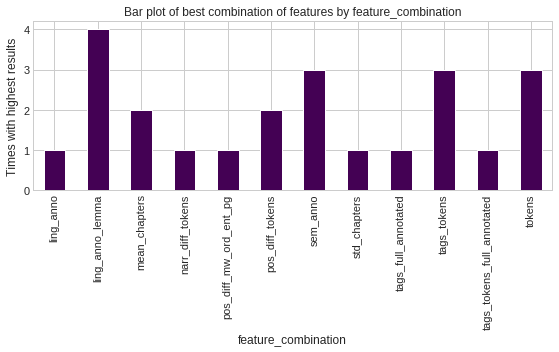

In [81]:
describe_data.grouped_bars(several_corpora_results_df.groupby("class").head(1), "feature_combination",results_chap_wdir, "best combination of features",rot=90, figsize=(8, 5), quantitative_axis_label="Times with highest results")

In [82]:
several_corpora_results_df.loc[several_corpora_results_df["feature_combination"]=="sem_anno"].groupby(["class"]).head(1).iloc[[2,-2,-1],]

class  mean_f1  mean_rec  mean_prec  baseline  f1-baseline  \
45       guerra    0.980     1.000      0.967       0.5        0.480   
1024  educación    0.668     0.704      0.657       0.5        0.168   
688      social    0.660     0.657      0.668       0.5        0.160   

     feature_combination classifier_name text_representation   MFW  \
45              sem_anno              LR       tfidf-zscores   500   
1024            sem_anno              LR               log10  1000   
688             sem_anno              LR               log10  1000   

      typography                                                f1s  \
45          True  [0.67 0.8  1.   1.   1.   0.67 0.8  0.67 0.67 ...   
1024        True  [0.47 0.71 0.53 0.5  0.71 0.71 0.8  0.53 0.5  ...   
688         True  [0.69 0.59 0.63 0.73 0.61 0.58 0.81 0.81 0.65 ...   

      test_result_pvalue                                             labels  \
45          3.133861e-21  ne0395    0\nne0037    1\nne0022    1\nne0075 ...   
1024        6.106243e-17  ne0283    0\nne0005    1\nne0053    0\nne0247 ...   
688         6.852820e-42  ne0068    1\nne0217    0\nne0370    1\nne0391 ...   

      sample_size  cv  sampling_times  \
45             36  10              10   
1024          142  10              10   
688           344  10              10   

                                             classifier  
45    LogisticRegression(C=1.0, class_weight=None, d...  
1024  LogisticRegression(C=1.0, class_weight=None, d...  
688   LogisticRegression(C=1.0, class_weight=None, d...

General patterns of parameters

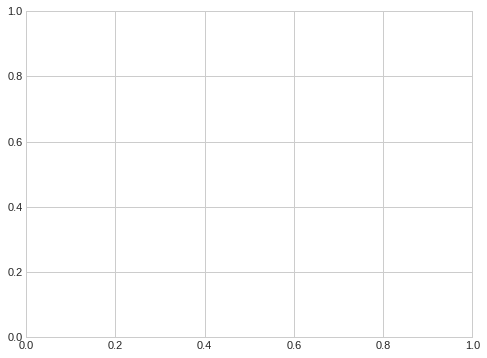

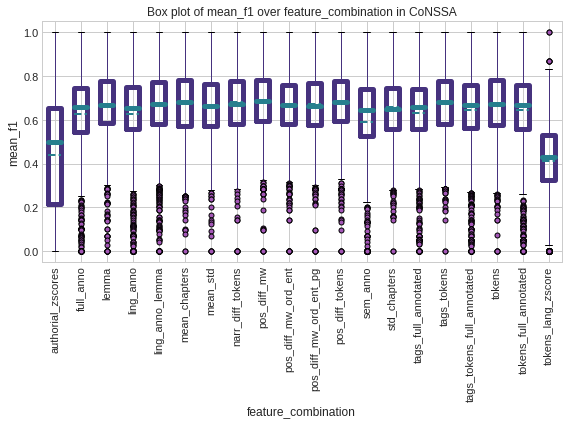

In [43]:
describe_data.boxplots(several_corpora_results_df, "mean_f1", "feature_combination", results_chap_wdir, "CoNSSA", rotation = 90, figsize=[8,6])

In [191]:
several_corpora_results_df.groupby(["class","feature_combination"]).head(1)

class  mean_f1  mean_rec  mean_prec  baseline  f1-baseline  \
567       greguería    1.000     1.000      1.000       0.5        0.500   
287          nivola    1.000     1.000      1.000       0.5        0.500   
574       greguería    1.000     1.000      1.000       0.5        0.500   
294          nivola    1.000     1.000      1.000       0.5        0.500   
588       greguería    1.000     1.000      1.000       0.5        0.500   
301          nivola    1.000     1.000      1.000       0.5        0.500   
294          nivola    1.000     1.000      1.000       0.5        0.500   
595       greguería    1.000     1.000      1.000       0.5        0.500   
567       greguería    1.000     1.000      1.000       0.5        0.500   
322          nivola    1.000     1.000      1.000       0.5        0.500   
581       greguería    1.000     1.000      1.000       0.5        0.500   
258          nivola    1.000     1.000      1.000       0.5        0.500   
522       greguería    1.000     1.000      1.000       0.5        0.500   
280          nivola    1.000     1.000      1.000       0.5        0.500   
581       greguería    1.000     1.000      1.000       0.5        0.500   
378         poética    1.000     1.000      1.000       0.5        0.500   
414          nivola    1.000     1.000      1.000       0.5        0.500   
729       greguería    1.000     1.000      1.000       0.5        0.500   
468         poética    1.000     1.000      1.000       0.5        0.500   
720       greguería    1.000     1.000      1.000       0.5        0.500   
609       greguería    1.000     1.000      1.000       0.5        0.500   
581       greguería    1.000     1.000      1.000       0.5        0.500   
301          nivola    1.000     1.000      1.000       0.5        0.500   
581       greguería    1.000     1.000      1.000       0.5        0.500   
280          nivola    1.000     1.000      1.000       0.5        0.500   
560       greguería    1.000     1.000      1.000       0.5        0.500   
287          nivola    1.000     1.000      1.000       0.5        0.500   
77          diálogo    1.000     1.000      1.000       0.5        0.500   
280          nivola    1.000     1.000      1.000       0.5        0.500   
602       greguería    1.000     1.000      1.000       0.5        0.500   
...             ...      ...       ...        ...       ...          ...   
41        biografía    0.676     0.975      0.520       0.5        0.176   
29         aventura    0.675     0.975      0.518       0.5        0.175   
1250     filosófica    0.675     0.827      0.577       0.5        0.175   
1230      educación    0.675     0.732      0.635       0.5        0.175   
94     costumbrista    0.673     0.950      0.533       0.5        0.173   
381        memorias    0.671     0.697      0.673       0.5        0.171   
998   autobiografía    0.670     0.933      0.527       0.5        0.170   
1024      educación    0.668     0.704      0.657       0.5        0.168   
1190      educación    0.667     1.000      0.500       0.5        0.167   
903        realista    0.667     1.000      0.500       0.5        0.167   
799          social    0.667     1.000      0.500       0.5        0.167   
1135      biografía    0.667     1.000      0.500       0.5        0.167   
407        memorias    0.667     1.000      0.500       0.5        0.167   
1201      educación    0.667     0.677      0.665       0.5        0.167   
1094     modernista    0.664     0.792      0.587       0.5        0.164   
1210      educación    0.664     0.720      0.637       0.5        0.164   
688          social    0.660     0.657      0.668       0.5        0.160   
1196      educación    0.657     0.675      0.678       0.5        0.157   
1536      educación    0.655     0.662      0.660       0.5        0.155   
158      filosófica    0.650     0.858      0.524       0.5        0.150   
35    autobiografía    0.649     0.933      0.500       0.5   

Interaction between feature combination and specific classes

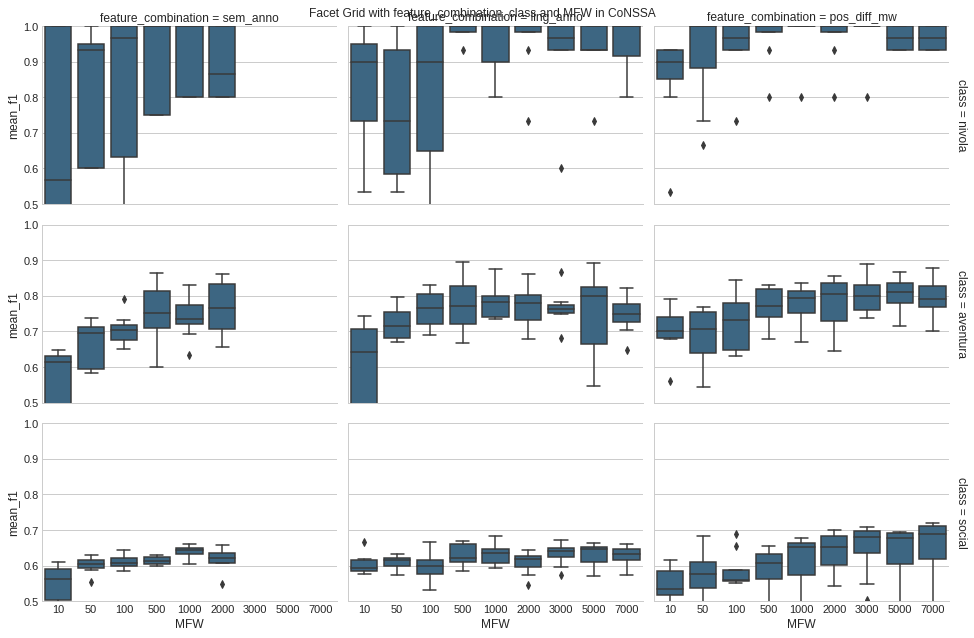

In [84]:
import seaborn as sns
describe_data.facetGrid(several_corpora_results_df.loc[(several_corpora_results_df["class"].isin(["nivola","aventura","social"]) & several_corpora_results_df["feature_combination"].isin(["sem_anno","pos_diff_mw","ling_anno"]) )],
                        "mean_f1", "feature_combination", "class","MFW",
                        results_chap_wdir, "CoNSSA", ylim = 0.5,
          type_=sns.boxplot)

Median results of feature combinations and tests about difference

In [193]:
several_corpora_results_df.groupby(["feature_combination"]).median().sort_values(by="mean_f1")["mean_f1"]

feature_combination
tokens_lang_zscore            0.4280
authorial_zscores             0.5000
sem_anno                      0.6460
std_chapters                  0.6480
ling_anno                     0.6550
tags_full_annotated           0.6600
full_anno                     0.6605
pos_diff_mw_ord_ent_pg        0.6630
mean_std                      0.6650
tags_tokens_full_annotated    0.6670
pos_diff_mw_ord_ent           0.6670
tokens_full_annotated         0.6670
lemma                         0.6680
ling_anno_lemma               0.6730
narr_diff_tokens              0.6740
tokens                        0.6740
tags_tokens                   0.6800
mean_chapters                 0.6805
pos_diff_tokens               0.6830
pos_diff_mw                   0.6845
Name: mean_f1, dtype: float64

In [52]:
st_tests.test_differences_columns(several_corpora_results_df.loc[several_corpora_results_df["feature_combination"].isin(["tokens","pos_diff_mw_ord_ent","tags_tokens_full_annotated","sem_anno","pos_diff_mw","lemma","ling_anno_lemma","mean_chapters","pos_diff_tokens","tags_tokens"])], "feature_combination", "mean_f1", equal_var=False).round(3).sort_values(by="pvalue")

value1                      value2  pvalue  \
22               mean_chapters  tags_tokens_full_annotated   0.000   
42                 tags_tokens  tags_tokens_full_annotated   0.000   
41                    sem_anno                      tokens   0.000   
40                    sem_anno  tags_tokens_full_annotated   0.000   
39                    sem_anno                 tags_tokens   0.000   
37             pos_diff_tokens  tags_tokens_full_annotated   0.000   
35             pos_diff_tokens                    sem_anno   0.000   
33         pos_diff_mw_ord_ent  tags_tokens_full_annotated   0.000   
31         pos_diff_mw_ord_ent                    sem_anno   0.000   
28                 pos_diff_mw  tags_tokens_full_annotated   0.000   
26                 pos_diff_mw                    sem_anno   0.000   
24                 pos_diff_mw         pos_diff_mw_ord_ent   0.000   
20               mean_chapters                    sem_anno   0.000   
14             ling_anno_lemma                 tags_tokens   0.000   
44  tags_tokens_full_annotated                      tokens   0.000   
5                        lemma                    sem_anno   0.000   
7                        lemma  tags_tokens_full_annotated   0.000   
12             ling_anno_lemma             pos_diff_tokens   0.000   
13             ling_anno_lemma                    sem_anno   0.000   
10             ling_anno_lemma                 pos_diff_mw   0.000   
2                        lemma                 pos_diff_mw   0.001   
9              ling_anno_lemma               mean_chapters   0.003   
29                 pos_diff_mw                      tokens   0.004   
30         pos_diff_mw_ord_ent             pos_diff_tokens   0.010   
4                        lemma             pos_diff_tokens   0.016   
15             ling_anno_lemma  tags_tokens_full_annotated   0.018   
16             ling_anno_lemma                      tokens   0.023   
17               mean_chapters                 pos_diff_mw   0.031   
32         pos_diff_mw_ord_ent                 tags_tokens   0.049   
38             pos_diff_tokens                      tokens   0.062   
6                        lemma                 tags_tokens   0.068   
0                        lemma             ling_anno_lemma   0.069   
11             ling_anno_lemma         pos_diff_mw_ord_ent   0.079   
27                 pos_diff_mw                 tags_tokens   0.107   
18               mean_chapters         pos_diff_mw_ord_ent   0.167   
43                 tags_tokens                      tokens   0.193   
1                        lemma               mean_chapters   0.209   
19               mean_chapters             pos_diff_tokens   0.262   
25                 pos_diff_mw             pos_diff_tokens   0.290   
23               mean_chapters                      tokens   0.460   
34         pos_diff_mw_ord_ent                      tokens   0.536   
36             pos_diff_tokens                 tags_tokens   0.573   
21               mean_chapters                 tags_tokens   0.577   
8                        lemma                      tokens   0.612   
3                        lemma         pos_diff_mw_ord_ent   0.920   

   significance  
22          ***  
42          ***  
41          ***  
40          ***  
39          ***  
37          ***  
35          ***  
33          ***  
31          ***  
28          ***  
26          ***  
24          ***  
20          ***  
14          ***  
44          ***  
5           ***  
7           ***  
12          ***  
13          ***  
10          ***  
2           ***  
9            **  
29           **  
30            *  
4             *  
15            *  
16            *  
17            *  
32            *  
38               
6                
0                
11               
27               
18               
43               
1                
19               
25               
23               
34               
36               
21               
8          

In [53]:
st_tests.test_differences_columns(several_corpora_results_df.loc[several_corpora_results_df["feature_combination"].isin(["tokens","pos_diff_mw",])], "feature_combination", "mean_f1", equal_var=False).round(3).sort_values(by="pvalue")

value1  value2  pvalue significance
0  pos_diff_mw  tokens   0.004           **

# 6.1.3. Knowledge Extraction about Features

## Prepare Corpus

In [16]:
ling_anno_df = pd.read_parquet(corpora_chap_wdir+"ling_anno_freq_table_raw_10000_T.parquet").T
ling_anno_df.head()

singular@num  noun@pos  masculine@gen  common@type  punctuation@pos  \
ne0001         24015     11844          11879        10020            10472   
ne0002         38693     17958          15946        15076            17330   
ne0003         30528     13084          12946        11494            13320   
ne0004         35603     15244          14397        12824            15449   
ne0005         25658     10642          10199         9464            10392   

        verb@pos  feminine@gen  determiner@pos  main@type  3@person  \
ne0001      9479          9513            8691       8414      7602   
ne0002     15671         15293           11777      13804     11970   
ne0003     12175         11201            9330      10705      9488   
ne0004     13521         12916           10858      11702      9946   
ne0005      9992          9246            7427       8809      6949   

            ...       639@ord_ent  638@ord_ent  637@ord_ent  636@ord_ent  \
ne0001      ...                 0            0            0            0   
ne0002      ...                 0            0            0            0   
ne0003      ...                 0            0            0            0   
ne0004      ...                 0            0            0            0   
ne0005      ...                 0            0            0            0   

        635@ord_ent  634@ord_ent  633@ord_ent  631@ord_ent  630@ord_ent  \
ne0001            0            0            0            0            0   
ne0002            0            0            0            0            0   
ne0003            0            0            0            0            0   
ne0004            0            0            0            0            0   
ne0005            0            0            0            0            0   

        1329@ord_ent  
ne0001             0  
ne0002             0  
ne0003             0  
ne0004             0  
ne0005             0  

[5 rows x 3285 columns]

In [197]:
pos_diff_tokens_df = pd.read_parquet(corpora_chap_wdir+"pos_diff_multiwords_freq_table_raw_10000_T.parquet").T
pos_diff_tokens_df.head()

,_punctuation  de_adposition  ._punctuation  el_determiner  \
ne0001           3448           2797           2801           2519   
ne0002           8003           4435           3105           2673   
ne0003           6493           3192           2552           2317   
ne0004           7411           3753           3099           2542   
ne0005           4827           2839           2172           1642   

        la_determiner  y_conjunction  a_adposition  en_adposition  se_pronoun  \
ne0001           1935           1904          1570           1161        1070   
ne0002           2871           3126          2294           1786        1724   
ne0003           2024           2636          1716           1321        1060   
ne0004           2441           2630          1982           1552        1146   
ne0005           1491           1878          1265           1023         914   

        que_pronoun       ...        espantaré_verb  espantagosos_noun  \
ne0001          783       ...                     0                  0   
ne0002         1683       ...                     0                  0   
ne0003         1412       ...                     0                  0   
ne0004         1421       ...                     0                  0   
ne0005         1012       ...                     0                  0   

        sorprendes_verb  aturdí_verb  rasgábase_noun  aque_noun  \
ne0001                0            0               0          0   
ne0002                0            0               0          0   
ne0003                0            0               0          0   
ne0004                0            0               0          0   
ne0005                0            0               0          0   

        pedro_urgell_noun  maretazo_noun  pedro_verde_noun  pedroches_noun  
ne0001                  0              0                 0               0  
ne0002                  0              0                 0               0  
ne0003                  0              0                 0               0  
ne0004                  0              0                 0               0  
ne0005                  0              0                 0               0  

[5 rows x 10000 columns]

In [198]:
total_features_df = load_data.merge_dfs(pos_diff_tokens_df, ling_anno_df)
total_features_df.head()

,_punctuation  singular@num  de_adposition  noun@pos  ._punctuation  \
ne0001           3448         24015           2797     11844           2801   
ne0002           8003         38693           4435     17958           3105   
ne0003           6493         30528           3192     13084           2552   
ne0004           7411         35603           3753     15244           3099   
ne0005           4827         25658           2839     10642           2172   

        masculine@gen  el_determiner  common@type  la_determiner  \
ne0001          11879           2519        10020           1935   
ne0002          15946           2673        15076           2871   
ne0003          12946           2317        11494           2024   
ne0004          14397           2542        12824           2441   
ne0005          10199           1642         9464           1491   

        punctuation@pos       ...        espantaré_verb  espantagosos_noun  \
ne0001            10472       ...                     0                  0   
ne0002            17330       ...                     0                  0   
ne0003            13320       ...                     0                  0   
ne0004            15449       ...                     0                  0   
ne0005            10392       ...                     0                  0   

        sorprendes_verb  aturdí_verb  rasgábase_noun  aque_noun  \
ne0001                0            0               0          0   
ne0002                0            0               0          0   
ne0003                0            0               0          0   
ne0004                0            0               0          0   
ne0005                0            0               0          0   

        pedro_urgell_noun  maretazo_noun  pedro_verde_noun  pedroches_noun  
ne0001                  0              0                 0               0  
ne0002                  0              0                 0               0  
ne0003                  0              0                 0               0  
ne0004                  0              0                 0               0  
ne0005                  0              0                 0               0  

[5 rows x 13285 columns]

In [199]:
total_features_df = load_data.merge_dfs(total_features_df, tags_metadata_df)
total_features_df.head()

,_punctuation  am.divs  singular@num  am.verses  de_adposition  \
ne0001           3448       41         24015         71           2797   
ne0002           8003       42         38693          0           4435   
ne0003           6493       41         30528          0           3192   
ne0004           7411       45         35603          0           3753   
ne0005           4827       30         25658          0           2839   

        am.sps  noun@pos  am.paragraphs  ._punctuation  am.pds  \
ne0001       0     11844           2354           2801    1242   
ne0002       0     17958           1498           3105    1104   
ne0003       0     13084           1160           2552     851   
ne0004       0     15244           1272           3099     978   
ne0005       0     10642            556           2172     299   

             ...        espantaré_verb  espantagosos_noun  sorprendes_verb  \
ne0001       ...                     0                  0                0   
ne0002       ...                     0                  0                0   
ne0003       ...                     0                  0                0   
ne0004       ...                     0                  0                0   
ne0005       ...                     0                  0                0   

        aturdí_verb  rasgábase_noun  aque_noun  pedro_urgell_noun  \
ne0001            0               0          0                  0   
ne0002            0               0          0                  0   
ne0003            0               0          0                  0   
ne0004            0               0          0                  0   
ne0005            0               0          0                  0   

        maretazo_noun  pedro_verde_noun  pedroches_noun  
ne0001              0                 0               0  
ne0002              0                 0               0  
ne0003              0                 0               0  
ne0004              0                 0               0  
ne0005              0                 0               0  

[5 rows x 13297 columns]

In [200]:
total_features_rel_df = total_features_df.divide(metadata_df["am.tokens"],axis=0)
total_features_rel_df.head()

,_punctuation   am.divs  singular@num  am.verses  de_adposition  \
ne0001       0.064356  0.000765      0.448233   0.001325       0.052205   
ne0002       0.095511  0.000501      0.461780   0.000000       0.052929   
ne0003       0.100304  0.000633      0.471599   0.000000       0.049310   
ne0004       0.101035  0.000613      0.485379   0.000000       0.051165   
ne0005       0.091833  0.000571      0.488138   0.000000       0.054011   

        am.sps  noun@pos  am.paragraphs  ._punctuation    am.pds  \
ne0001     0.0  0.221065       0.043937       0.052280  0.023182   
ne0002     0.0  0.214319       0.017878       0.037056  0.013176   
ne0003     0.0  0.202123       0.017920       0.039423  0.013146   
ne0004     0.0  0.207823       0.017341       0.042249  0.013333   
ne0005     0.0  0.202462       0.010578       0.041322  0.005688   

             ...        espantaré_verb  espantagosos_noun  sorprendes_verb  \
ne0001       ...                   0.0                0.0              0.0   
ne0002       ...                   0.0                0.0              0.0   
ne0003       ...                   0.0                0.0              0.0   
ne0004       ...                   0.0                0.0              0.0   
ne0005       ...                   0.0                0.0              0.0   

        aturdí_verb  rasgábase_noun  aque_noun  pedro_urgell_noun  \
ne0001          0.0             0.0        0.0                0.0   
ne0002          0.0             0.0        0.0                0.0   
ne0003          0.0             0.0        0.0                0.0   
ne0004          0.0             0.0        0.0                0.0   
ne0005          0.0             0.0        0.0                0.0   

        maretazo_noun  pedro_verde_noun  pedroches_noun  
ne0001            0.0               0.0             0.0  
ne0002            0.0               0.0             0.0  
ne0003            0.0               0.0             0.0  
ne0004            0.0               0.0             0.0  
ne0005            0.0               0.0             0.0  

[5 rows x 13297 columns]

In [201]:
total_features_rel_df["proverbs@type"].head()

ne0001    0.000019
ne0002    0.000012
ne0003    0.000000
ne0004    0.000027
ne0005    0.000019
Name: proverbs@type, dtype: float64

In [202]:
total_features_rel_df["dis-part@type"].head()

ne0001    0.001307
ne0002    0.002256
ne0003    0.002734
ne0004    0.002331
ne0005    0.002511
Name: dis-part@type, dtype: float64

In [203]:
total_features_rel_df.columns.get_loc('0@ord_ent')

1157

## Calculations

Calculations for the knowledge extraction

In [ ]:
scores_subgenres_df = feature_analysis.calculate_scores_subgenres(results_chap_wdir, total_features_rel_df, metadata_df, subgenres, text_representation = "log", max_MFF = 3000, sampling_times= 100)

In [205]:
scores_subgenres_df = pd.read_csv(results_chap_wdir+"3000_100scores_subgenre.csv", sep="\t", index_col=0)

In [206]:
scores_subgenres_df.shape

(23, 3000)

Scores of each feature for each subgenre

In [207]:
scores_subgenres_df.head()

!_punctuation  (_punctuation  )_punctuation  ,_punctuation  \
guerra          0.006673      -0.016463      -0.018079      -0.001395   
diálogo         0.006748       0.030157       0.031596       0.000218   
histórica       0.014268      -0.124638      -0.115930      -0.003719   
humor           0.024402       0.018252       0.013318      -0.008044   
aventura       -0.017485      -0.040981      -0.038387      -0.000009   

           -_punctuation  ..._punctuation  ._punctuation  0@ord_ent  \
guerra         -0.053011        -0.001894       0.004164  -0.011254   
diálogo        -0.023869        -0.011992       0.007018  -0.001198   
histórica      -0.037540        -0.132144       0.004453   0.023765   
humor          -0.004943        -0.088929      -0.000551  -0.008361   
aventura       -0.047111        -0.153993      -0.000297   0.008037   

           1@ord_ent  1@person      ...        órgano@mariax  \
guerra     -0.005498 -0.006778      ...             0.006167   
diálogo    -0.002198  0.006119      ...             0.000615   
histórica  -0.003719 -0.010888      ...             0.021181   
humor      -0.018763 -0.011973      ...            -0.007369   
aventura   -0.001276  0.025549      ...            -0.010562   

           última_adjective  últimas_adjective  último_adjective  \
guerra             0.006647           0.019400          0.000144   
diálogo           -0.008733          -0.000275         -0.002237   
histórica         -0.002462          -0.062541         -0.020069   
humor             -0.007700           0.020894          0.030823   
aventura          -0.009438          -0.063394         -0.004652   

           últimos_adjective  única_adjective  único_adjective  útero@mariax  \
guerra              0.012553        -0.001641         0.001330     -0.006891   
diálogo            -0.006521        -0.005033         0.000741     -0.005509   
histórica          -0.002319        -0.011694        -0.006286     -0.018666   
humor               0.003232         0.015356         0.035292      0.009809   
aventura           -0.042844        -0.010959         0.004242     -0.011992   

           útil@mariax  —_punctuation  
guerra        0.001991       0.035265  
diálogo       0.002388      -0.026074  
histórica     0.015477       0.025742  
humor        -0.000991       0.000079  
aventura      0.003230       0.054977  

[5 rows x 3000 columns]

Minimal and maximal coefficients in the data-frame

In [208]:
import numpy as np
np.array([value for row in scores_subgenres_df.values.tolist() for value in row]).min()

-0.2713895905168397

In [209]:
np.array([value for row in scores_subgenres_df.values.tolist() for value in row]).max()

0.30389148120184695

Highest and lowest scores of Madrid in the different subgenres

In [210]:
pd.DataFrame(scores_subgenres_df["madrid_noun"].sort_values()).iloc[[0,1,2,3,-4,-3,-2,-1],]

madrid_noun
filosófica     -0.134980
aventura       -0.064299
fantástico     -0.050329
nivola         -0.018514
biografía       0.051685
naturalista     0.070304
social          0.133185
realista        0.241530

## Analysis

General tendency of each feature in all these subgenres

In [211]:
tendencies_coefs_df = feature_analysis.calculate_tendencies_coefs(scores_subgenres_df, total_features_rel_df)

                 mean-coef  std-coef  mean_relative_freq
am.sps            0.053881  0.058115            0.000967
madrid_noun       0.047459  0.055398            0.000299
..._punctuation   0.046283  0.045929            0.005926
etc@type          0.042753  0.042456            0.005978
españa_noun       0.042745  0.037560            0.000228


Top 20 features with highest scores

In [212]:
tendencies_coefs_df.head(20)

mean-coef  std-coef  mean_relative_freq
am.sps                0.053881  0.058115            0.000967
madrid_noun           0.047459  0.055398            0.000299
..._punctuation       0.046283  0.045929            0.005926
etc@type              0.042753  0.042456            0.005978
españa_noun           0.042745  0.037560            0.000228
am.verses             0.041659  0.044234            0.000705
comenzó_verb          0.039359  0.034736            0.000164
mar_noun              0.039090  0.062839            0.000283
-_punctuation         0.038237  0.028002            0.004707
quizá_adverb          0.038071  0.035545            0.000155
am.parts              0.038061  0.064880            0.000035
rey_noun              0.037724  0.053757            0.000159
muchacha_noun         0.037392  0.037898            0.000164
maestro_noun          0.037178  0.043333            0.000125
papeles_noun          0.037059  0.031262            0.000077
am.sections           0.036714  0.034159            0.000149
hombre_interjection   0.036525  0.064401            0.000074
ésta_pronoun          0.036418  0.033672            0.000147
éste_pronoun          0.036034  0.032323            0.000233
en_seguida_adverb     0.035614  0.034577            0.000124

In [213]:
tendencies_coefs_df.tail(3)

mean-coef  std-coef  mean_relative_freq
masculine@gen   0.001839  0.003225            0.220734
verb@pos        0.001793  0.001900            0.177512
common@gen      0.001783  0.002364            0.112907

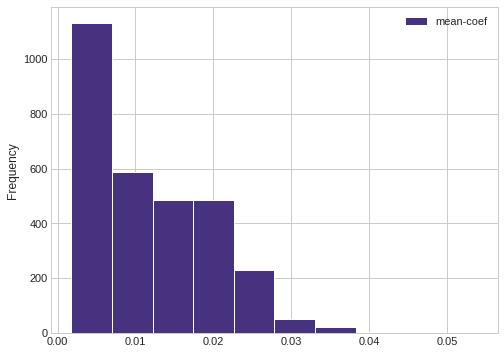

In [214]:
tendencies_coefs_df[["mean-coef"]].plot.hist()

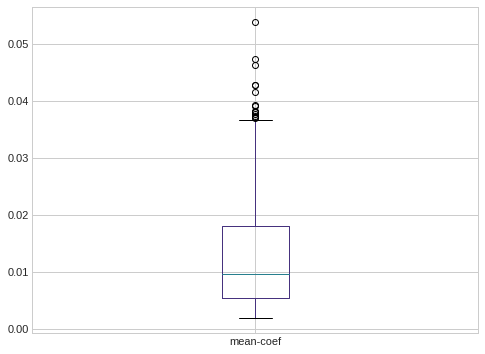

In [215]:
tendencies_coefs_df[["mean-coef"]].plot.box()

In [216]:
tendencies_coefs_df.iloc[400]

mean-coef             0.021416
std-coef              0.024773
mean_relative_freq    0.000059
Name: mismo_pronoun, dtype: float64

Features with highest scores

In [217]:
print(tendencies_coefs_df.head(100).index.tolist())

['am.sps', 'madrid_noun', '..._punctuation', 'etc@type', 'españa_noun', 'am.verses', 'comenzó_verb', 'mar_noun', '-_punctuation', 'quizá_adverb', 'am.parts', 'rey_noun', 'muchacha_noun', 'maestro_noun', 'papeles_noun', 'am.sections', 'hombre_interjection', 'ésta_pronoun', 'éste_pronoun', 'en_seguida_adverb', 'dama_noun', 'tras_adposition', 'caballero_noun', 'discurso_noun', 'este_pronoun', 'guerra_noun', 'enemigo_noun', 'míos_adjective', 'amiga_noun', 'usted_pronoun', 'mozo_noun', 'embargo_noun', 'exclamó_verb', 'hermano_noun', 'espejo_noun', 'miserable_adjective', 'bella_adjective', 'suave_adjective', 'letras_noun', 'situación_noun', 'tío_noun', 'vi_verb', 'minutos_noun', 'justicia_noun', 'tardes_noun', 'condición_noun', 'experiencia_noun', 'sintiendo_verb', 'país_noun', 'amable_adjective', 'realidad_noun', 'nuestro_determiner', 'viaje_noun', 'hallaba_verb', 'fue_verb', 'ay_interjection', 'vio_verb', 'caballo_noun', 'invierno_noun', 'barba_noun', 'ciudad_noun', 'reía_verb', 'seco_adje

Some examples

In [218]:
tendencies_coefs_df.loc["am.pds"]

mean-coef             0.019471
std-coef              0.016701
mean_relative_freq    0.011223
Name: am.pds, dtype: float64

In [219]:
tendencies_coefs_df.loc["mar_noun"]

mean-coef             0.039090
std-coef              0.062839
mean_relative_freq    0.000283
Name: mar_noun, dtype: float64

In [220]:
tendencies_coefs_df.loc["0@ord_ent"]

mean-coef             0.017292
std-coef              0.020214
mean_relative_freq    0.003460
Name: 0@ord_ent, dtype: float64

In [221]:
pd.DataFrame(scores_subgenres_df["mar_noun"].sort_values()).iloc[[0,1,2,3,10,-4,-3,-2,-1],]

mar_noun
social            -0.266652
realista          -0.178496
filosófica        -0.066926
humor             -0.051684
episodio nacional  0.001477
histórica          0.023184
guerra             0.029319
educación          0.048777
aventura           0.075000

In [222]:
pd.DataFrame(scores_subgenres_df["am.verses"].sort_values()).iloc[[0,1,2,3,-4,-3,-2,-1],]

am.verses
social         -0.183094
naturalista    -0.059063
aventura       -0.055409
espiritual     -0.044627
psicológica     0.053782
histórica       0.079178
autobiografía   0.096918
biografía       0.126209

In [223]:
pd.DataFrame(scores_subgenres_df["..._punctuation"].sort_values()).iloc[[0,1,2,3,-4,-3,-2,-1],]

..._punctuation
aventura                 -0.153993
histórica                -0.132144
episodio nacional        -0.120711
humor                    -0.088929
erótica                   0.049652
filosófica                0.068423
social                    0.083564
naturalista               0.095431

In [224]:
pd.DataFrame(scores_subgenres_df["am.sps"].sort_values()).iloc[[0,1,2,3,-4,-3,-2,-1],]

am.sps
histórica    -0.085189
realista     -0.056427
costumbrista -0.024253
guerra       -0.023258
diálogo       0.102870
filosófica    0.121878
educación     0.138607
social        0.245747

In [225]:
pd.DataFrame(scores_subgenres_df["dis-part@type"].sort_values()).iloc[[0,1,2,3,-4,-3,-2,-1],]

dis-part@type
histórica              -0.015043
realista               -0.014340
episodio nacional      -0.009156
aventura               -0.008305
memorias                0.009179
autobiografía           0.010872
biografía               0.015427
social                  0.019427

Proverbs tend to be ver low in the table

In [226]:
try:
    pd.DataFrame(scores_subgenres_df["proverbs@type"].sort_values()).iloc[[0,1,2,3,-4,-3,-2,-1],]
except:
    pass

In [227]:
tendencies_coefs_df.head()

mean-coef  std-coef  mean_relative_freq
am.sps            0.053881  0.058115            0.000967
madrid_noun       0.047459  0.055398            0.000299
..._punctuation   0.046283  0.045929            0.005926
etc@type          0.042753  0.042456            0.005978
españa_noun       0.042745  0.037560            0.000228

Correlation between frequency of features and their mean coefficient

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


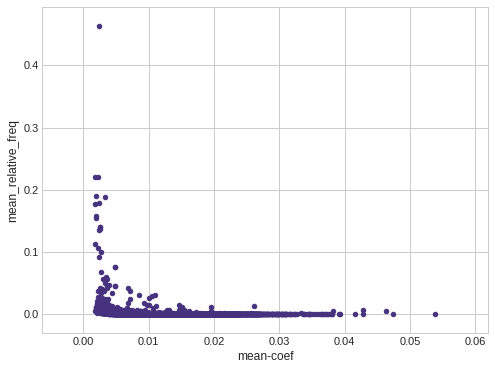

In [228]:
tendencies_coefs_df.plot.scatter("mean-coef","mean_relative_freq",)

In [229]:
stats.pearsonr(tendencies_coefs_df["mean_relative_freq"], tendencies_coefs_df["mean-coef"])

(-0.19829424077724314, 5.595578682040582e-28)

Correlation between the mean coefficient and the standard deviation coefficient

In [231]:
stats.pearsonr(tendencies_coefs_df["std-coef"], tendencies_coefs_df["mean-coef"])

(0.9371813977049437, 0.0)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


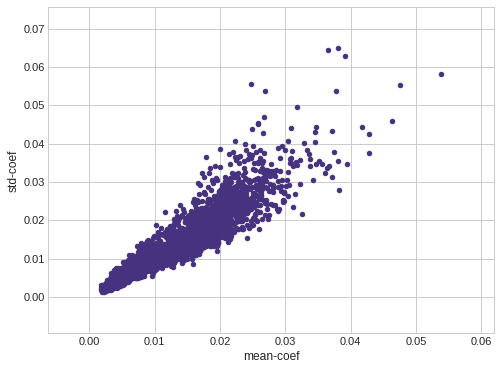

In [232]:
tendencies_coefs_df.plot.scatter("mean-coef","std-coef")

Which are the most stable features with highest coefficients across subgenres?

In [ ]:
tendencies_coefs_df["mean-std"] = tendencies_coefs_df["mean-coef"] - tendencies_coefs_df["std-coef"]

In [233]:
tendencies_coefs_df.sort_values(by="mean-std",ascending=False).head(20)

mean-coef  std-coef  mean_relative_freq  mean-std
embargo_noun         0.032466  0.021744            0.000228  0.010721
-_punctuation        0.038237  0.028002            0.004707  0.010235
nombres_noun         0.024168  0.015267            0.000052  0.008902
blancas_adjective    0.025883  0.017836            0.000097  0.008048
situación_noun       0.031098  0.023445            0.000104  0.007652
antiguo_adjective    0.019485  0.012045            0.000107  0.007440
ah_interjection      0.015897  0.008615            0.000198  0.007282
perro_noun           0.027312  0.020217            0.000114  0.007095
efecto_noun          0.021175  0.014445            0.000132  0.006730
plata_noun           0.021579  0.015033            0.000104  0.006546
hubiese_verb         0.024414  0.017893            0.000184  0.006521
notas_noun           0.028819  0.022456            0.000045  0.006363
has_verb             0.019454  0.013227            0.000301  0.006228
esperando_verb       0.026455  0.020236            0.000072  0.006219
prisa_noun           0.024986  0.018784            0.000047  0.006202
fiesta_noun          0.021540  0.015370            0.000087  0.006170
sentimiento_noun     0.024870  0.018714            0.000090  0.006156
comedor_noun         0.024583  0.018475            0.000085  0.006108
rápidamente_adverb   0.027521  0.021461            0.000061  0.006060
marido_noun          0.019500  0.013526            0.000245  0.005974

Linguistic categories in the features

In [234]:
print(list(set(["_"+re.sub(r".*_(.+)", r"\1", item) for item in tendencies_coefs_df.index.tolist() if "_" in item])))

['_conjunction', '_number', '_punctuation', '_adposition', '_adverb', '_verb', '_noun', '_pronoun', '_ent', '_adjective', '_determiner', '_interjection']


In [235]:
types_tendencies_coefs_df = feature_analysis.extract_type_of_feature(tendencies_coefs_df)


len types 27
@cases
@gens
@lemmas
@mariaxs
@moods
@nums
@persons
@poss
@possessornums
@tenses
@types
@wnlexs
@ord_ents
dis-part@s
proverbs@s
ams
_verbs
_adpositions
_pronouns
_adjectives
_determiners
_nouns
_numbers
_conjunctions
_adverbs
_interjections
_punctuations


Categorization of the features by their linguistic properties

In [236]:
types_tendencies_coefs_df.head()

mean-coef  std-coef  mean_relative_freq  mean-std  \
am.sps            0.053881  0.058115            0.000967 -0.004233   
madrid_noun       0.047459  0.055398            0.000299 -0.007938   
..._punctuation   0.046283  0.045929            0.005926  0.000354   
etc@type          0.042753  0.042456            0.005978  0.000297   
españa_noun       0.042745  0.037560            0.000228  0.005185   

                        features  cases  gens  lemmas  mariaxs  moods  ...    \
am.sps                    am.sps      0     0       0        0      0  ...     
madrid_noun          madrid_noun      0     0       0        0      0  ...     
..._punctuation  ..._punctuation      0     0       0        0      0  ...     
etc@type                etc@type      0     0       0        0      0  ...     
españa_noun          españa_noun      0     0       0        0      0  ...     

                 pronouns  adjectives  determiners  nouns  numbers  \
am.sps                  0           0            0      0        0   
madrid_noun             0           0            0      1        0   
..._punctuation         0           0            0      0        0   
etc@type                0           0            0      0        0   
españa_noun             0           0            0      1        0   

                 conjunctions  adverbs  interjections  punctuations  token  
am.sps                      0        0              0             0      0  
madrid_noun                 0        0              0             0      1  
..._punctuation             0        0              0             1      0  
etc@type                    0        0              0             0      0  
españa_noun                 0        0              0             0      1  

[5 rows x 33 columns]

In [237]:
types_tendencies_coefs_df.rename(columns={"ams":"TEI-tags","token":"tokens"}, inplace=True)

Visualization of the coefficients of TEI-tags vs. the rest

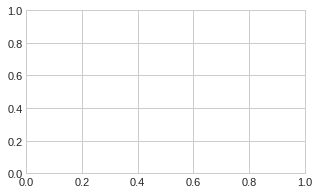

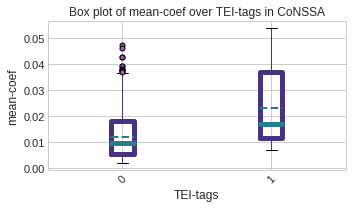

In [252]:
describe_data.boxplots(types_tendencies_coefs_df, "mean-coef", "TEI-tags", results_chap_wdir, "CoNSSA", figsize=[5,3])

How high are in general the coefficients of the categories, and how high are they in comparison to the rest?

In [253]:
type_feature_results_df = feature_analysis.calculate_welch_test_types_coef(types_tendencies_coefs_df)

type_feature_results_df["percetange-gain"] = ((type_feature_results_df["difference"] * 100)/types_tendencies_coefs_df["mean-coef"].max()).round(2)

type_feature_results_df["percetange-gain"] = type_feature_results_df["percetange-gain"].astype(str) + " %"
type_feature_results_df.round(5)


ignoring mean-coef
ignoring std-coef
ignoring mean_relative_freq
ignoring mean-std
ignoring features


/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


type-feature  p-value  difference percetange-gain
25  interjections  0.00007     0.01382         25.65 %
15       TEI-tags  0.02864     0.01111         20.62 %
21          nouns  0.00000     0.00790         14.66 %
26   punctuations  0.04805     0.00689         12.79 %
19     adjectives  0.00000     0.00643         11.93 %
27         tokens  0.00000     0.00591         10.97 %
16          verbs  0.00000     0.00537          9.96 %
22        numbers  0.00929     0.00469          8.71 %
24        adverbs  0.00000     0.00396          7.34 %
18       pronouns  0.00082     0.00292          5.42 %
12       ord_ents  0.03547     0.00281          5.22 %
17    adpositions  0.34134     0.00135           2.5 %
20    determiners  0.08310     0.00131          2.43 %
23   conjunctions  0.65445     0.00075          1.38 %
8   possessornums  0.88343     0.00074          1.38 %
14      proverbss  0.00000     0.00000           0.0 %
2          lemmas  0.00000     0.00000           0.0 %
6         persons  0.31150    -0.00381         -7.07 %
9          tenses  0.04347    -0.00485         -9.01 %
10          types  0.00240    -0.00499         -9.27 %
13      dis-parts  0.00000    -0.00508         -9.42 %
0           cases  0.02459    -0.00523         -9.71 %
3         mariaxs  0.00000    -0.00604        -11.21 %
7            poss  0.00064    -0.00646         -12.0 %
11         wnlexs  0.00000    -0.00715        -13.27 %
4           moods  0.00030    -0.00807        -14.98 %
5            nums  0.00000    -0.00968        -17.97 %
1            gens  0.00000    -0.00997         -18.5 %

In [254]:
type_feature_results_df.loc[(type_feature_results_df["difference"]> 0) & (type_feature_results_df["p-value"]< 0.05)].sort_values(by="difference", ascending=False).round(3)[['type-feature', 'p-value', 'percetange-gain']]

type-feature  p-value percetange-gain
25  interjections    0.000         25.65 %
15       TEI-tags    0.029         20.62 %
21          nouns    0.000         14.66 %
26   punctuations    0.048         12.79 %
19     adjectives    0.000         11.93 %
27         tokens    0.000         10.97 %
16          verbs    0.000          9.96 %
22        numbers    0.009          8.71 %
24        adverbs    0.000          7.34 %
18       pronouns    0.001          5.42 %
12       ord_ents    0.035          5.22 %

In [255]:
type_feature_results_df.loc[(type_feature_results_df["difference"]> 0) & (type_feature_results_df["p-value"]< 0.05)].sort_values(by="difference").round(3).shape

(11, 4)

Top linguistic annotation with highest coefficients

In [256]:
[index for index in tendencies_coefs_df.index.tolist() if "@" in index and "@ord_ent" not in index][0:20]

['etc@type',
 'quotation@type',
 'plural@possessornum',
 'montar@mariax',
 'vehículo@mariax',
 'mercado@mariax',
 'colegio@mariax',
 'organization@neclass',
 'ola@mariax',
 'despedir@mariax',
 'soldado@mariax',
 'obrero@mariax',
 'semicolon@type',
 'municipio@mariax',
 'exclamationmark@type',
 'singular@possessornum',
 'radio@mariax',
 'barro@mariax',
 'tacaño@mariax',
 'fanfarrón@mariax']

In [257]:
tendencies_coefs_df.index.get_loc("quotation@type")


586

In [258]:
tendencies_coefs_df.index.get_loc("plural@possessornum")


611

In [259]:
tendencies_coefs_df.index.get_loc("montar@mariax")


628

Some examples of the effect of linguistic annotation in specific subgenres

In [260]:
pd.DataFrame(scores_subgenres_df["vehículo@mariax"].sort_values()).iloc[[0,1,2,11,12,-3,-2,-1]]

vehículo@mariax
realista           -0.070250
social             -0.067993
naturalista        -0.057622
diálogo            -0.002484
filosófica         -0.001892
guerra              0.018978
educación           0.021431
aventura            0.027179

In [261]:
pd.DataFrame(scores_subgenres_df["future@tense"].sort_values()).iloc[[0,1,2,-3,-2,-1]]

future@tense
histórica       -0.035075
naturalista     -0.032050
realista        -0.031060
psicológica      0.020228
filosófica       0.027694
social           0.035782

In [262]:
most_usefull_ling_features = sorted([index for index in tendencies_coefs_df.index.tolist() if "@" in index and "@ord_ent" not in index][0:1000])

In [263]:
print(most_usefull_ling_features)

['1@person', '2@person', 'abandonar@mariax', 'abatir@mariax', 'abeja@mariax', 'abrigar@mariax', 'abundar@mariax', 'abusar@mariax', 'accusative@case', 'acoger@mariax', 'actitud@mariax', 'actividad@mariax', 'actor@mariax', 'acusar@mariax', 'adelantar@mariax', 'ademán@mariax', 'adivinar@mariax', 'adj.pert@wnlex', 'adjetivo@mariax', 'admirar@mariax', 'admitir@mariax', 'aduana@mariax', 'afectación@mariax', 'afeminado@mariax', 'afición@mariax', 'afluir@mariax', 'afán@mariax', 'agitar@mariax', 'agradar@mariax', 'agradecer@mariax', 'agua@mariax', 'ahora@mariax', 'ahorrar@mariax', 'ahuyentar@mariax', 'aislar@mariax', 'ajetrear@mariax', 'alabar@mariax', 'albergar@mariax', 'alfombra@mariax', 'alimentar@mariax', 'alisar@mariax', 'aliviar@mariax', 'alma@mariax', 'alojar@mariax', 'altar@mariax', 'alterar@mariax', 'alternar@mariax', 'amable@mariax', 'amancebarse@mariax', 'ambición@mariax', 'amigo@mariax', 'ancho@mariax', 'angustia@mariax', 'anormal@mariax', 'ansiar@mariax', 'antiguo@mariax', 'antipat

In [264]:
Counter([re.sub(r".*?@(.*?)", r"\1", index) for index in tendencies_coefs_df.index.tolist() if "@" in index and "@ord_ent" not in index][0:1000]).most_common()

[('mariax', 949),
 ('wnlex', 17),
 ('type', 13),
 ('neclass', 4),
 ('tense', 3),
 ('case', 3),
 ('possessornum', 2),
 ('person', 2),
 ('pos', 2),
 ('punctenclose', 2),
 ('mood', 2),
 ('degree', 1)]

In [265]:
print([index for index in tendencies_coefs_df.index.tolist() if "@mariax" in index ][0:20])

['montar@mariax', 'vehículo@mariax', 'mercado@mariax', 'colegio@mariax', 'ola@mariax', 'despedir@mariax', 'soldado@mariax', 'obrero@mariax', 'municipio@mariax', 'radio@mariax', 'barro@mariax', 'tacaño@mariax', 'fanfarrón@mariax', 'llorar@mariax', 'pobre@mariax', 'polvo@mariax', 'cobertizo@mariax', 'universidad@mariax', 'costa@mariax', 'cristiano@mariax']


In [266]:
pd.DataFrame(scores_subgenres_df["universidad@mariax"].sort_values()).iloc[[0,1,2,-3,-2,-1]]

universidad@mariax
realista             -0.035705
social               -0.035330
guerra               -0.011974
espiritual            0.027984
educación             0.043026
filosófica            0.055125

The most usefull linguistic values are saved separely

In [267]:
pd.DataFrame(most_usefull_ling_features, columns=["most_useful_ling_features"]).to_csv(corpora_chap_wdir+"most_useful_ling_features.csv",sep="\t")

## Narrative Features

Analysis of why the narrative differentiated features are not working better

In [13]:
narr_diff_tokens_df = pd.read_parquet(corpora_chap_wdir+"narr_diff_tokens_freq_table_raw_10000_T.parquet").T

/usr/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [14]:
rel_narr_diff_tokens_df = narr_diff_tokens_df.divide(metadata_df["am.tokens"],axis=0)

In [15]:
rel_narr_diff_tokens_df.head()

,_nr     de_nr     el_nr      ._nr     la_nr      y_nr      a_nr  \
ne0001  0.047707  0.047240  0.040353  0.035612  0.031170  0.028221  0.023872   
ne0002  0.065532  0.042725  0.025086  0.022389  0.029717  0.026769  0.020145   
ne0003  0.055181  0.033321  0.023064  0.018121  0.021102  0.022925  0.016421   
ne0004  0.054532  0.032856  0.021486  0.019536  0.021295  0.020327  0.016210   
ne0005  0.059357  0.040998  0.023267  0.022316  0.023686  0.024428  0.017978   

          que_nr     en_nr      ,_ds          ...            morrudo_nr  \
ne0001  0.015641  0.018758  0.016649          ...                   0.0   
ne0002  0.023487  0.016840  0.029979          ...                   0.0   
ne0003  0.018723  0.013193  0.045124          ...                   0.0   
ne0004  0.016578  0.012883  0.046502          ...                   0.0   
ne0005  0.021137  0.014763  0.032475          ...                   0.0   

        otorgo_nr  hondísimos_nr  doña_malvina_ds  presumidín_nr  \
ne0001        0.0       0.000000         0.000000            0.0   
ne0002        0.0       0.000000         0.000000            0.0   
ne0003        0.0       0.000000         0.000000            0.0   
ne0004        0.0       0.000000         0.000000            0.0   
ne0005        0.0       0.000019         0.000057            0.0   

        prevalecerán_nr  prevalecen_nr  consocios_ds  pretty_inn_nr  \
ne0001              0.0            0.0           0.0            0.0   
ne0002              0.0            0.0           0.0            0.0   
ne0003              0.0            0.0           0.0            0.0   
ne0004              0.0            0.0           0.0            0.0   
ne0005              0.0            0.0           0.0            0.0   

        doña_juana_la_loca_nr  
ne0001               0.000000  
ne0002               0.000000  
ne0003               0.000000  
ne0004               0.000014  
ne0005               0.000000  

[5 rows x 10000 columns]

In [ ]:
narr_scores_subgenres_df = feature_analysis.calculate_scores_subgenres(results_chap_wdir, rel_narr_diff_tokens_df, metadata_df, subgenres, text_representation = "log", max_MFF = 3000, sampling_times= 10)


In [17]:
tendencies_coefs_narr_df = feature_analysis.calculate_tendencies_coefs(narr_scores_subgenres_df, rel_narr_diff_tokens_df)


         mean-coef  std-coef  mean_relative_freq
..._ds    0.033396  0.031757            0.003708
..._nr    0.030958  0.031882            0.002218
—_ds      0.030476  0.030103            0.010627
mar_nr    0.026945  0.041389            0.000243
tren_nr   0.024921  0.032617            0.000087


The highest features by their coefficient. The top 2 are the same feature, only in different part of the text

In [34]:
tendencies_coefs_narr_df.head(20)

mean-coef  std-coef  mean_relative_freq
..._ds        0.033396  0.031757            0.003708
..._nr        0.030958  0.031882            0.002218
—_ds          0.030476  0.030103            0.010627
mar_nr        0.026945  0.041389            0.000243
tren_nr       0.024921  0.032617            0.000087
madrid_nr     0.024055  0.025054            0.000222
españa_nr     0.023978  0.025148            0.000154
armas_nr      0.023924  0.026452            0.000056
mi_nr         0.023897  0.025534            0.001500
mis_nr        0.023360  0.025862            0.000431
maestro_nr    0.022787  0.025855            0.000092
guerra_nr     0.022669  0.016844            0.000132
rey_nr        0.022330  0.025986            0.000104
-_nr          0.022057  0.021301            0.000813
caballos_nr   0.021880  0.022120            0.000073
niña_nr       0.021736  0.022037            0.000204
-_ds          0.021733  0.018354            0.003894
lanza_nr      0.021730  0.020797            0.000024
besar_nr      0.021723  0.027238            0.000041
rosa_nr       0.021166  0.027992            0.000092

In [43]:
narr_scores_subgenres_df[["..._ds","..._nr"]].corr()

..._ds    ..._nr
..._ds  1.000000  0.959128
..._nr  0.959128  1.000000

Are the coefficients of these feature correlating?

In [19]:
results_correlation_features_df = feature_analysis.compare_narr_ds_features(narr_scores_subgenres_df)

In [20]:
results_correlation_features_df.head()

feature         r    pvalue  absolute-r
210     creía -0.000411  0.998516    0.000411
977      sabe  0.001372  0.995041    0.001372
798       par -0.004022  0.985468    0.004022
320      duda -0.004492  0.983770    0.004492
1032  siempre -0.005006  0.981913    0.005006

In [21]:
results_correlation_features_df.tail()

feature    r  pvalue  absolute-r
363     era  1.0     0.0         1.0
797     par  1.0     0.0         1.0
361   entre  1.0     0.0         1.0
368      es  1.0     0.0         1.0
0         !  1.0     0.0         1.0

In [22]:
results_correlation_features_df.mean()

r             0.655710
pvalue        0.131904
absolute-r    0.694141
dtype: float64

In [23]:
results_correlation_features_df.median()

r             1.0
pvalue        0.0
absolute-r    1.0
dtype: float64

In [24]:
results_correlation_features_df.std()

r             0.430974
pvalue        0.252243
absolute-r    0.365816
dtype: float64

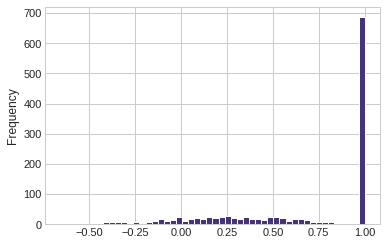

In [25]:
results_correlation_features_df["r"].plot.hist(bins=50)

Yes, the coefficients of the same feature but in the narrative and direct speech segments tend to have a very strong correlation.

In [26]:
results_correlation_features_df.sort_values(by="r")

feature         r    pvalue  absolute-r
986      salido -0.657944  0.000644    0.657944
405       estoy -0.566458  0.004833    0.566458
386        esta -0.483761  0.019346    0.483761
725       nadie -0.467590  0.024459    0.467590
583       llega -0.432419  0.039327    0.432419
277   demasiado -0.426916  0.042187    0.426916
480       hacen -0.425329  0.043042    0.425329
1097    tendría -0.424107  0.043709    0.424107
44      algunas -0.420631  0.045651    0.420631
388      estaba -0.419286  0.046421    0.419286
916      pueden -0.410252  0.051853    0.410252
919       puedo -0.401821  0.057354    0.401821
488        haga -0.393535  0.063189    0.393535
436      fuerza -0.377247  0.075971    0.377247
272       dejar -0.371334  0.081064    0.371334
656         mes -0.367022  0.084938    0.367022
261       deben -0.366726  0.085208    0.366726
292        dice -0.363303  0.088388    0.363303
1062         su -0.360039  0.091501    0.360039
364         era -0.352280  0.099230    0.352280
589       llegó -0.346348  0.105456    0.346348
678       misma -0.346165  0.105652    0.346165
70        aquel -0.345741  0.106108    0.345741
1102      tenga -0.339560  0.112927    0.339560
366        eran -0.339545  0.112943    0.339545
832        pena -0.338259  0.114402    0.338259
633       manos -0.332944  0.120573    0.332944
230      cuento -0.325983  0.129017    0.325983
669         mil -0.325223  0.129963    0.325223
1235     vuelto -0.320389  0.136104    0.320389
...         ...       ...       ...         ...
20            a  1.000000  0.000000    1.000000
1224      vivir  1.000000  0.000000    1.000000
1081        tal  1.000000  0.000000    1.000000
1170         va  1.000000  0.000000    1.000000
69        aquel  1.000000  0.000000    1.000000
1105     tenido  1.000000  0.000000    1.000000
29         agua  1.000000  0.000000    1.000000
1219       vino  1.000000  0.000000    1.000000
1218     vienes  1.000000  0.000000    1.000000
31           ah  1.000000  0.000000    1.000000
1244          ¡  1.000000  0.000000    1.000000
1246          «  1.000000  0.000000    1.000000
1237     vuelve  1.000000  0.000000    1.000000
10          ...  1.000000  0.000000    1.000000
1250          ¿  1.000000  0.000000    1.000000
8             -  1.000000  0.000000    1.000000
1252         él  1.000000  0.000000    1.000000
6             ,  1.000000  0.000000    1.000000
1242         yo  1.000000  0.000000    1.000000
1254      única  1.000000  0.000000    1.000000
1256      único  1.000000  0.000000    1.000000
2             (  1.000000  0.000000    1.000000
1248          »  1.000000  0.000000    1.000000
67        antes  1.000000  0.000000    1.000000
1236     vuelva  1.000000  0.000000    1.000000
1234     vuelto  1.000000  0.000000    1.000000
32        ahora  1.000000  0.000000    1.000000
1216      viene  1.000000  0.000000    1.000000
4             )  1.000000  0.000000    1.000000
0             !  1.000000  0.000000    1.000000

[1260 rows x 4 columns]

In [46]:
results_correlation_features_df.sort_values(by="r", ascending=False)

feature         r    pvalue  absolute-r
1059        soy  1.000000  0.000000    1.000000
109       buena  1.000000  0.000000    1.000000
119      buscar  1.000000  0.000000    1.000000
1121       toda  1.000000  0.000000    1.000000
105      brazos  1.000000  0.000000    1.000000
1119     tierra  1.000000  0.000000    1.000000
1118     tienes  1.000000  0.000000    1.000000
107        buen  1.000000  0.000000    1.000000
1116     tienen  1.000000  0.000000    1.000000
1114      tiene  1.000000  0.000000    1.000000
121      cabeza  1.000000  0.000000    1.000000
111      buenas  1.000000  0.000000    1.000000
1112     tiempo  1.000000  0.000000    1.000000
1111         ti  1.000000  0.000000    1.000000
113       bueno  1.000000  0.000000    1.000000
1109   terrible  1.000000  0.000000    1.000000
115      buenos  1.000000  0.000000    1.000000
1107      tenía  1.000000  0.000000    1.000000
1103      tengo  1.000000  0.000000    1.000000
1101      tenga  1.000000  0.000000    1.000000
129       calle  1.000000  0.000000    1.000000
1091      tarde  1.000000  0.000000    1.000000
1099      tener  1.000000  0.000000    1.000000
1098    tenemos  1.000000  0.000000    1.000000
125        cada  1.000000  0.000000    1.000000
1096    tendría  1.000000  0.000000    1.000000
1095     tendré  1.000000  0.000000    1.000000
127        caer  1.000000  0.000000    1.000000
1093         te  1.000000  0.000000    1.000000
103        boca  1.000000  0.000000    1.000000
...         ...       ...       ...         ...
1235     vuelto -0.320389  0.136104    0.320389
669         mil -0.325223  0.129963    0.325223
230      cuento -0.325983  0.129017    0.325983
633       manos -0.332944  0.120573    0.332944
832        pena -0.338259  0.114402    0.338259
366        eran -0.339545  0.112943    0.339545
1102      tenga -0.339560  0.112927    0.339560
70        aquel -0.345741  0.106108    0.345741
678       misma -0.346165  0.105652    0.346165
589       llegó -0.346348  0.105456    0.346348
364         era -0.352280  0.099230    0.352280
1062         su -0.360039  0.091501    0.360039
292        dice -0.363303  0.088388    0.363303
261       deben -0.366726  0.085208    0.366726
656         mes -0.367022  0.084938    0.367022
272       dejar -0.371334  0.081064    0.371334
436      fuerza -0.377247  0.075971    0.377247
488        haga -0.393535  0.063189    0.393535
919       puedo -0.401821  0.057354    0.401821
916      pueden -0.410252  0.051853    0.410252
388      estaba -0.419286  0.046421    0.419286
44      algunas -0.420631  0.045651    0.420631
1097    tendría -0.424107  0.043709    0.424107
480       hacen -0.425329  0.043042    0.425329
277   demasiado -0.426916  0.042187    0.426916
583       llega -0.432419  0.039327    0.432419
725       nadie -0.467590  0.024459    0.467590
386        esta -0.483761  0.019346    0.483761
405       estoy -0.566458  0.004833    0.566458
986      salido -0.657944  0.000644    0.657944

[1260 rows x 4 columns]

In [28]:
types_tendencies_coefs_df = feature_analysis.extract_type_of_feature(tendencies_coefs_narr_df,["_nr","_ds"])

len types 2
_nrs
_dss


In [29]:
types_tendencies_coefs_df

mean-coef  std-coef  mean_relative_freq     features  nrs  dss  \
..._ds        0.033396  0.031757            0.003708       ..._ds    0    1   
..._nr        0.030958  0.031882            0.002218       ..._nr    1    0   
—_ds          0.030476  0.030103            0.010627         —_ds    0    1   
mar_nr        0.026945  0.041389            0.000243       mar_nr    1    0   
tren_nr       0.024921  0.032617            0.000087      tren_nr    1    0   
madrid_nr     0.024055  0.025054            0.000222    madrid_nr    1    0   
españa_nr     0.023978  0.025148            0.000154    españa_nr    1    0   
armas_nr      0.023924  0.026452            0.000056     armas_nr    1    0   
mi_nr         0.023897  0.025534            0.001500        mi_nr    1    0   
mis_nr        0.023360  0.025862            0.000431       mis_nr    1    0   
maestro_nr    0.022787  0.025855            0.000092   maestro_nr    1    0   
guerra_nr     0.022669  0.016844            0.000132    guerra_nr    1    0   
rey_nr        0.022330  0.025986            0.000104       rey_nr    1    0   
-_nr          0.022057  0.021301            0.000813         -_nr    1    0   
caballos_nr   0.021880  0.022120            0.000073  caballos_nr    1    0   
niña_nr       0.021736  0.022037            0.000204      niña_nr    1    0   
-_ds          0.021733  0.018354            0.003894         -_ds    0    1   
lanza_nr      0.021730  0.020797            0.000024     lanza_nr    1    0   
besar_nr      0.021723  0.027238            0.000041     besar_nr    1    0   
rosa_nr       0.021166  0.027992            0.000092      rosa_nr    1    0   
madrid_ds     0.021159  0.023567            0.000076    madrid_ds    0    1   
éste_nr       0.021099  0.022404            0.000188      éste_nr    1    0   
comenzó_nr    0.020739  0.016473            0.000158   comenzó_nr    1    0   
nuestro_nr    0.020505  0.019748            0.000183   nuestro_nr    1    0   
ligero_nr     0.020416  0.027381            0.000036    ligero_nr    1    0   
nuestros_nr   0.020358  0.021961            0.000094  nuestros_nr    1    0   
patio_nr      0.020099  0.021638            0.000076     patio_nr    1    0   
lección_nr    0.020061  0.023333            0.000024   lección_nr    1    0   
ésta_nr       0.019933  0.017742            0.000112      ésta_nr    1    0   
política_nr   0.019783  0.024998            0.000063  política_nr    1    0   
...                ...       ...                 ...          ...  ...  ...   
pero_nr       0.003297  0.002904            0.002209      pero_nr    1    0   
cabeza_nr     0.003242  0.003910            0.000588    cabeza_nr    1    0   
si_nr         0.003236  0.004163            0.001771        si_nr    1    0   
y_nr          0.003229  0.003420            0.027025         y_nr    1    0   
un_nr         0.003207  0.002231            0.009068        un_nr    1    0   
lo_nr         0.003182  0.002375            0.004506        lo_nr    1    0   
le_nr         0.003155  0.003024            0.006013        le_nr    1    0   
su_nr         0.003009  0.002568            0.008385        su_nr    1    0   
una_nr        0.002981  0.002641            0.006603       una_nr    1    0   
los_nr        0.002926  0.002561            0.011929       los_nr    1    0   
todo_nr       0.002917  0.002364            0.001473      todo_nr    1    0   
como_nr       0.002916  0.002969            0.004229      como_nr    1    0   
más_nr        0.002852  0.002854            0.003231       más_nr    1    0   
para_nr       0.002849  0.002612            0.003632      para_nr    1    0   
no_nr         0.002757  0.002366            0.007296        no_nr    1    0   
antes_nr      0.002746  0.002670            0.000478     antes_nr    1    0   
entre_nr      0.002688  0.002632            0.001164     entre_nr    1    0   
primera_nr    0.002620  0.002927            0.000221   primera_nr    1    0   
sus_nr        0.002558  0.002298            0.003606       sus_

In [30]:
type_feature_results_df = feature_analysis.calculate_welch_test_types_coef(types_tendencies_coefs_df)

ignoring mean-coef
ignoring std-coef
ignoring mean_relative_freq
ignoring features


In [33]:
types_tendencies_coefs_df.groupby(["nrs"]).median()

mean-coef  std-coef  mean_relative_freq  dss  token
nrs                                                     
0     0.009582  0.009522            0.000063    1      1
1     0.010762  0.010964            0.000049    0      1

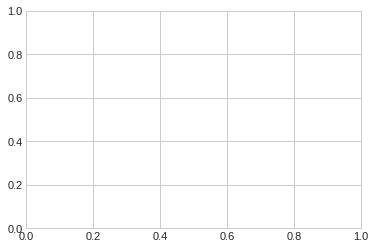

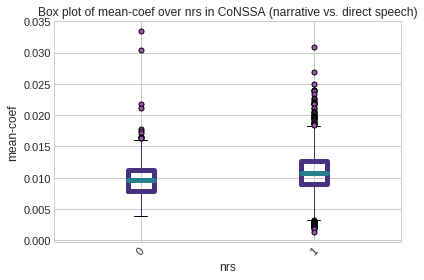

In [32]:
describe_data.boxplots(types_tendencies_coefs_df, "mean-coef", "nrs", wdir, "CoNSSA (narrative vs. direct speech)", figsize=[5,3])

The narrative features have a higher coefficient than the ones in the direct speech

In [31]:
type_feature_results_df

type-feature       p-value  difference  percetange-gain
0          nrs  5.060735e-17    0.000248             0.74
2        token  3.932929e-01   -0.000011            -0.03
1          dss  5.060735e-17   -0.000837            -2.51

# 6.1.4. Parameters Evaluation

Now that the features have been already pre-evaluated, the rest of the parameters are evaluated.

## Preparation of Corpus

In [12]:
pos_diff_mw_ord_ent_corpus_df = pd.read_parquet(corpora_chap_wdir+"pos_diff_multiwords_ord_ent_freq_table_raw_10000_T.parquet").T.iloc[:,0:6000]
pos_diff_mw_ord_ent_corpus_df.head(1)

/usr/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


,@form_punctuation@pos  de@form_adposition@pos  \
ne0001                    3448                    2797   

        .@form_punctuation@pos  el@form_determiner@pos  \
ne0001                    2801                    2519   

        la@form_determiner@pos  y@form_conjunction@pos  a@form_adposition@pos  \
ne0001                    1935                    1904                   1570   

        en@form_adposition@pos  se@form_pronoun@pos  que@form_pronoun@pos  \
ne0001                    1161                 1070                   783   

                 ...            formalizó@form_verb@pos  \
ne0001           ...                                  0   

        volvime@form_adjective@pos  pegadito@form_verb@pos  \
ne0001                           0                       0   

        lavarán@form_verb@pos  abrumo@form_verb@pos  cestillos@form_noun@pos  \
ne0001                      0                     0                        0   

        glicina@form_noun@pos  patriarcalmente@form_adverb@pos  \
ne0001                      0                                0   

        impeler@form_verb@pos  fumadora@form_noun@pos  
ne0001                      0                       0  

[1 rows x 6000 columns]

In [13]:
ling_anno_df = pd.read_parquet(corpora_chap_wdir+"ling_anno_freq_table_raw_10000_T.parquet").T
ling_anno_df.head(1)

singular@num  noun@pos  masculine@gen  common@type  punctuation@pos  \
ne0001         24015     11844          11879        10020            10472   

        verb@pos  feminine@gen  determiner@pos  main@type  3@person  \
ne0001      9479          9513            8691       8414      7602   

            ...       639@ord_ent  638@ord_ent  637@ord_ent  636@ord_ent  \
ne0001      ...                 0            0            0            0   

        635@ord_ent  634@ord_ent  633@ord_ent  631@ord_ent  630@ord_ent  \
ne0001            0            0            0            0            0   

        1329@ord_ent  
ne0001             0  

[1 rows x 3285 columns]

In [14]:
most_useful_ling_features_df = pd.read_csv(corpora_chap_wdir+"most_useful_ling_features.csv",sep="\t",index_col=0)
most_useful_ling_features_df.shape

(1000, 1)

In [15]:
most_useful_ling_anno_df = ling_anno_df[most_useful_ling_features_df["most_useful_ling_features"].tolist()]

In [16]:
ling_pos_diff_mw_ord_ent_corpus_df = load_data.merge_dfs(pos_diff_mw_ord_ent_corpus_df, most_useful_ling_anno_df)
ling_pos_diff_mw_ord_ent_corpus_df.head(2)

,@form_punctuation@pos  1@person  de@form_adposition@pos  2@person  \
ne0001                    3448      1001                    2797       678   
ne0002                    8003      2935                    4435      1713   

        .@form_punctuation@pos  abandonar@mariax  el@form_determiner@pos  \
ne0001                    2801                54                    2519   
ne0002                    3105               111                    2673   

        abatir@mariax  la@form_determiner@pos  abeja@mariax  \
ne0001            118                    1935            58   
ne0002            259                    2871            75   

                 ...            formalizó@form_verb@pos  \
ne0001           ...                                  0   
ne0002           ...                                  0   

        volvime@form_adjective@pos  pegadito@form_verb@pos  \
ne0001                           0                       0   
ne0002                           0                       0   

        lavarán@form_verb@pos  abrumo@form_verb@pos  cestillos@form_noun@pos  \
ne0001                      0                     0                        0   
ne0002                      0                     0                        0   

        glicina@form_noun@pos  patriarcalmente@form_adverb@pos  \
ne0001                      0                                0   
ne0002                      0                                0   

        impeler@form_verb@pos  fumadora@form_noun@pos  
ne0001                      0                       0  
ne0002                      0                       0  

[2 rows x 7000 columns]

In [17]:
tags_ling_pos_diff_mw_ord_ent_corpus_df = load_data.merge_dfs(ling_pos_diff_mw_ord_ent_corpus_df, tags_metadata_df)
tags_ling_pos_diff_mw_ord_ent_corpus_df.head()

,@form_punctuation@pos  am.divs  1@person  am.verses  \
ne0001                    3448       41      1001         71   
ne0002                    8003       42      2935          0   
ne0003                    6493       41      2875          0   
ne0004                    7411       45      3540          0   
ne0005                    4827       30      2870          0   

        de@form_adposition@pos  am.sps  2@person  am.paragraphs  \
ne0001                    2797       0       678           2354   
ne0002                    4435       0      1713           1498   
ne0003                    3192       0      1305           1160   
ne0004                    3753       0      1642           1272   
ne0005                    2839       0      1461            556   

        .@form_punctuation@pos  am.pds           ...            \
ne0001                    2801    1242           ...             
ne0002                    3105    1104           ...             
ne0003                    2552     851           ...             
ne0004                    3099     978           ...             
ne0005                    2172     299           ...             

        formalizó@form_verb@pos  volvime@form_adjective@pos  \
ne0001                        0                           0   
ne0002                        0                           0   
ne0003                        0                           0   
ne0004                        0                           0   
ne0005                        0                           0   

        pegadito@form_verb@pos  lavarán@form_verb@pos  abrumo@form_verb@pos  \
ne0001                       0                      0                     0   
ne0002                       0                      0                     0   
ne0003                       0                      0                     0   
ne0004                       0                      0                     0   
ne0005                       0                      0                     0   

        cestillos@form_noun@pos  glicina@form_noun@pos  \
ne0001                        0                      0   
ne0002                        0                      0   
ne0003                        0                      0   
ne0004                        0                      0   
ne0005                        0                      0   

        patriarcalmente@form_adverb@pos  impeler@form_verb@pos  \
ne0001                                0                      0   
ne0002                                0                      0   
ne0003                                0                      0   
ne0004                                0                      0   
ne0005                                0                      0   

        fumadora@form_noun@pos  
ne0001                       0  
ne0002                       0  
ne0003                       0  
ne0004                       0  
ne0005                       0  

[5 rows x 7012 columns]

In [18]:
tags_ling_pos_diff_mw_ord_ent_corpus_df.T.to_parquet(corpora_chap_wdir+"tags_ling_pos_diff_mw_ord_ent_70000_T.parquet")

In [3]:
wdir

'/home/jose/Dropbox/Doktorarbeit/novelasespanolas/'

In [9]:
shutil.copyfile(corpora_chap_wdir+"tags_ling_pos_diff_mw_ord_ent_70000_T.parquet",
         wdir +"exported/tags_ling_pos_diff_mw_ord_ent_70000_T.parquet",)


'/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/tags_ling_pos_diff_mw_ord_ent_70000_T.parquet'

In [18]:
sem_anno_df = pd.read_parquet(corpora_chap_wdir+"sem_anno_freq_table_raw_10000_T.parquet").T
tokens_df = pd.read_parquet(corpora_chap_wdir+"tokens_freq_table_raw_10000_T.parquet").T
lemma_ling_anno_df = pd.read_parquet(corpora_chap_wdir+"merged_ling_annotation_lemma_13285_T.parquet").T
tags_tokens_df = pd.read_parquet(corpora_chap_wdir+"tags_tokens_corpus_10000_T.parquet").T

The several versions of the corpus are saved with their names

In [19]:
copora_dc = {"sem_anno":sem_anno_df, "tokens": tokens_df, "lemma_ling_anno":lemma_ling_anno_df, "tags_tokens":tags_tokens_df,
            "mixed":tags_ling_pos_diff_mw_ord_ent_corpus_df, 
            }

## Calculations

In [ ]:
import datetime
columns = ['class', 'mean_f1', 'mean_rec', 'mean_prec', 'baseline', 'f1-baseline',
           'feature_combination','classifier_name', 'text_representation', 'MFW', 'typography',
           'f1s', 'test_result_pvalue', 'labels', 'sample_size', 'cv', 'sampling_times', 'classifier']
several_corpora_results_df = pd.DataFrame(columns = columns)

for corpus_st, corpus_df in copora_dc.items():
    print("combination of features", corpus_st)

    rel_corpus_df = corpus_df.divide(metadata_df["am.tokens"],axis=0)

    print(rel_corpus_df.head(2))

    text_representations = ["raw","log","log10","log1000","zscores","binary","tfidf","log10-zscores","tfidf-zscores"]

    max_MFFs = [10, 50, 100, 500, 1000, 2000, 3000, 5000, 7000]

    results_df = classify.classify(wdir = corpora_chap_wdir, freq_table  = rel_corpus_df,
                                metadata = metadata_df,
                  classes = subgenres, verbose = True,
                  methods = ["KNN"],#, 
                  max_MFFs = max_MFFs,  minimal_value_samples = 2,
                  text_representations = text_representations,
                  typographies = [True], sampling_mode = "cross", make_relative = False, 
                                under_sample_method = "lpc", sampling_times = 10, outdir_results = results_chap_wdir)


    results_df.sort_values(by=["mean_f1","MFW"], inplace=True, ascending=[False,True])
    
    
    results_df["feature_combination"] = corpus_st

    results_file_date = str(datetime.datetime.now().year)+str(datetime.datetime.now().month)+str(datetime.datetime.now().day)+str(datetime.datetime.now().hour)+str(datetime.datetime.now().minute)+str(datetime.datetime.now().second)

    #results_df.to_csv(results_chap_wdir+"param_eval_"+results_file_date+corpus_st+".csv")

    several_corpora_results_df = pd.concat([several_corpora_results_df, results_df])

    several_corpora_results_df.sort_values(by=["mean_f1","MFW"], inplace=True, ascending=[False,True])

    several_corpora_results_df = several_corpora_results_df[columns]

several_corpora_results_df.to_csv(results_chap_wdir+"param_eval_KNN_several_corpora_results"+results_file_date+".csv")

In [22]:
several_corpora_results_df

class  mean_f1  mean_rec  mean_prec  baseline  f1-baseline  \
432              nivola      1.0       1.0        1.0       0.5          0.5   
414              nivola      1.0       1.0        1.0       0.5          0.5   
432              nivola      1.0       1.0        1.0       0.5          0.5   
414              nivola      1.0       1.0        1.0       0.5          0.5   
405              nivola      1.0       1.0        1.0       0.5          0.5   
414              nivola      1.0       1.0        1.0       0.5          0.5   
423              nivola      1.0       1.0        1.0       0.5          0.5   
405              nivola      1.0       1.0        1.0       0.5          0.5   
405              nivola      1.0       1.0        1.0       0.5          0.5   
90              diálogo      1.0       1.0        1.0       0.5          0.5   
433              nivola      1.0       1.0        1.0       0.5          0.5   
415              nivola      1.0       1.0        1.0       0.5          0.5   
442              nivola      1.0       1.0        1.0       0.5          0.5   
415              nivola      1.0       1.0        1.0       0.5          0.5   
433              nivola      1.0       1.0        1.0       0.5          0.5   
424              nivola      1.0       1.0        1.0       0.5          0.5   
433              nivola      1.0       1.0        1.0       0.5          0.5   
469              nivola      1.0       1.0        1.0       0.5          0.5   
415              nivola      1.0       1.0        1.0       0.5          0.5   
478              nivola      1.0       1.0        1.0       0.5          0.5   
424              nivola      1.0       1.0        1.0       0.5          0.5   
460              nivola      1.0       1.0        1.0       0.5          0.5   
469              nivola      1.0       1.0        1.0       0.5          0.5   
416              nivola      1.0       1.0        1.0       0.5          0.5   
407              nivola      1.0       1.0        1.0       0.5          0.5   
425              nivola      1.0       1.0        1.0       0.5          0.5   
479              nivola      1.0       1.0        1.0       0.5          0.5   
452              nivola      1.0       1.0        1.0       0.5          0.5   
425              nivola      1.0       1.0        1.0       0.5          0.5   
416              nivola      1.0       1.0        1.0       0.5          0.5   
...                 ...      ...       ...        ...       ...          ...   
935          fantástico      0.0       0.0        0.0       0.5         -0.5   
1016  episodio nacional      0.0       0.0        0.0       0.5         -0.5   
548             poética      0.0       0.0        0.0       0.5         -0.5   
971          fantástico      0.0       0.0        0.0       0.5         -0.5   
827           greguería      0.0       0.0        0.0       0.5         -0.5   
1457      autobiografía      0.0       0.0        0.0       0.5         -0.5   
836           greguería      0.0       0.0        0.0       0.5         -0.5   
881           greguería      0.0       0.0        0.0       0.5         -0.5   
1700          biografía      0.0       0.0        0.0       0.5         -0.5   
854           greguería      0.0       0.0        0.0       0.5         -0.5   
1052  episodio nacional      0.0       0.0        0.0       0.5         -0.5   
1583         modernista      0.0       0.0        0.0       0.5         -0.5   
368            aventura      0.0       0.0        0.0       0.5         -0.5   
818           greguería      0.0       0.0        0.0       0.5         -0.5   
530             poética      0.0       0.0        0.0       0.5         -0.5   
800             erótica      0.0       0.0        0.0       0.5         -0.5   
566             poética      0.0       0.0        0.0       0.5         -0.5   
890           greguería      0.0       0.0        0.0       0.5         -0.5   
854           greg

## Concatenating results

The results were saved as csv, and now they are read.

In [14]:
files_lt = """
/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_1/results/Parameters Evaluation/param_eval_20192172102tags_tokens.csv
/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_1/results/Parameters Evaluation/param_eval_201921611719tokens.csv
/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_1/results/Parameters Evaluation/param_eval_201921651910sem_anno.csv
/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_1/results/Parameters Evaluation/param_eval_201921822123mixed.csv
/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_1/results/Parameters Evaluation/param_eval_2019216173719lemma_ling_anno.csv
/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_1/results/Parameters Evaluation/param_eval_KNN_several_corpora_results2019219215936.csv
"""

In [15]:
i = 0
for file in files_lt.split("\n"):
    if file != "":
        print(i, os.path.split(file)[1])
        df = pd.read_csv(file, index_col=0)
                    
        df.rename(columns={"f1":'mean_f1',"rec":'mean_rec',"prec":"mean_prec","sampling-times":"sampling_times","feature-combination":"feature_combination"}, inplace=True)
        
        if i == 0:
            several_corpora_results_df = df
        else:
            several_corpora_results_df = pd.concat([several_corpora_results_df, df])
        i += 1
several_corpora_results_df.replace({"tokens":"z_tokens"}, inplace=True)
several_corpora_results_df.sort_values(by=["mean_f1","MFW","feature_combination"], inplace=True, ascending=[False,True,False])
several_corpora_results_df.replace({"z_tokens":"tokens"}, inplace=True)

several_corpora_results_df.sort_values(by=["mean_f1","MFW"], inplace=True, ascending=[False,True])
several_corpora_results_df.replace("raw","relative",inplace=True)

0 param_eval_20192172102tags_tokens.csv
1 param_eval_201921611719tokens.csv
2 param_eval_201921651910sem_anno.csv
3 param_eval_201921822123mixed.csv
4 param_eval_2019216173719lemma_ling_anno.csv
5 param_eval_KNN_several_corpora_results2019219215936.csv


In [16]:
several_corpora_results_df.shape

(37260, 18)

Amount of iterations

In [17]:
(several_corpora_results_df["cv"] * several_corpora_results_df["sampling_times"]).sum()

3450600

## Describe Parameters Evaluation

### Subgenres

Highest values per class

In [18]:
several_corpora_results_df.groupby("class").head(1)[["class","mean_f1","text_representation","MFW","feature_combination","classifier_name"]]

class  mean_f1 text_representation   MFW  \
2430          greguería    1.000            relative    10   
1242             nivola    1.000                 log    10   
352             diálogo    1.000             zscores    10   
1674            poética    1.000       tfidf-zscores    10   
3008  episodio nacional    1.000             log1000   500   
2223            erótica    0.980                 log   500   
215              guerra    0.980       log10-zscores  7000   
1068       costumbrista    0.950                 log  3000   
1042           aventura    0.934               log10  2000   
4224      autobiografía    0.918             log1000  1000   
3684         espiritual    0.886                 log  1000   
955               humor    0.879       tfidf-zscores   500   
2879         fantástico    0.877       log10-zscores  2000   
1996        naturalista    0.842                 log  7000   
4589        psicológica    0.840       log10-zscores  7000   
5073          biografía    0.840       log10-zscores  7000   
3936           realista    0.833                 log  5000   
4714         modernista    0.825             log1000  2000   
553           histórica    0.816               log10  1000   
1906           memorias    0.805       log10-zscores  2000   
5557         filosófica    0.802       log10-zscores  5000   
3481             social    0.747               log10  7000   
5205          educación    0.733             log1000  5000   

     feature_combination classifier_name  
2430              tokens             SVC  
1242              tokens             SVC  
352               tokens              LR  
1674         tags_tokens             SVC  
3008              tokens              DT  
2223               mixed             SVC  
215               tokens              DT  
1068              tokens             KNN  
1042              tokens              LR  
4224               mixed             SVC  
3684         tags_tokens             SVC  
955             sem_anno              LR  
2879            sem_anno              DT  
1996     lemma_ling_anno              LR  
4589              tokens              DT  
5073            sem_anno             SVC  
3936            sem_anno             SVC  
4714               mixed              LR  
553                mixed              LR  
1906         tags_tokens              LR  
5557         tags_tokens              LR  
3481              tokens              LR  
5205     lemma_ling_anno             SVC

Mean F1-scores across different subgenres

In [273]:
several_corpora_results_df.groupby("class").head(1)[["class","mean_f1","text_representation","MFW","feature_combination","classifier_name"]]["mean_f1"].mean().round(2)

0.89

Mean standard deviation F1-score across different subgenres

In [274]:
several_corpora_results_df.groupby("class").head(1)[["class","mean_f1","text_representation","MFW","feature_combination","classifier_name"]]["mean_f1"].std().round(2)

0.09

Results by each class

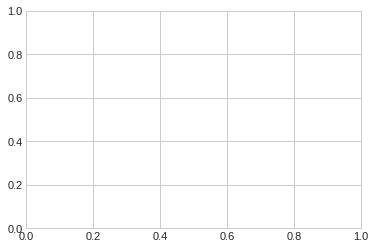

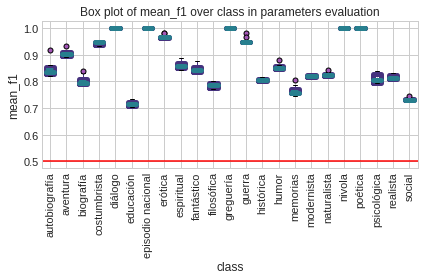

In [276]:
describe_data.boxplots(several_corpora_results_df.groupby(["class"]).head(10), "mean_f1", "class", results_chap_wdir, "parameters evaluation", rotation = 90, figsize=(6,4), baseline=0.5)


### Feature Combinations

Most successful parameters

In [277]:
Counter(several_corpora_results_df.groupby("class").head(1)["feature_combination"]).most_common()

[('tokens', 9),
 ('tags_tokens', 4),
 ('mixed', 4),
 ('sem_anno', 4),
 ('lemma_ling_anno', 2)]

In [278]:
Counter(several_corpora_results_df.replace({"mixed":"z_mixed"}).sort_values(by=["mean_f1","MFW","feature_combination"], ascending=[False,True,False]).groupby("class").head(1)["feature_combination"]).most_common()


[('z_mixed', 9),
 ('tokens', 5),
 ('sem_anno', 4),
 ('tags_tokens', 3),
 ('lemma_ling_anno', 2)]

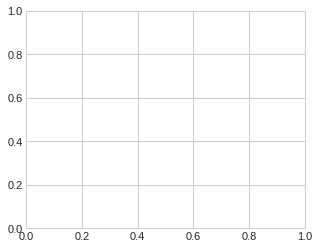

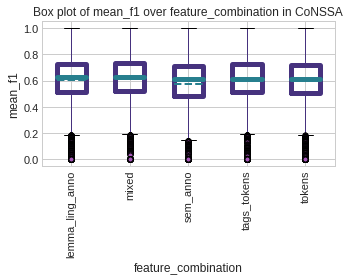

In [283]:
describe_data.boxplots(several_corpora_results_df, "mean_f1", "feature_combination", results_chap_wdir, "CoNSSA", rotation = 90, figsize=[5,4])

In [284]:
several_corpora_results_df.groupby(["feature_combination"]).median().sort_values(by="mean_f1")["mean_f1"]

feature_combination
sem_anno           0.610
tokens             0.611
tags_tokens        0.613
lemma_ling_anno    0.625
mixed              0.630
Name: mean_f1, dtype: float64

In [285]:
st_tests.test_differences_columns(several_corpora_results_df, "feature_combination", "mean_f1", equal_var=False).round(3).sort_values(by="pvalue")

value1       value2  pvalue significance
1  lemma_ling_anno     sem_anno   0.000          ***
4            mixed     sem_anno   0.000          ***
5            mixed  tags_tokens   0.000          ***
6            mixed       tokens   0.000          ***
7         sem_anno  tags_tokens   0.000          ***
8         sem_anno       tokens   0.000          ***
0  lemma_ling_anno        mixed   0.002           **
3  lemma_ling_anno       tokens   0.031            *
2  lemma_ling_anno  tags_tokens   0.167             
9      tags_tokens       tokens   0.441

N size for each different feature combination

In [286]:
several_corpora_results_df.loc[several_corpora_results_df["feature_combination"]=="tokens"].shape

(7452, 18)

### Transformations

In [287]:
len(set(several_corpora_results_df["text_representation"]))

9

In [288]:
Counter(several_corpora_results_df.groupby("class").head(1)["text_representation"]).most_common()

[('log', 6),
 ('log10-zscores', 6),
 ('log1000', 4),
 ('log10', 3),
 ('tfidf-zscores', 2),
 ('relative', 1),
 ('zscores', 1)]

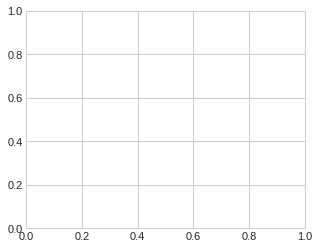

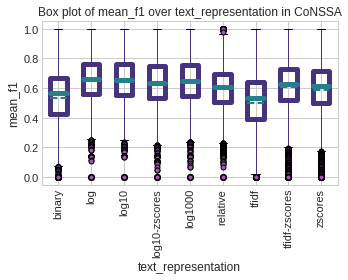

In [289]:
describe_data.boxplots(several_corpora_results_df, "mean_f1", "text_representation", results_chap_wdir, "CoNSSA", rotation = 90, figsize=[5,4])

In [290]:
several_corpora_results_df.groupby(["text_representation"]).median().sort_values(by="mean_f1")["mean_f1"]

text_representation
tfidf            0.533
binary           0.567
relative         0.607
zscores          0.613
tfidf-zscores    0.630
log10-zscores    0.638
log1000          0.647
log10            0.655
log              0.660
Name: mean_f1, dtype: float64

In [291]:
st_tests.test_differences_columns(several_corpora_results_df, "text_representation", "mean_f1", equal_var=False).round(3).sort_values(by="pvalue")

value1         value2  pvalue significance
0          binary            log   0.000          ***
33          tfidf  tfidf-zscores   0.000          ***
30       relative          tfidf   0.000          ***
29        log1000        zscores   0.000          ***
28        log1000  tfidf-zscores   0.000          ***
27        log1000          tfidf   0.000          ***
26        log1000       relative   0.000          ***
25  log10-zscores        zscores   0.000          ***
24  log10-zscores  tfidf-zscores   0.000          ***
23  log10-zscores          tfidf   0.000          ***
22  log10-zscores       relative   0.000          ***
20          log10        zscores   0.000          ***
19          log10  tfidf-zscores   0.000          ***
18          log10          tfidf   0.000          ***
34          tfidf        zscores   0.000          ***
17          log10       relative   0.000          ***
7          binary        zscores   0.000          ***
1          binary          log10   0.000          ***
2          binary  log10-zscores   0.000          ***
3          binary        log1000   0.000          ***
4          binary       relative   0.000          ***
5          binary          tfidf   0.000          ***
6          binary  tfidf-zscores   0.000          ***
15          log10  log10-zscores   0.000          ***
35  tfidf-zscores        zscores   0.000          ***
9             log  log10-zscores   0.000          ***
11            log       relative   0.000          ***
12            log          tfidf   0.000          ***
13            log  tfidf-zscores   0.000          ***
14            log        zscores   0.000          ***
10            log        log1000   0.004           **
32       relative        zscores   0.004           **
21  log10-zscores        log1000   0.019            *
16          log10        log1000   0.078             
31       relative  tfidf-zscores   0.200             
8             log          log10   0.267

### Classifier

In [292]:
Counter(several_corpora_results_df.groupby("class").head(1)["classifier_name"]).most_common()

[('SVC', 9), ('LR', 9), ('DT', 4), ('KNN', 1)]

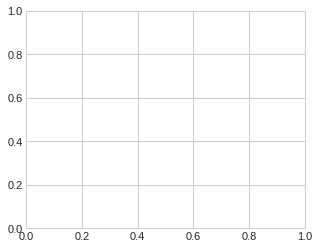

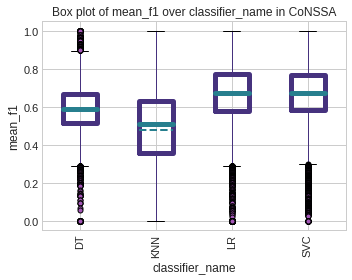

In [293]:
describe_data.boxplots(several_corpora_results_df, "mean_f1", "classifier_name", results_chap_wdir, "CoNSSA", rotation = 90, figsize=[5,4])

In [294]:
several_corpora_results_df.groupby(["classifier_name"]).median().sort_values(by="mean_f1")["mean_f1"]

classifier_name
KNN    0.509
DT     0.589
LR     0.673
SVC    0.674
Name: mean_f1, dtype: float64

In [295]:
st_tests.test_differences_columns(several_corpora_results_df, "classifier_name", "mean_f1", equal_var=False).round(3).sort_values(by="pvalue")

value1 value2  pvalue significance
0     DT    KNN   0.000          ***
1     DT     LR   0.000          ***
2     DT    SVC   0.000          ***
3    KNN     LR   0.000          ***
4    KNN    SVC   0.000          ***
5     LR    SVC   0.126

### MFW

In [296]:
Counter(several_corpora_results_df.groupby("class").head(1)["MFW"]).most_common()

[(7000, 5), (10, 4), (2000, 4), (500, 3), (1000, 3), (5000, 3), (3000, 1)]

Which subgenres have their top results with 10 features?

In [297]:
several_corpora_results_df.groupby("class").head(1).loc[several_corpora_results_df.groupby("class").head(1)["MFW"]==10]["class"]

2430    greguería
1242       nivola
352       diálogo
1674      poética
Name: class, dtype: object

Is there a correlation between classification and size of data-matrix?

In [298]:
stats.pearsonr(several_corpora_results_df["MFW"], several_corpora_results_df["mean_f1"])


(0.09378626207748045, 1.4634784719984936e-73)

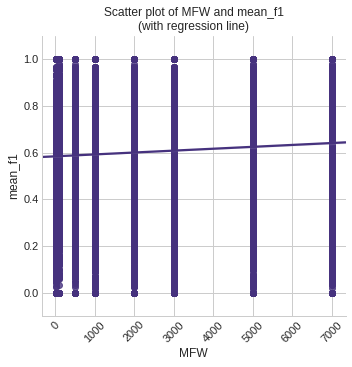

In [299]:
describe_data.describe_corpus_scatter(several_corpora_results_df, results_chap_wdir, "MFW", "mean_f1",  "CoNSSA")

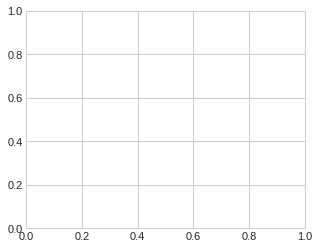

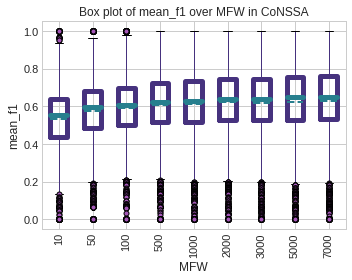

In [300]:
describe_data.boxplots(several_corpora_results_df, "mean_f1", "MFW", results_chap_wdir, "CoNSSA", rotation = 90, figsize=[4,3])

In [301]:
several_corpora_results_df.groupby(["MFW"]).median().sort_values(by="mean_f1")["mean_f1"]

MFW
10      0.5530
50      0.5940
100     0.6070
500     0.6245
1000    0.6280
2000    0.6410
3000    0.6410
5000    0.6470
7000    0.6510
Name: mean_f1, dtype: float64

In [302]:
st_tests.test_differences_columns(several_corpora_results_df, "MFW", "mean_f1", equal_var=False).round(3).sort_values(by=["value1","value2"])

value1  value2  pvalue significance
0       10      50   0.000          ***
1       10     100   0.000          ***
2       10     500   0.000          ***
3       10    1000   0.000          ***
4       10    2000   0.000          ***
5       10    3000   0.000          ***
6       10    5000   0.000          ***
7       10    7000   0.000          ***
8       50     100   0.000          ***
9       50     500   0.000          ***
10      50    1000   0.000          ***
11      50    2000   0.000          ***
12      50    3000   0.000          ***
13      50    5000   0.000          ***
14      50    7000   0.000          ***
15     100     500   0.002           **
16     100    1000   0.000          ***
17     100    2000   0.000          ***
18     100    3000   0.000          ***
19     100    5000   0.000          ***
20     100    7000   0.000          ***
21     500    1000   0.182             
22     500    2000   0.000          ***
23     500    3000   0.001           **
24     500    5000   0.000          ***
25     500    7000   0.000          ***
26    1000    2000   0.031            *
27    1000    3000   0.066             
28    1000    5000   0.006           **
29    1000    7000   0.000          ***
30    2000    3000   0.756             
31    2000    5000   0.547             
32    2000    7000   0.108             
33    3000    5000   0.363             
34    3000    7000   0.056             
35    5000    7000   0.318

### Combinations

How do the different results perform in combination?

In [19]:
comb_several_corpora_results_df = several_corpora_results_df.loc[several_corpora_results_df["classifier_name"].isin(["LR","SVC"])]

In [20]:
Counter(list(tuple(combination) for combination in comb_several_corpora_results_df.groupby(["class","feature_combination"]).head(1)[["text_representation","feature_combination"]].values)).most_common(10)

[(('log', 'mixed'), 8),
 (('log10', 'tokens'), 7),
 (('zscores', 'sem_anno'), 6),
 (('log', 'lemma_ling_anno'), 6),
 (('log', 'tags_tokens'), 5),
 (('zscores', 'lemma_ling_anno'), 5),
 (('log10-zscores', 'sem_anno'), 5),
 (('zscores', 'mixed'), 5),
 (('log', 'tokens'), 4),
 (('log10', 'sem_anno'), 4)]

In [21]:
Counter(list(tuple(combination) for combination in comb_several_corpora_results_df.groupby(["class","MFW"]).head(1)[["text_representation","MFW"]].values)).most_common(10)

[(('log', 50), 10),
 (('log10', 5000), 8),
 (('log', 500), 7),
 (('log10', 1000), 7),
 (('log10', 7000), 7),
 (('log10-zscores', 10), 7),
 (('log1000', 2000), 6),
 (('log', 3000), 6),
 (('log1000', 3000), 6),
 (('log10', 100), 5)]

In [22]:
Counter(list(tuple(combination) for combination in comb_several_corpora_results_df.groupby(["class","feature_combination"]).head(1)[["feature_combination","MFW"]].values)).most_common(10)

[(('lemma_ling_anno', 5000), 8),
 (('mixed', 1000), 6),
 (('tags_tokens', 5000), 6),
 (('tags_tokens', 10), 4),
 (('lemma_ling_anno', 7000), 4),
 (('tags_tokens', 2000), 4),
 (('tokens', 3000), 4),
 (('tokens', 7000), 4),
 (('mixed', 7000), 4),
 (('tokens', 10), 3)]

Best combination (by median)

In [23]:
comb_several_corpora_results_df.groupby(["text_representation","feature_combination","MFW"]).median().groupby(["text_representation","feature_combination","MFW"]).head(1).sort_values(by="mean_f1",ascending=False).head()

baseline  cv  f1-baseline  \
text_representation feature_combination MFW                               
log10               mixed               7000       0.5  10       0.2885   
                    tokens              7000       0.5  10       0.2885   
log                 mixed               5000       0.5  10       0.2860   
log1000             mixed               5000       0.5  10       0.2825   
                    lemma_ling_anno     7000       0.5  10       0.2805   

                                              mean_f1  mean_prec  mean_rec  \
text_representation feature_combination MFW                                  
log10               mixed               7000   0.7885     0.7890    0.8035   
                    tokens              7000   0.7885     0.7705    0.7935   
log                 mixed               5000   0.7860     0.7885    0.7960   
log1000             mixed               5000   0.7825     0.8035    0.7925   
                    lemma_ling_anno     7000   0.7805     0.8030    0.7680   

                                              sample_size  sampling_times  \
text_representation feature_combination MFW                                 
log10               mixed               7000           66              10   
                    tokens              7000           66              10   
log                 mixed               5000           66              10   
log1000             mixed               5000           66              10   
                    lemma_ling_anno     7000           66              10   

                                              test_result_pvalue  typography  
text_representation feature_combination MFW                                   
log10               mixed               7000        1.551559e-27        True  
                    tokens              7000        7.556010e-25        True  
log                 mixed               5000        1.431373e-24        True  
log1000             mixed               5000        1.979633e-27        True  
                    lemma_ling_anno     7000        9.601146e-24        True

In [24]:
comb_several_corpora_results_df.groupby(["text_representation","feature_combination","MFW"]).quantile(q=0.75).groupby(["text_representation","feature_combination","MFW"]).head(1).sort_values(by="mean_f1",ascending=False).head()

0.75                                          baseline    cv  f1-baseline  \
text_representation feature_combination MFW                                 
log10               tags_tokens         7000       0.5  10.0        0.380   
                                        1000       0.5  10.0        0.379   
                    tokens              3000       0.5  10.0        0.379   
                    mixed               7000       0.5  10.0        0.378   
log                 mixed               5000       0.5  10.0        0.367   

0.75                                          mean_f1  mean_prec  mean_rec  \
text_representation feature_combination MFW                                  
log10               tags_tokens         7000    0.880    0.87375   0.90000   
                                        1000    0.879    0.86050   0.90000   
                    tokens              3000    0.879    0.88750   0.90000   
                    mixed               7000    0.878    0.87900   0.89725   
log                 mixed               5000    0.867    0.88875   0.90000   

0.75                                          sample_size  sampling_times  \
text_representation feature_combination MFW                                 
log10               tags_tokens         7000        135.0            10.0   
                                        1000        135.0            10.0   
                    tokens              3000        135.0            10.0   
                    mixed               7000        135.0            10.0   
log                 mixed               5000        135.0            10.0   

0.75                                          test_result_pvalue  typography  
text_representation feature_combination MFW                                   
log10               tags_tokens         7000        3.617630e-19         1.0  
                                        1000        1.769456e-14         1.0  
                    tokens              3000        2.663195e-17         1.0  
                    mixed               7000        1.371253e-16         1.0  
log                 mixed               5000        2.574822e-17         1.0

In [25]:
comb_several_corpora_results_df.groupby(["text_representation","feature_combination","MFW"]).quantile(q=0.25).groupby(["text_representation","feature_combination","MFW"]).head(1).sort_values(by="mean_f1",ascending=False).head()

0.25                                          baseline    cv  f1-baseline  \
text_representation feature_combination MFW                                 
log1000             tags_tokens         2000       0.5  10.0      0.22100   
log10               tags_tokens         7000       0.5  10.0      0.22100   
log                 tokens              3000       0.5  10.0      0.21925   
log10               tokens              5000       0.5  10.0      0.21800   
log10-zscores       tags_tokens         5000       0.5  10.0      0.21525   

0.25                                          mean_f1  mean_prec  mean_rec  \
text_representation feature_combination MFW                                  
log1000             tags_tokens         2000  0.72100    0.72575   0.73075   
log10               tags_tokens         7000  0.72100    0.74675   0.71700   
log                 tokens              3000  0.71925    0.72925   0.72500   
log10               tokens              5000  0.71800    0.73300   0.72150   
log10-zscores       tags_tokens         5000  0.71525    0.70675   0.71375   

0.25                                          sample_size  sampling_times  \
text_representation feature_combination MFW                                 
log1000             tags_tokens         2000         32.5            10.0   
log10               tags_tokens         7000         32.5            10.0   
log                 tokens              3000         32.5            10.0   
log10               tokens              5000         32.5            10.0   
log10-zscores       tags_tokens         5000         32.5            10.0   

0.25                                          test_result_pvalue  typography  
text_representation feature_combination MFW                                   
log1000             tags_tokens         2000        4.211482e-41         1.0  
log10               tags_tokens         7000        3.178298e-44         1.0  
log                 tokens              3000        2.243115e-41         1.0  
log10               tokens              5000        3.560988e-43         1.0  
log10-zscores       tags_tokens         5000        1.681461e-37         1.0

Facet Grid of all the parameters (except for classifier)

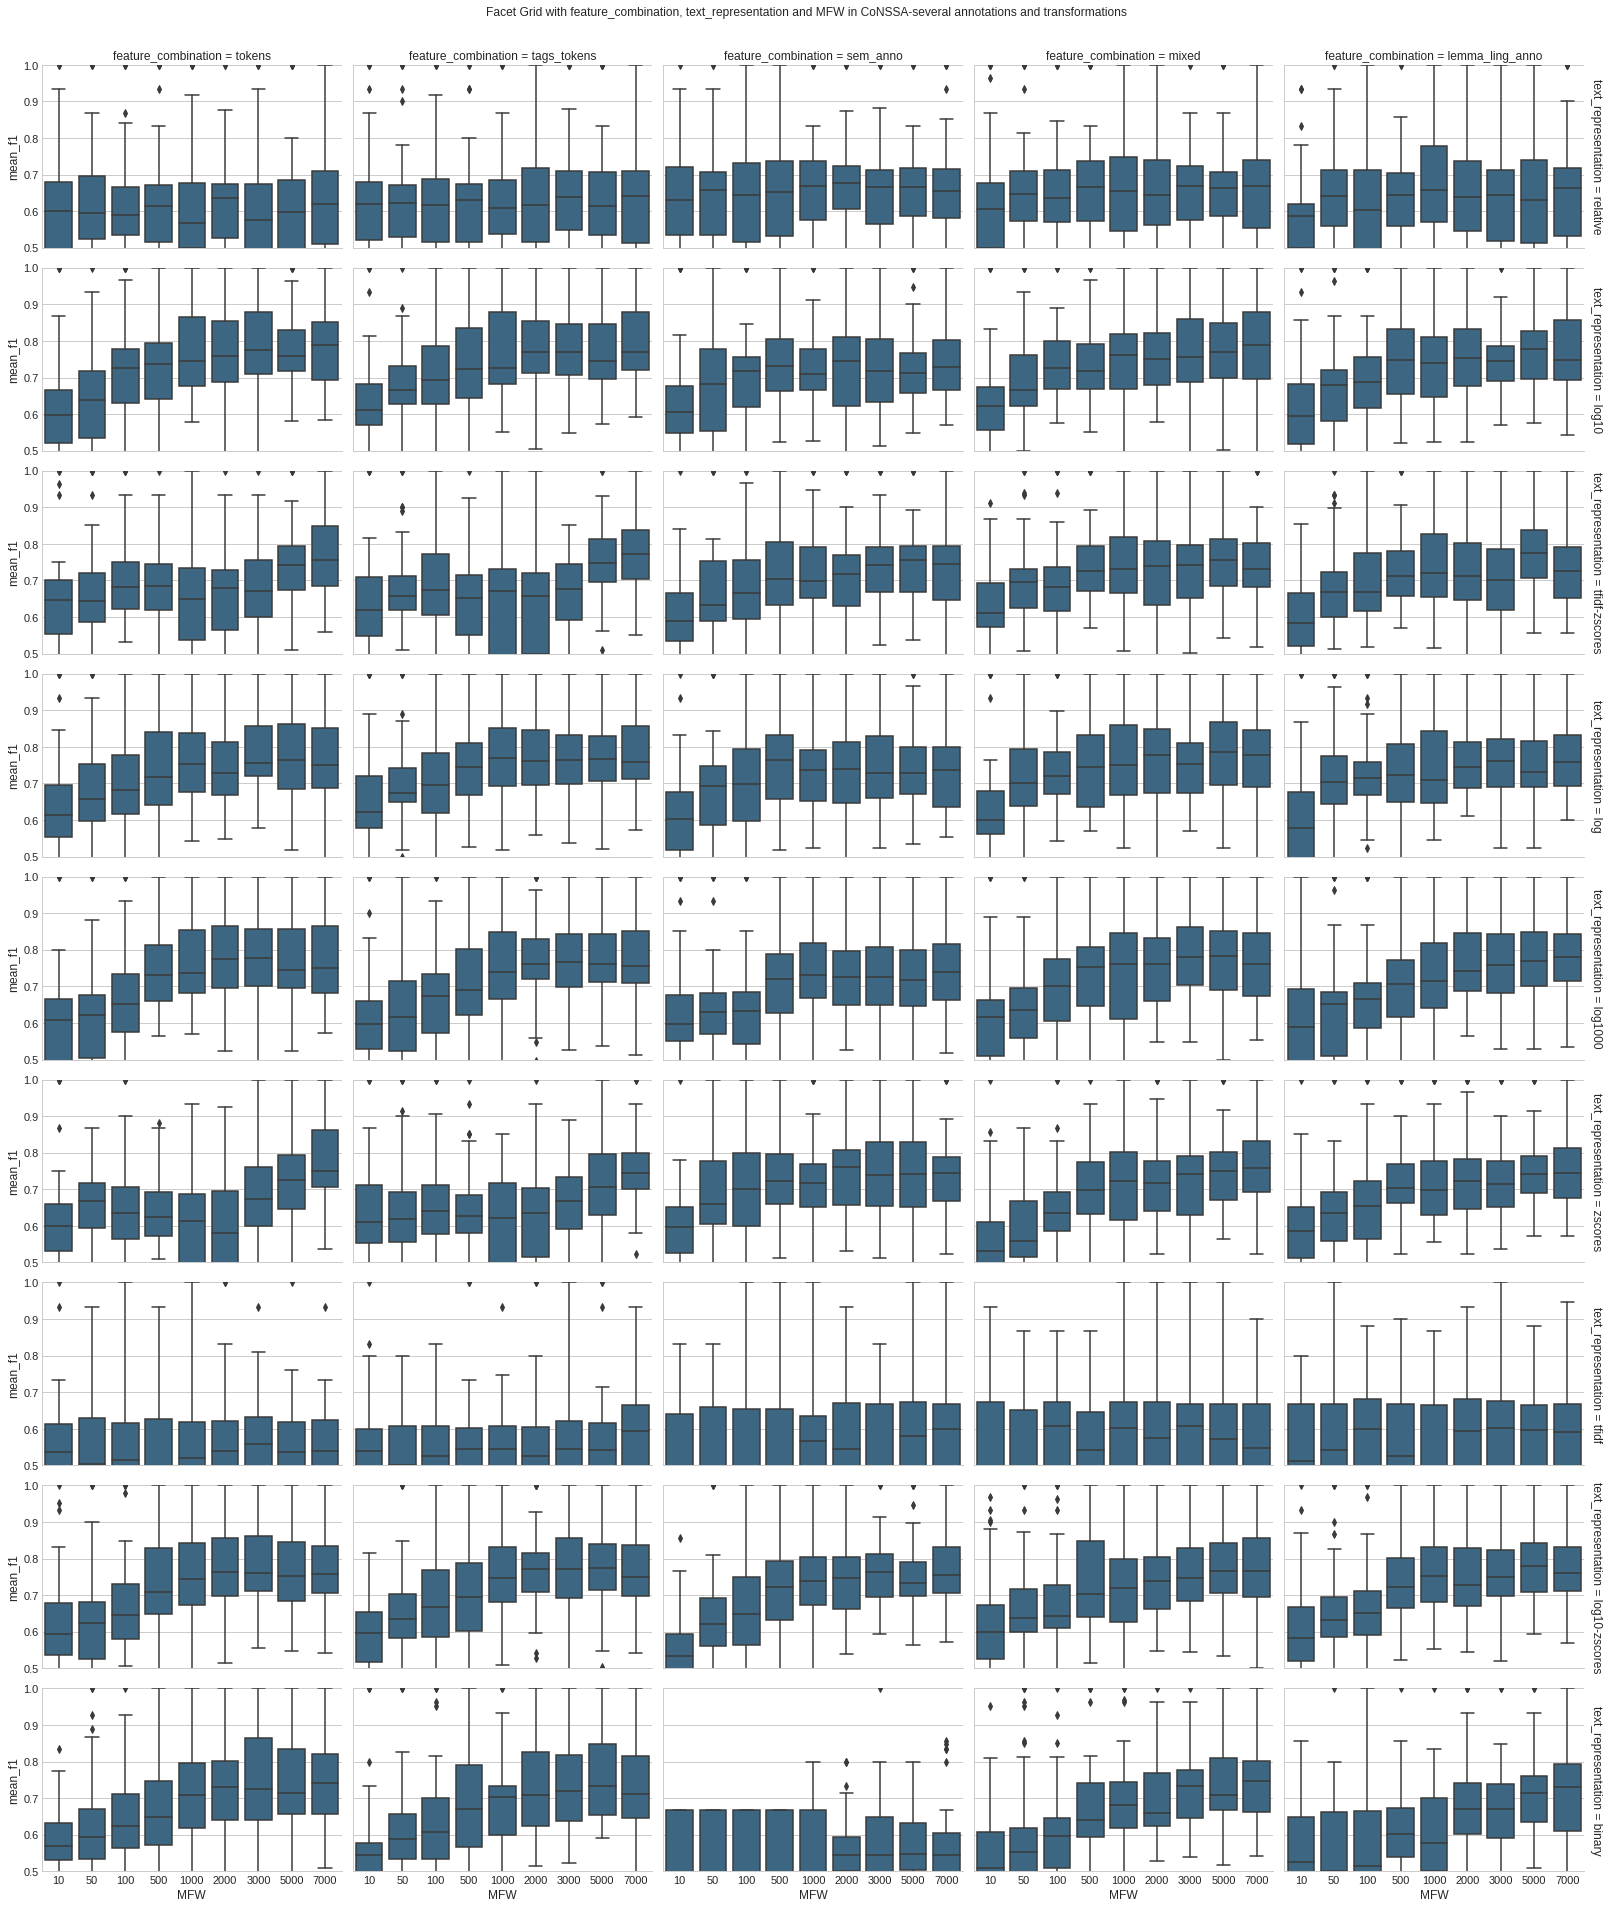

In [26]:
import seaborn as sns
describe_data.facetGrid(comb_several_corpora_results_df
          .groupby(["class","text_representation","feature_combination","classifier_name","MFW"]).head(1), "mean_f1", "feature_combination", "text_representation","MFW", results_chap_wdir, "CoNSSA-several annotations and transformations", ylim = 0.5,
          type_=sns.boxplot)

Why some transformation are working better? To analyze that, I read the results of the chapter 4.2

In [127]:
transformations_results_df = pd.read_csv("/home/jose/Dropbox/Doktorarbeit/ne_data/chap_4_2/results_sample.csv",sep="\t")

In [128]:
print(set(transformations_results_df["transformation"]))

{'rel-tfidf-log10-zscores', 'log-zscores', 'rel-tfidf', 'rel-log10-tfidf-zscores', 'rel-log10-zscores-tfidf', 'tfidf', 'log10', 'rel-log10-tfidf', 'rel-lang-zscore', 'log', 'rel-log-zscores', 'raw', 'rel-log10-zscores', 'rel-log', 'rel-log10', 'binary', 'rel-log1000', 'relative', 'rel-tfidf-log10', 'zscores', 'rel-tfidf-zscores', 'rel-zscores', 'log2', 'log10zscores', 'rel-zscores-tfidf'}


In [129]:
transformations_results_df = transformations_results_df.loc[results_sample_df["transformation"].isin(["relative","binary","rel-log10","rel-log","rel-log10-zscores","zscores","rel-tfidf","rel-tfidf-zscores","rel-log1000"])]
transformations_results_df.shape

(9, 12)

In [130]:
transformations_results_df.head()

transformation        min       max      mean       std    median  \
1            relative   0.000000  0.094396  0.000500  0.003684  0.000089   
2             zscores  -1.006320  7.894330  0.228450  0.743293  0.070963   
6             rel-log -12.390800 -2.360257 -9.405176  1.495867 -9.323988   
9   rel-log10-zscores  -2.265015  3.517787  0.197613  0.663549  0.273599   
10          rel-log10  -5.381256 -1.025047 -4.084616  0.649647 -4.049356   

         IQR  Pearson's R     R p-value  Gaussian Test  Gaussian p-value  \
1   0.000140     1.000000  0.000000e+00    4151.122770      0.000000e+00   
2   0.829397     0.077459  5.260734e-04    1105.869091     7.304289e-241   
6   1.540445     0.398463  4.348977e-77     134.665804      5.723903e-30   
9   0.842330     0.049401  2.715714e-02      61.214025      5.099685e-14   
10  0.669007     0.398463  4.348977e-77     134.665804      5.723903e-30   

         skew  
1   17.230192  
2    2.313855  
6    0.424749  
9   -0.323647  
10   0.424749

In [131]:
transformations_results_df["transformation"] = transformations_results_df["transformation"].str.replace(r"rel-(.*?)",r"\1")

In [132]:
transformations_results_df.sort_values(by="transformation", inplace=True)
transformations_results_df.index = transformations_results_df["transformation"]
transformations_results_df

transformation        min       max      mean       std  \
transformation                                                           
binary                 binary   0.000000  1.000000  0.929500  0.256052   
log                       log -12.390800 -2.360257 -9.405176  1.495867   
log10                   log10  -5.381256 -1.025047 -4.084616  0.649647   
log10-zscores   log10-zscores  -2.265015  3.517787  0.197613  0.663549   
log1000               log1000  -1.345314 -0.256262 -1.021154  0.162412   
relative             relative   0.000000  0.094396  0.000500  0.003684   
tfidf                   tfidf  -0.000263  0.001145  0.000015  0.000045   
tfidf-zscores   tfidf-zscores  -1.334026  6.404743 -0.006825  0.652708   
zscores               zscores  -1.006320  7.894330  0.228450  0.743293   

                  median       IQR  Pearson's R     R p-value  Gaussian Test  \
transformation                                                                 
binary          1.000000  0.000000     0.037389  9.460126e-02    1357.396503   
log            -9.323988  1.540445     0.398463  4.348977e-77     134.665804   
log10          -4.049356  0.669007     0.398463  4.348977e-77     134.665804   
log10-zscores   0.273599  0.842330     0.049401  2.715714e-02      61.214025   
log1000        -1.012339  0.167252     0.398463  4.348977e-77     134.665804   
relative        0.000089  0.000140     1.000000  0.000000e+00    4151.122770   
tfidf           0.000009  0.000013    -0.227305  7.493016e-25    3803.857227   
tfidf-zscores  -0.142171  0.000000     0.000000  1.000000e+00       0.000000   
zscores         0.070963  0.829397     0.077459  5.260734e-04    1105.869091   

                Gaussian p-value       skew  
transformation                               
binary             1.758306e-295  -3.355629  
log                 5.723903e-30   0.424749  
log10               5.723903e-30   0.424749  
log10-zscores       5.099685e-14  -0.323647  
log1000             5.723903e-30   0.424749  
relative            0.000000e+00  17.230192  
tfidf               0.000000e+00  14.146985  
tfidf-zscores       0.000000e+00   0.000000  
zscores            7.304289e-241   2.313855

In [133]:
comb_several_corpora_results_df.groupby(["text_representation","class"]).head(1).groupby(["text_representation"]).mean().sort_values(by="text_representation")

MFW  baseline       cv  f1-baseline   mean_f1  \
text_representation                                                          
binary               4176.956522       0.5  9.26087     0.336217  0.836217   
log                  2638.260870       0.5  9.26087     0.370130  0.870130   
log10                3181.739130       0.5  9.26087     0.370609  0.870609   
log10-zscores        3031.304348       0.5  9.26087     0.366391  0.866391   
log1000              2827.391304       0.5  9.26087     0.371217  0.871217   
relative             1422.608696       0.5  9.26087     0.299217  0.799217   
tfidf                2169.130435       0.5  9.26087     0.269478  0.769478   
tfidf-zscores        2692.608696       0.5  9.26087     0.366304  0.866304   
zscores              2595.652174       0.5  9.26087     0.363435  0.863435   

                     mean_prec  mean_rec  sample_size  sampling_times  \
text_representation                                                     
binary                0.858696  0.838217    93.217391            10.0   
log                   0.888783  0.876565    93.217391            10.0   
log10                 0.886652  0.872391    93.217391            10.0   
log10-zscores         0.874652  0.875957    93.217391            10.0   
log1000               0.886783  0.873478    93.217391            10.0   
relative              0.761783  0.880261    93.217391            10.0   
tfidf                 0.675261  0.943522    93.217391            10.0   
tfidf-zscores         0.879478  0.876087    93.217391            10.0   
zscores               0.880913  0.869696    93.217391            10.0   

                     test_result_pvalue  typography  
text_representation                                  
binary                     1.302306e-02        True  
log                        9.936328e-07        True  
log10                      1.172875e-04        True  
log10-zscores              5.576242e-07        True  
log1000                    1.564638e-08        True  
relative                   1.874069e-02        True  
tfidf                      3.594366e-02        True  
tfidf-zscores              4.296860e-04        True  
zscores                    3.198577e-02        True

I combine the data of the chapter 4.2 and of this chapter

In [134]:
skew_results_df = pd.DataFrame([comb_several_corpora_results_df.groupby(["text_representation","class"]).head(1).groupby(["text_representation"]).mean().sort_values(by="text_representation")["mean_f1"],
    transformations_results_df["skew"], transformations_results_df["Gaussian Test"], transformations_results_df["Pearson's R"], transformations_results_df["R p-value"]]).T

In [135]:
skew_results_df

mean_f1       skew  Gaussian Test  Pearson's R     R p-value
binary         0.836217  -3.355629    1357.396503     0.037389  9.460126e-02
log            0.870130   0.424749     134.665804     0.398463  4.348977e-77
log10          0.870609   0.424749     134.665804     0.398463  4.348977e-77
log10-zscores  0.866391  -0.323647      61.214025     0.049401  2.715714e-02
log1000        0.871217   0.424749     134.665804     0.398463  4.348977e-77
relative       0.799217  17.230192    4151.122770     1.000000  0.000000e+00
tfidf          0.769478  14.146985    3803.857227    -0.227305  7.493016e-25
tfidf-zscores  0.866304   0.000000       0.000000     0.000000  1.000000e+00
zscores        0.863435   2.313855    1105.869091     0.077459  5.260734e-04

I calculate a correlation between the mean F1-score of the transformation, and their skew-score

In [136]:
stats.pearsonr(
    skew_results_df["mean_f1"],
    transformations_results_df["skew"]
    )

(-0.842526816882339, 0.004358404255960634)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


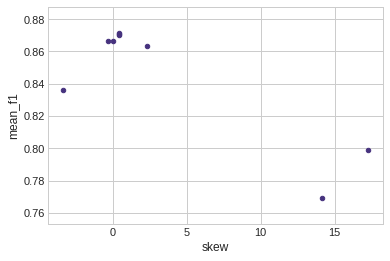

In [137]:
skew_results_df.plot.scatter("skew","mean_f1")

I calculate a correlation between the mean F1-score of the transformation, and their normality

In [139]:
stats.pearsonr(
    skew_results_df["mean_f1"],
    skew_results_df["Gaussian Test"]
    )

(-0.9522355393682091, 7.48276314582476e-05)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


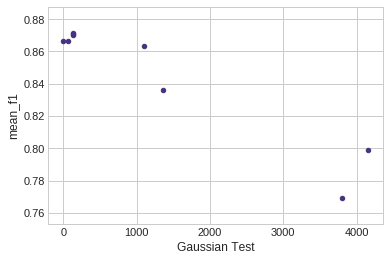

In [140]:
skew_results_df.plot.scatter("Gaussian Test","mean_f1")

I calculate a correlation between the mean F1-score of the transformation, and their correlation with the original frequency

In [141]:
stats.pearsonr(
    skew_results_df["mean_f1"],
    skew_results_df["Pearson's R"]
    )

(0.021572740207896828, 0.9560694146931568)